# François' Dev Notebook 1


### Getting familiar with the libraries and dcm files
The goal of this notebook is to understand the way dcm files stock information about the patient scans and to learn how to extract features from those images.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import dicom
import dicom_numpy
import os
import radiomics
from skimage import io
import SimpleITK as sitk
import collections

In [10]:
path  = "/home/popszer/Documents/ei3/petML/data/"
listFilesDCM = []

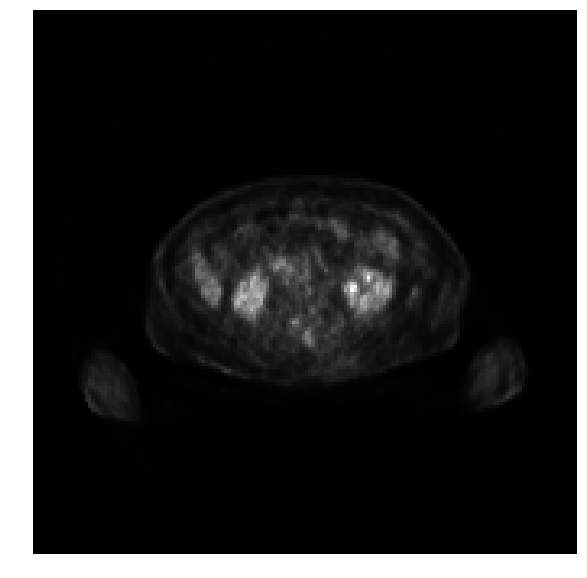

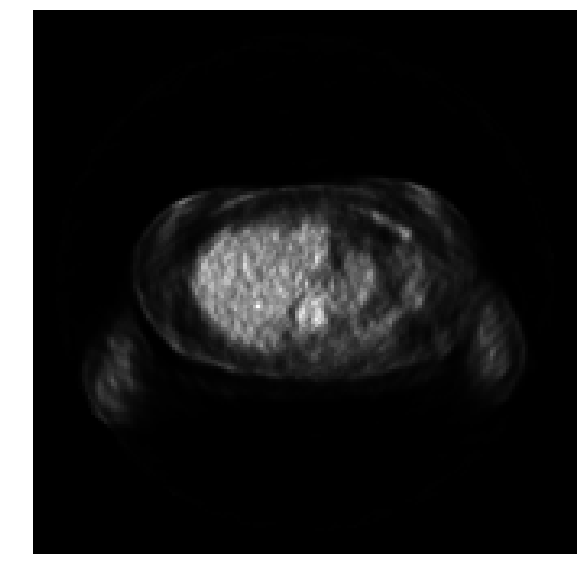

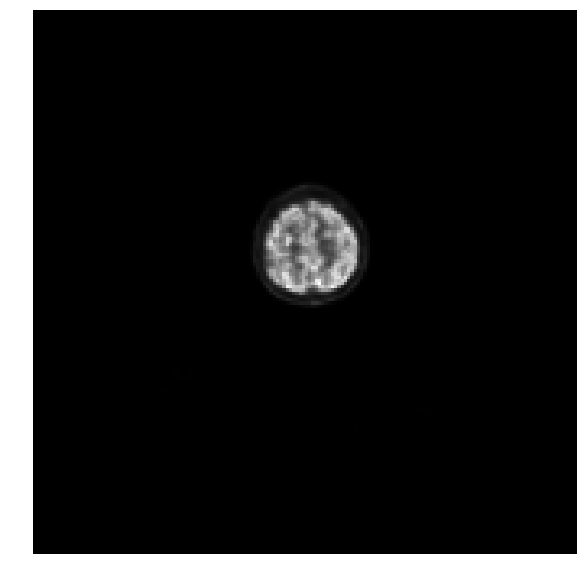

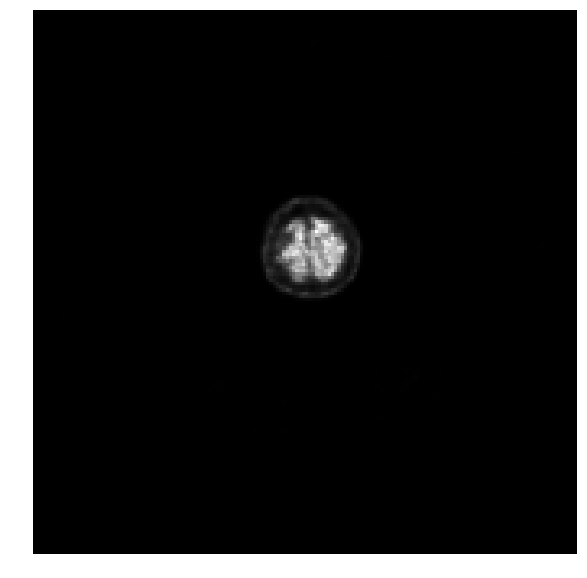

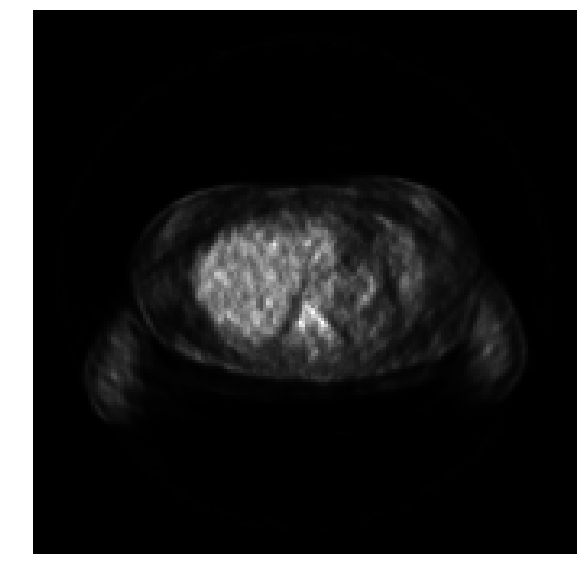

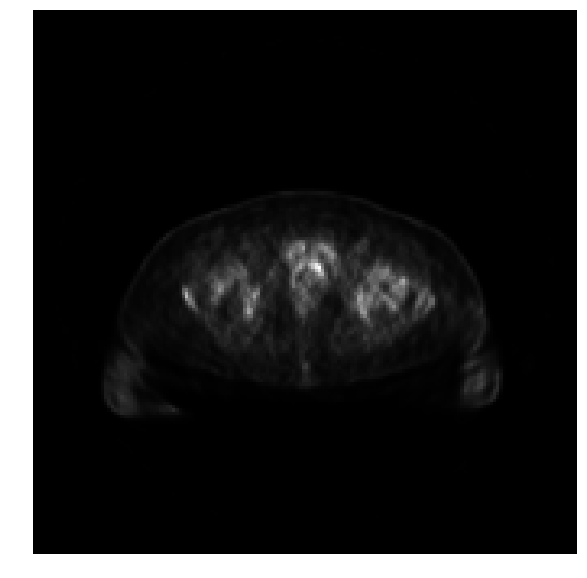

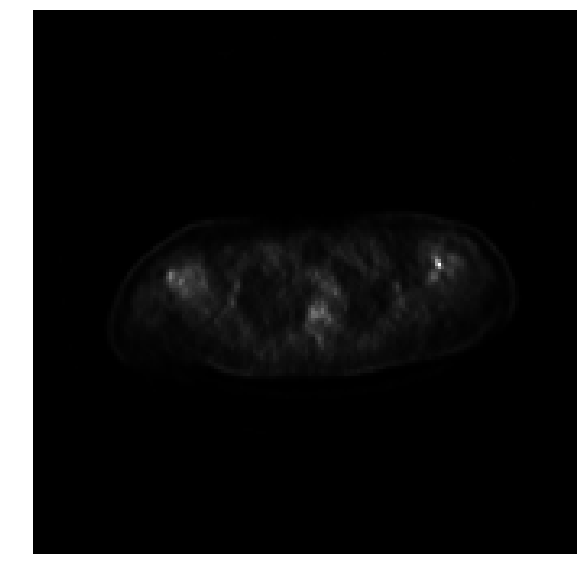

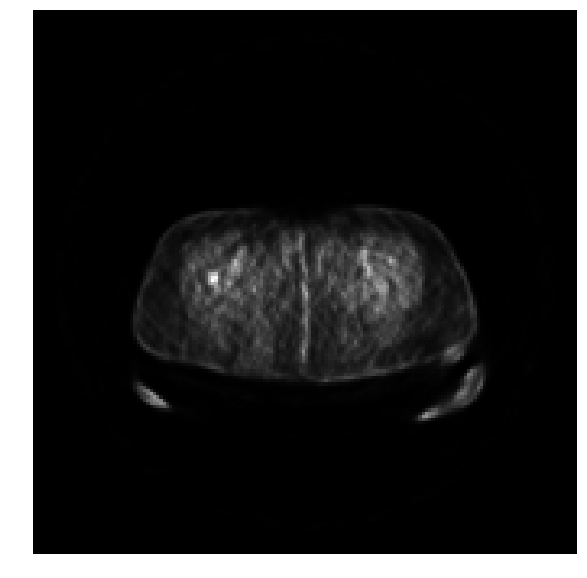

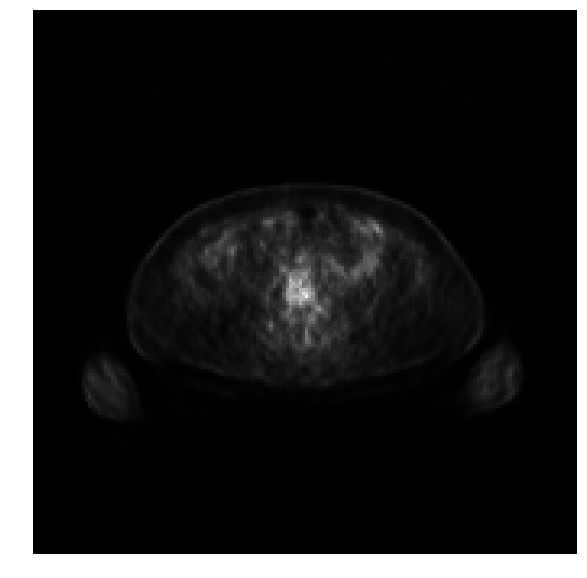

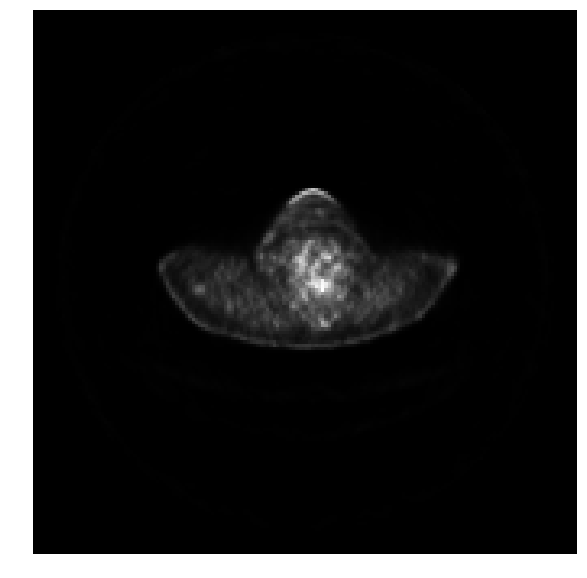

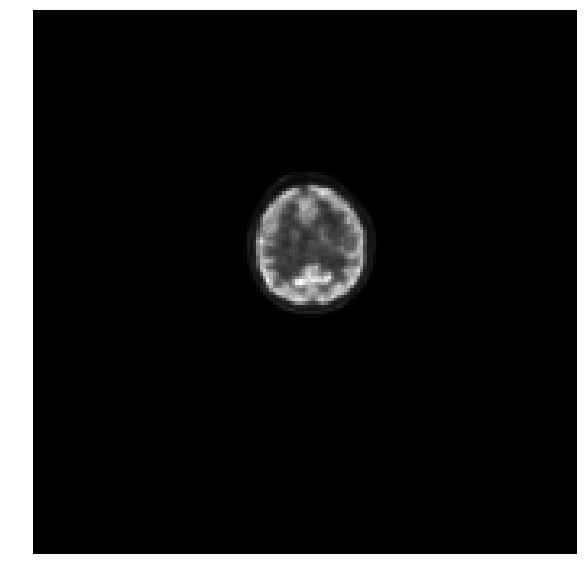

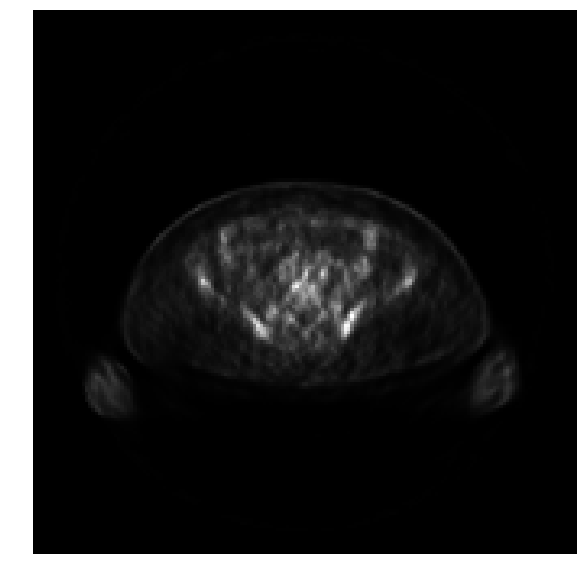

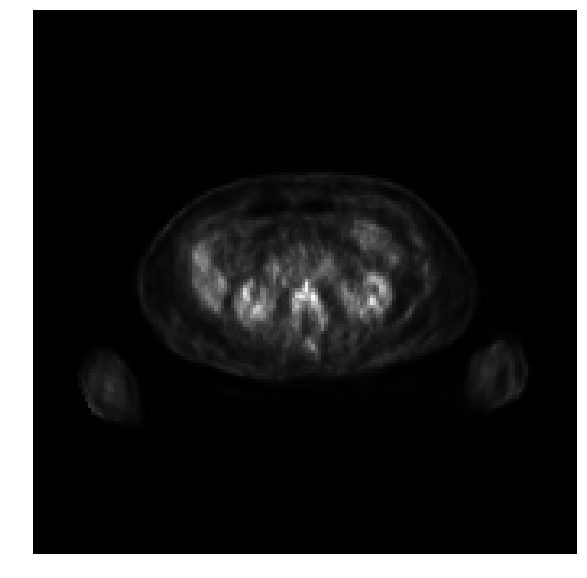

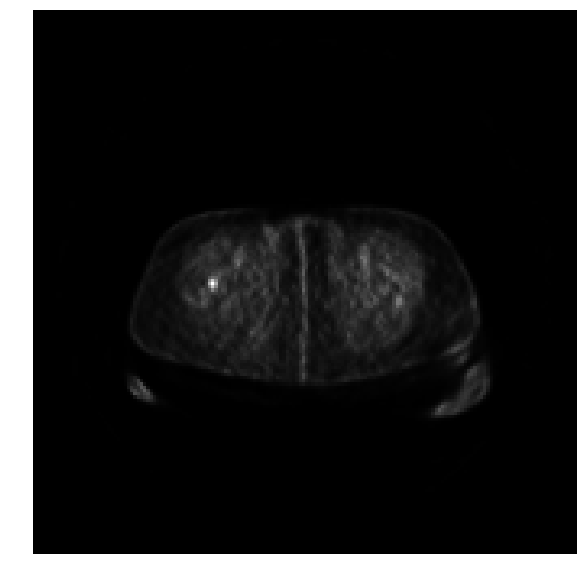

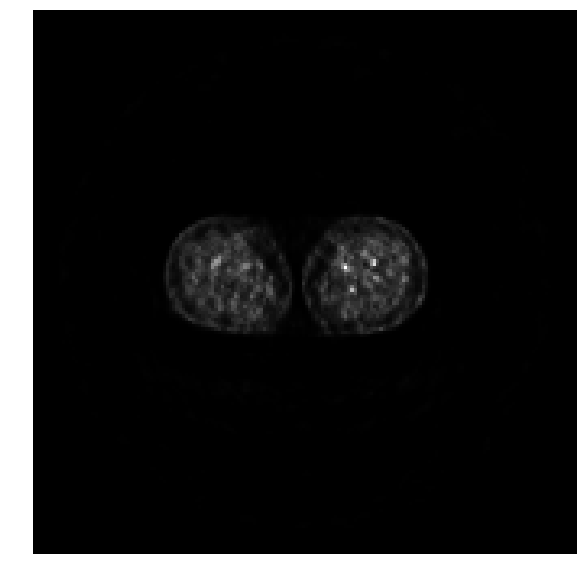

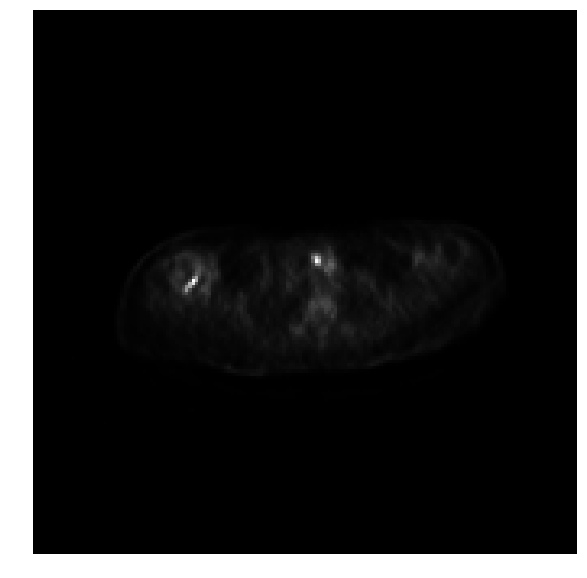

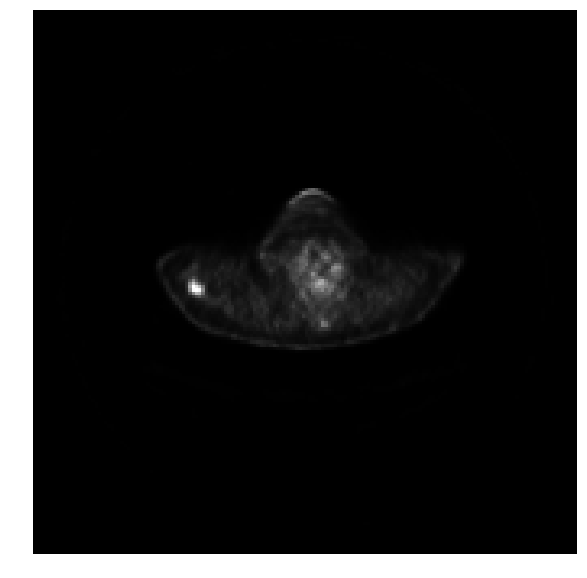

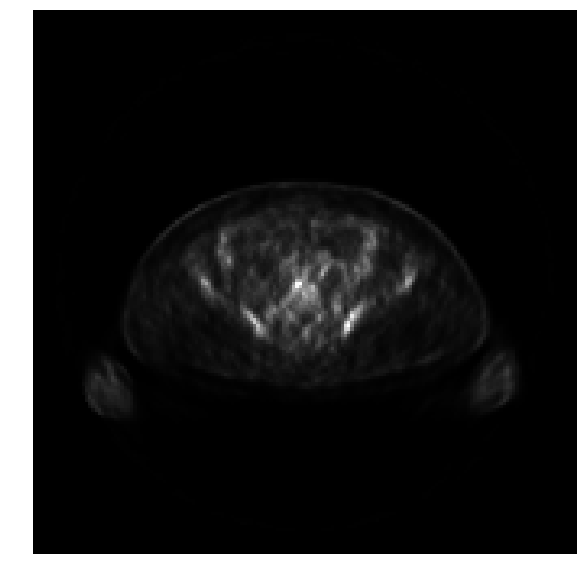

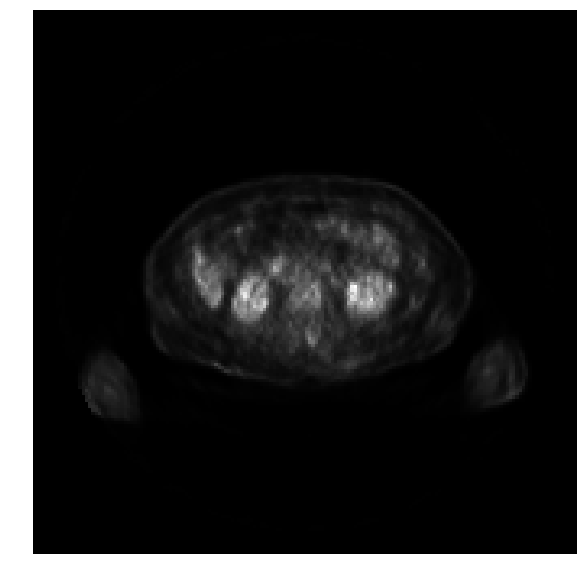

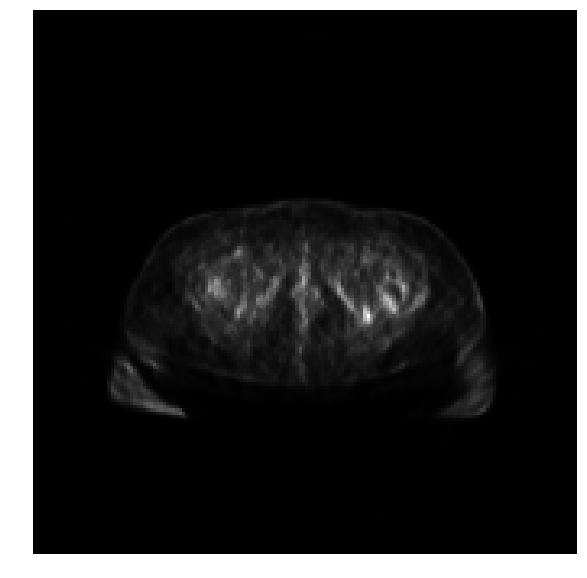

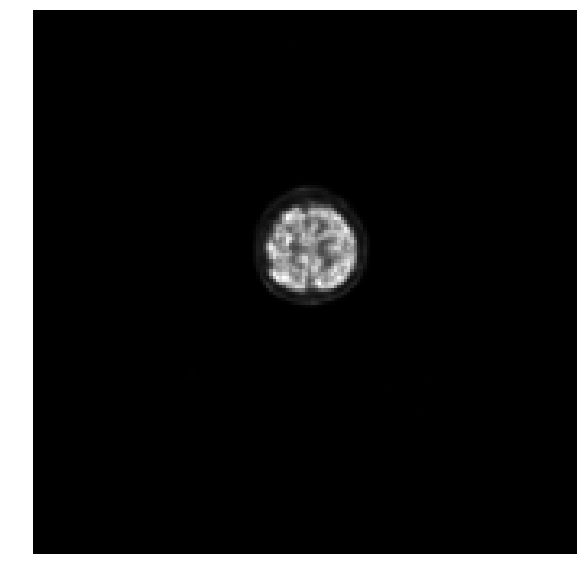

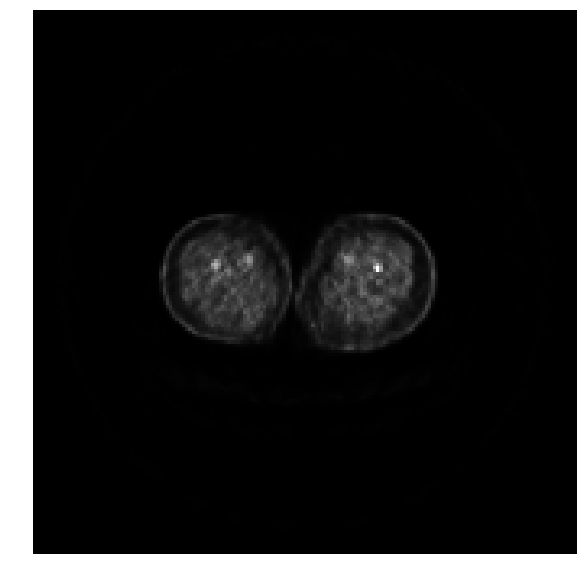

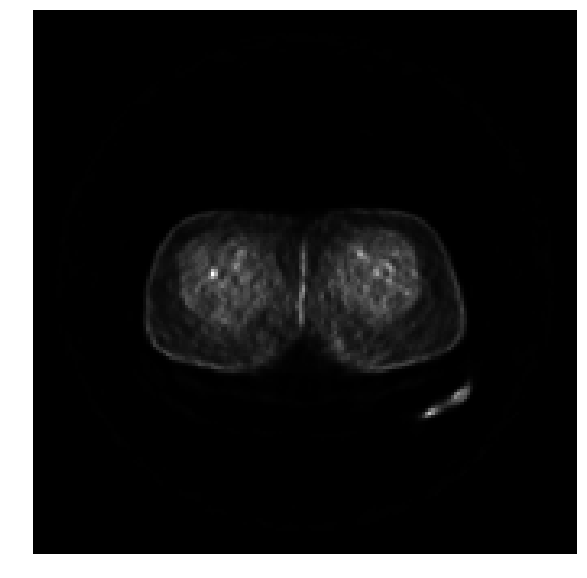

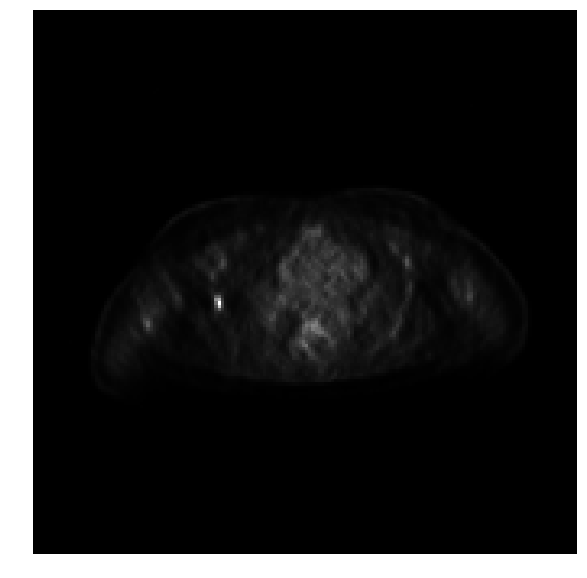

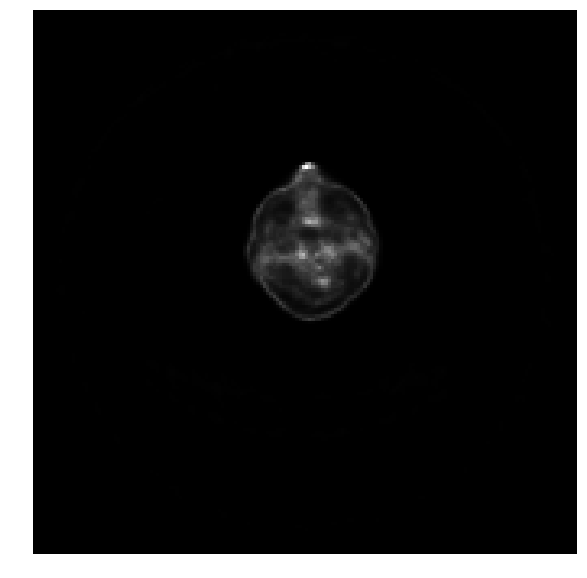

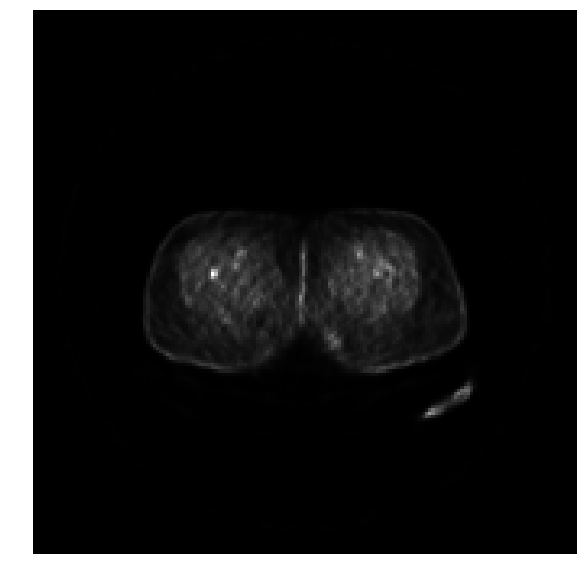

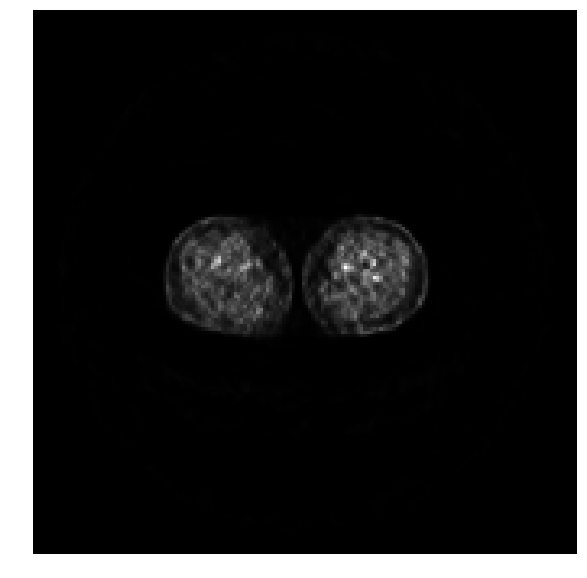

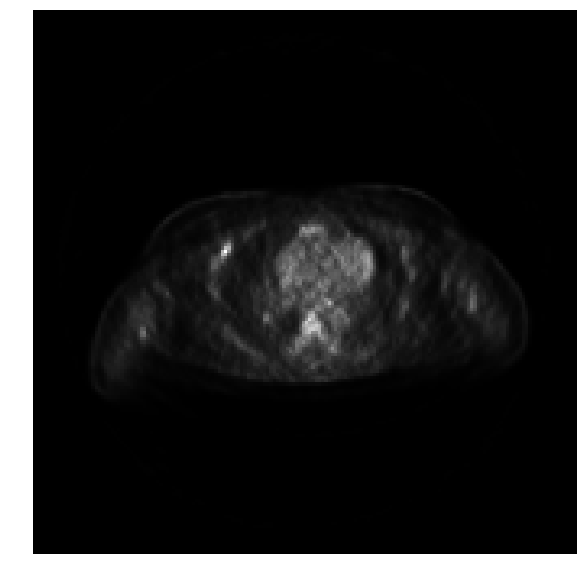

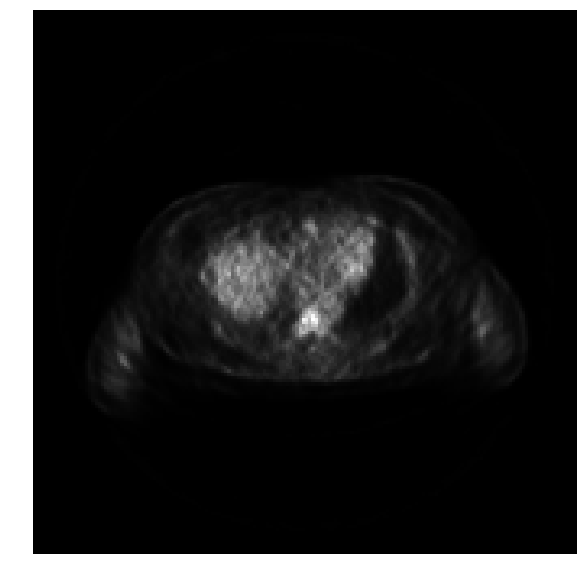

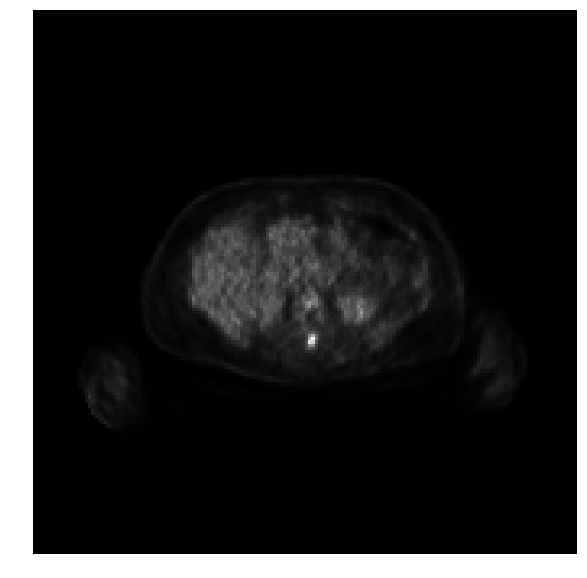

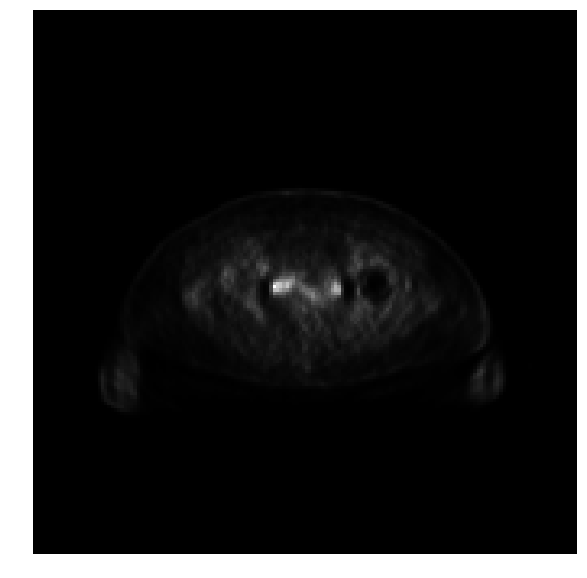

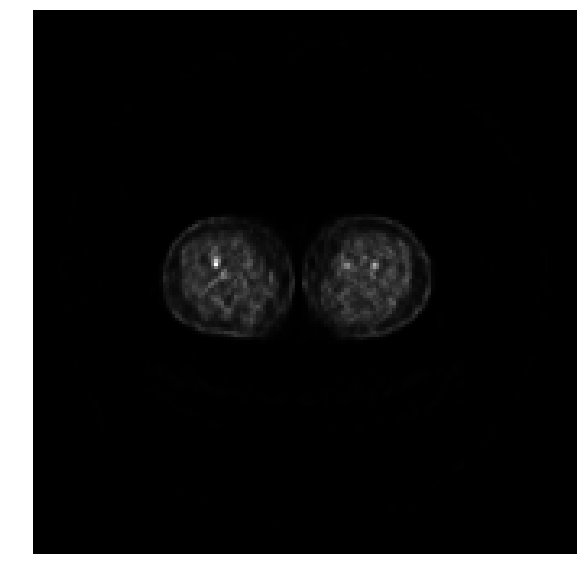

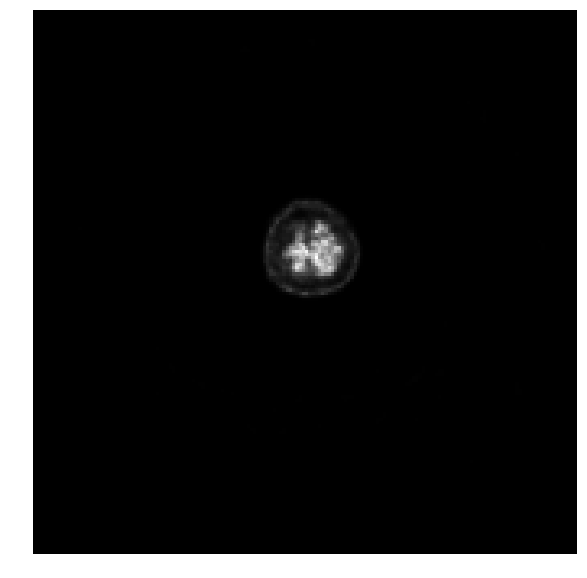

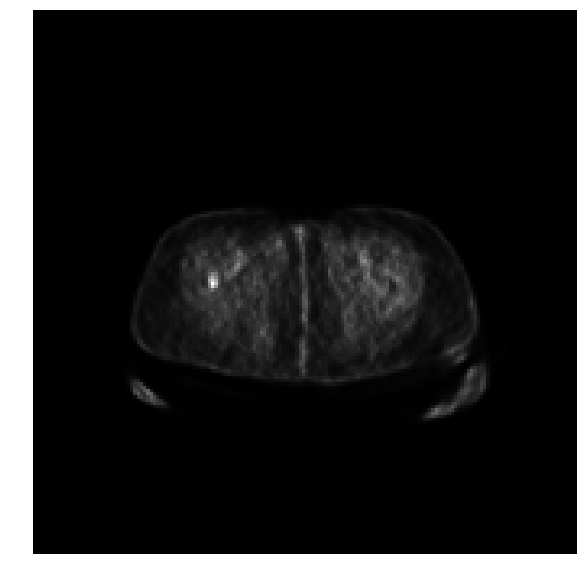

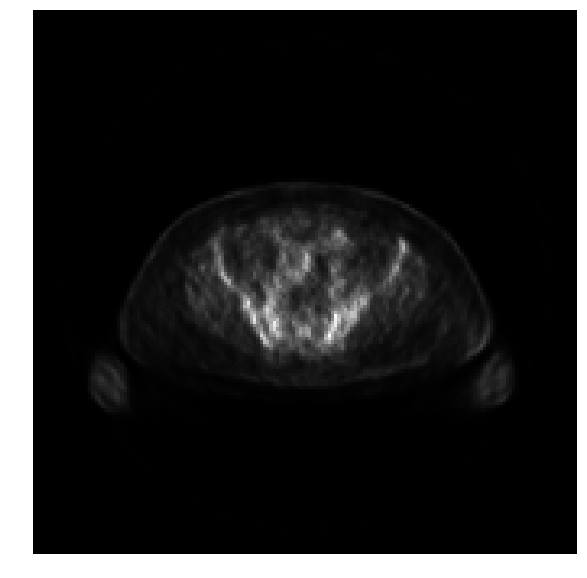

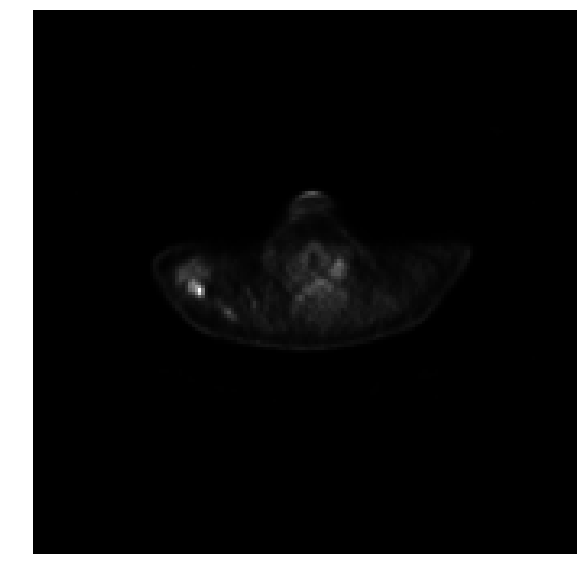

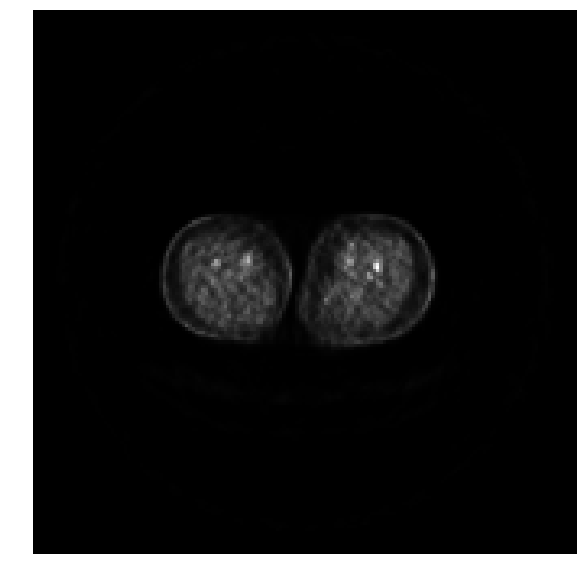

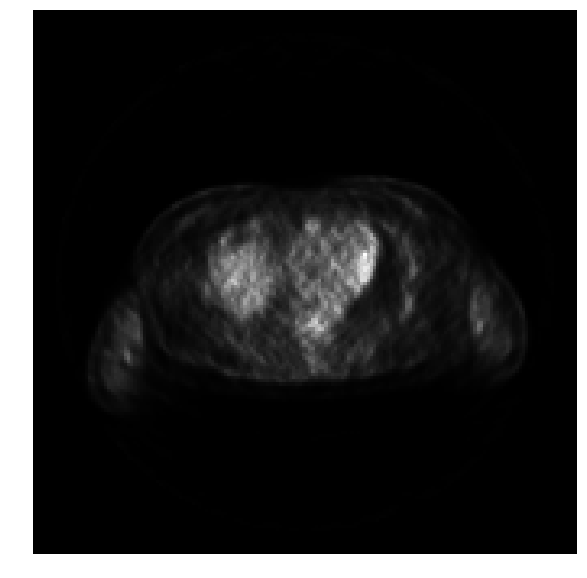

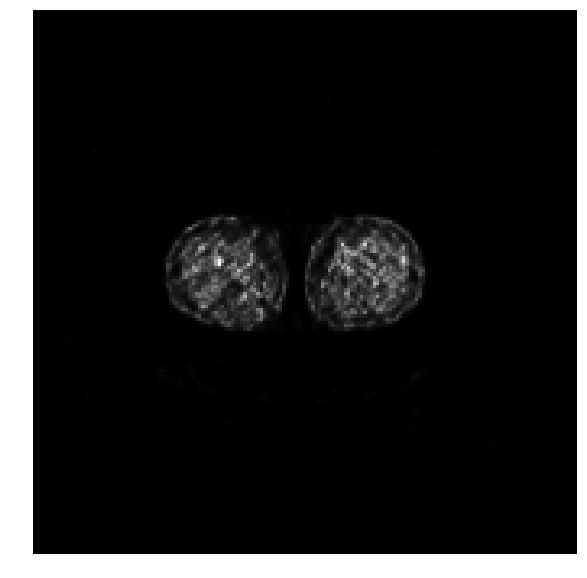

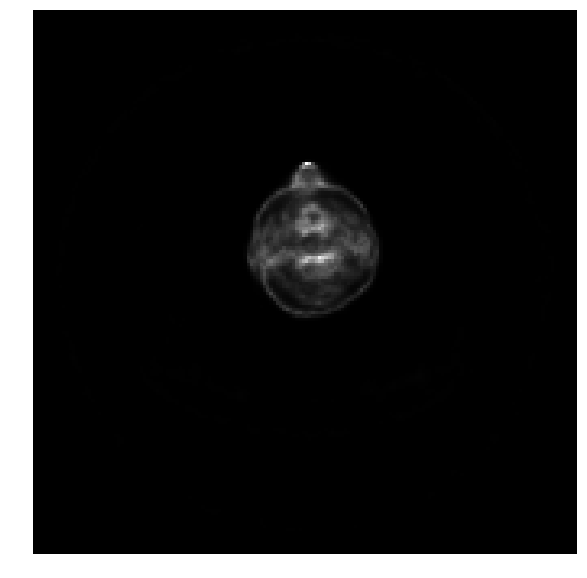

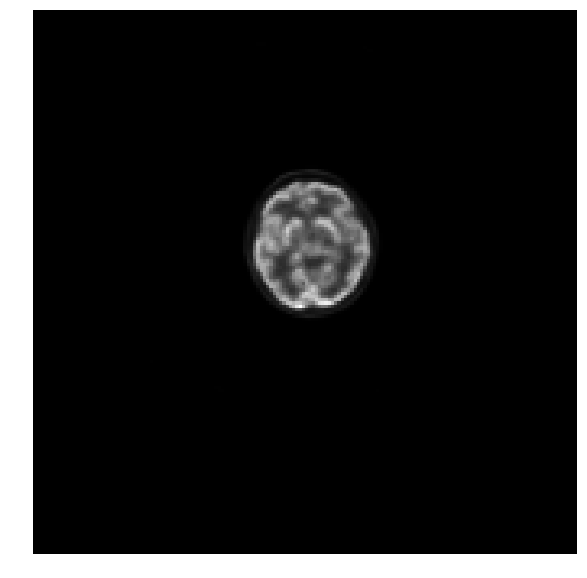

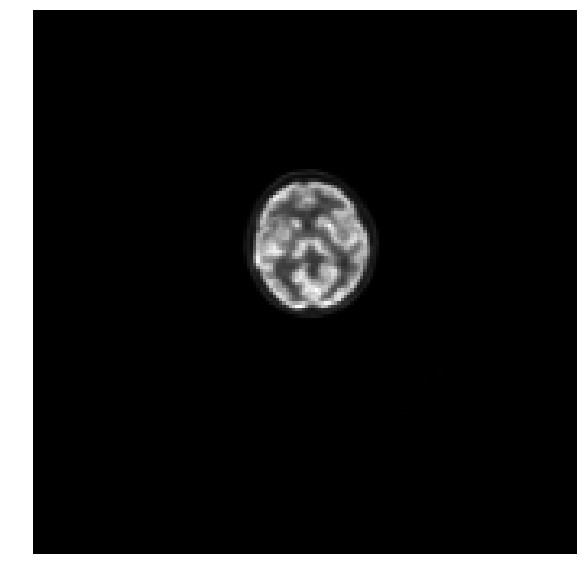

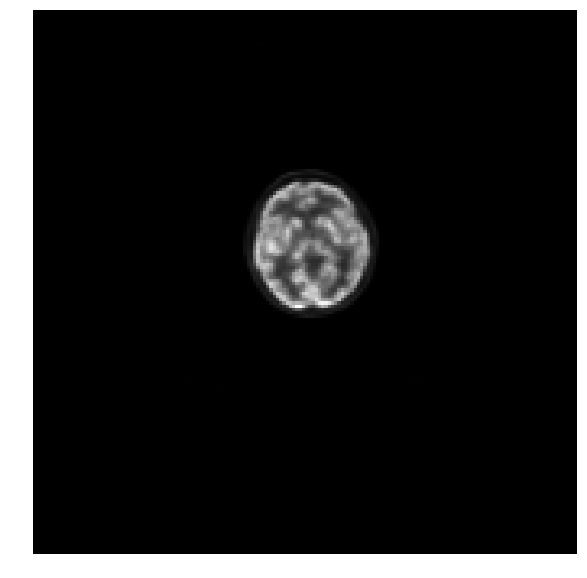

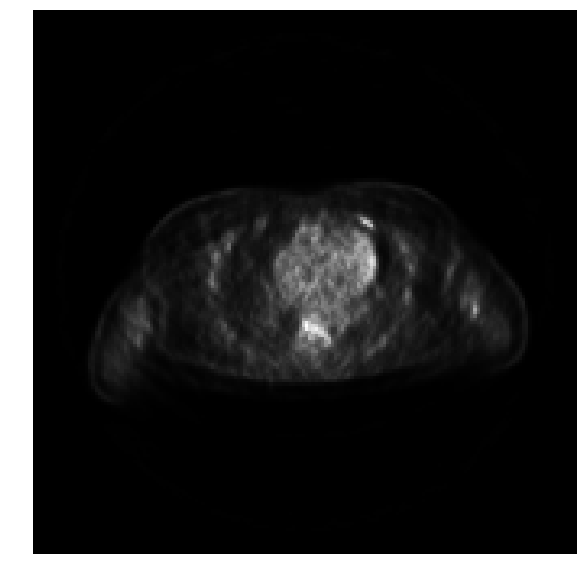

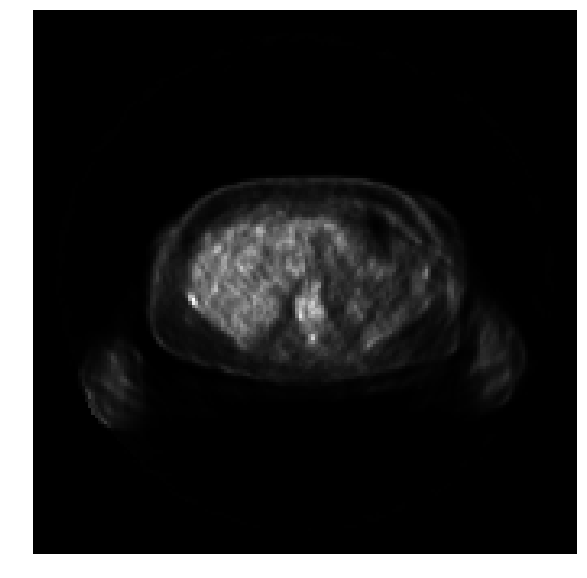

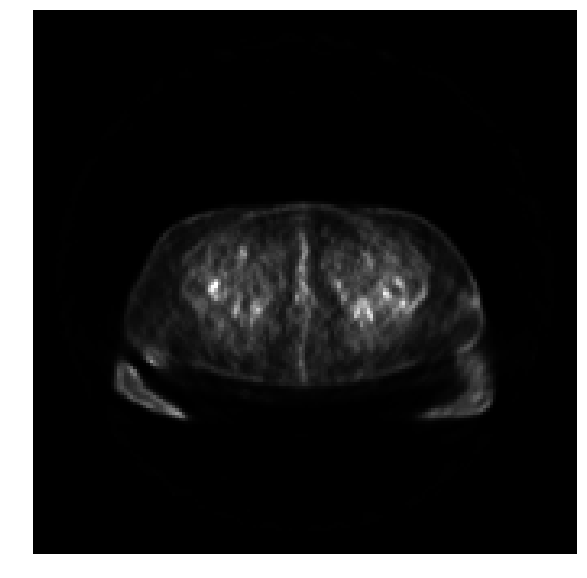

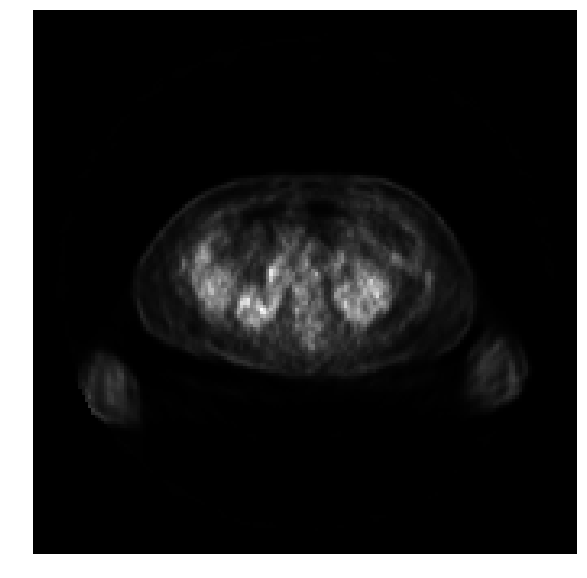

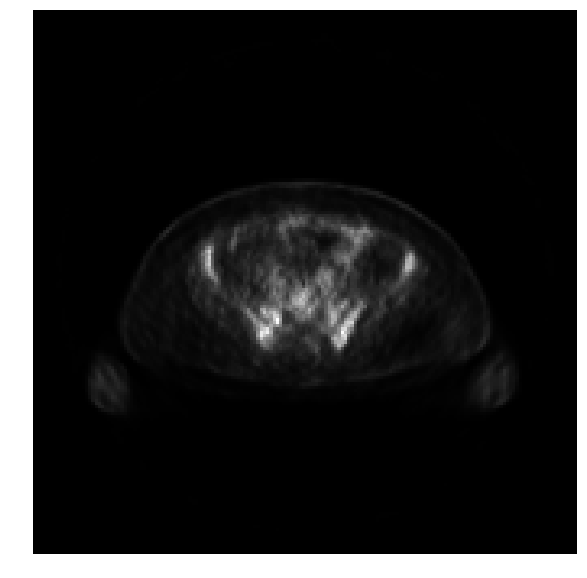

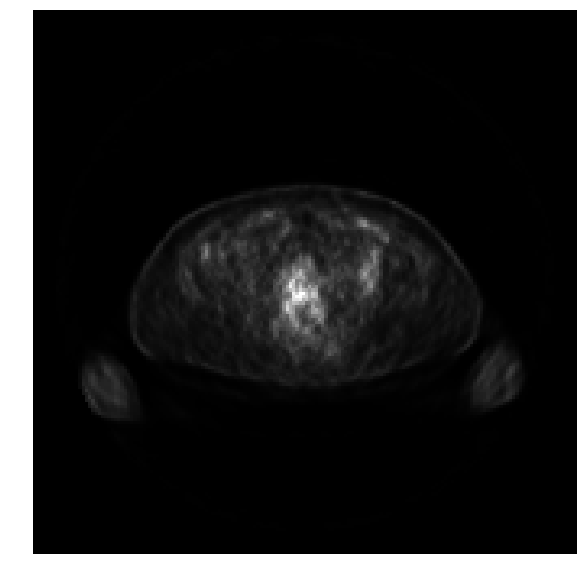

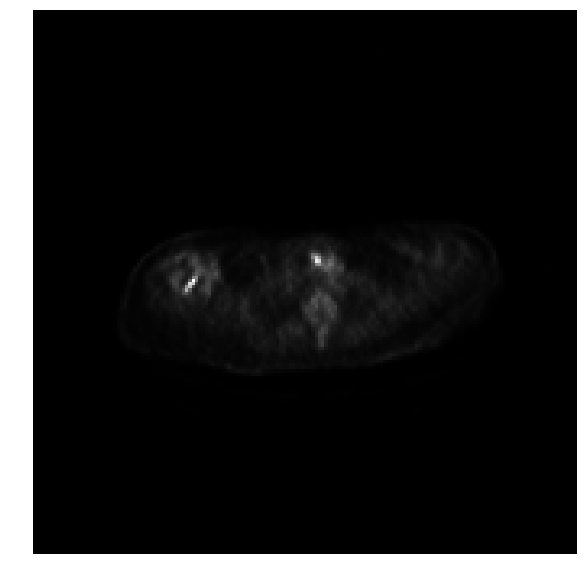

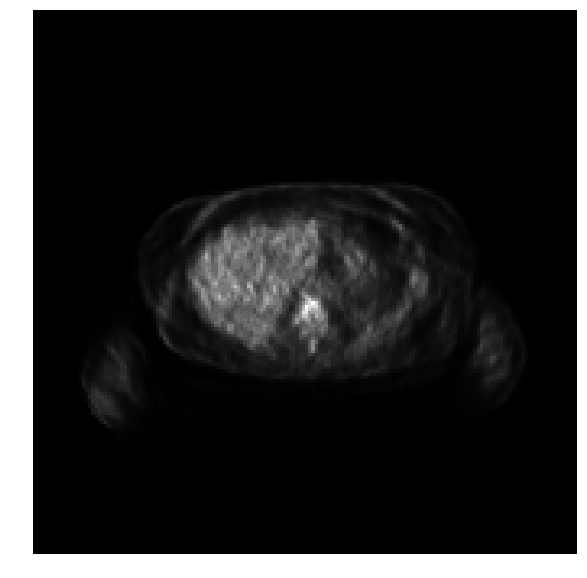

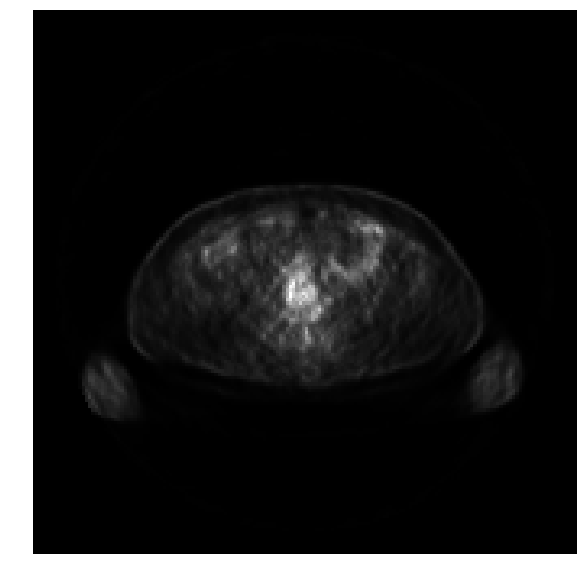

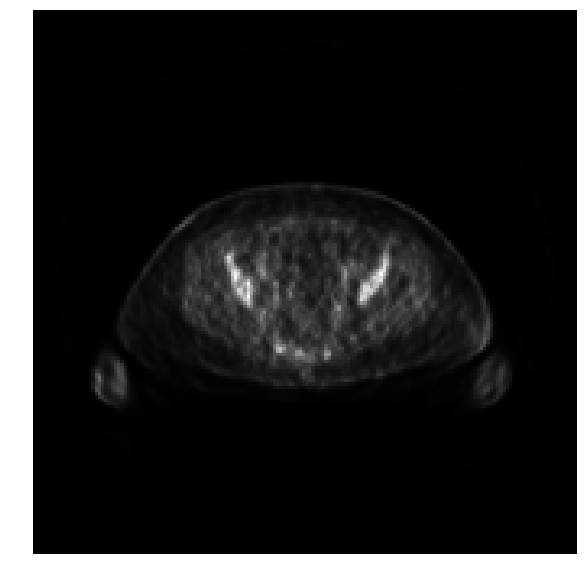

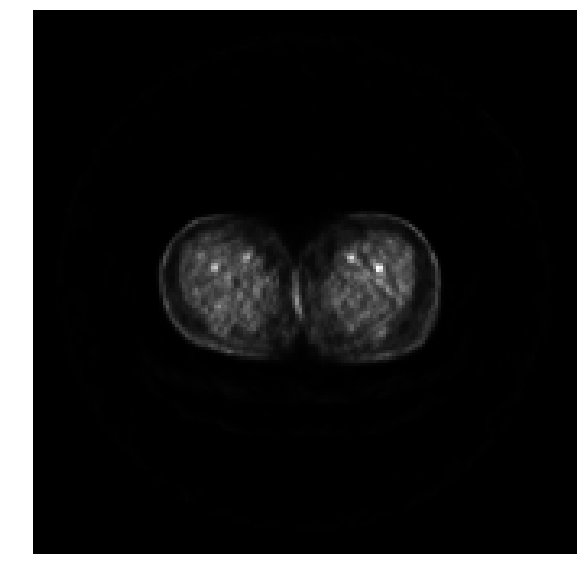

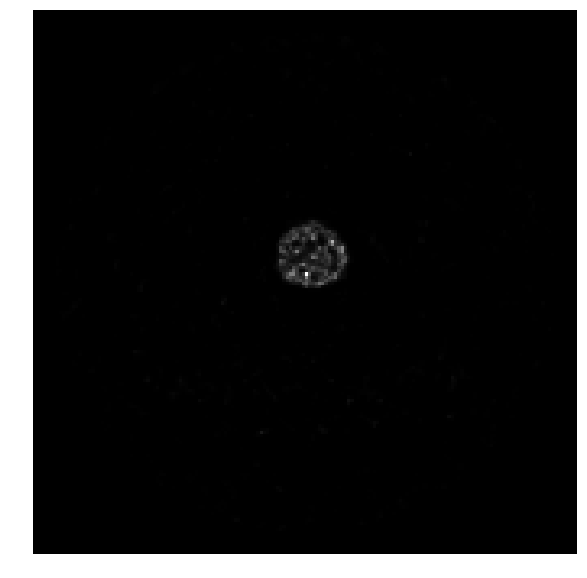

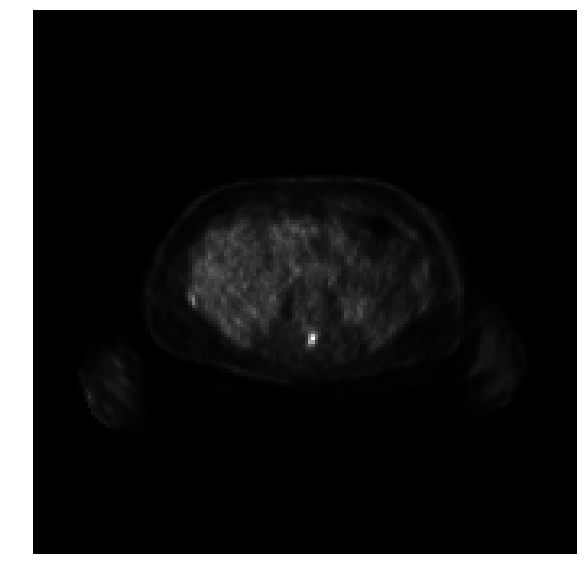

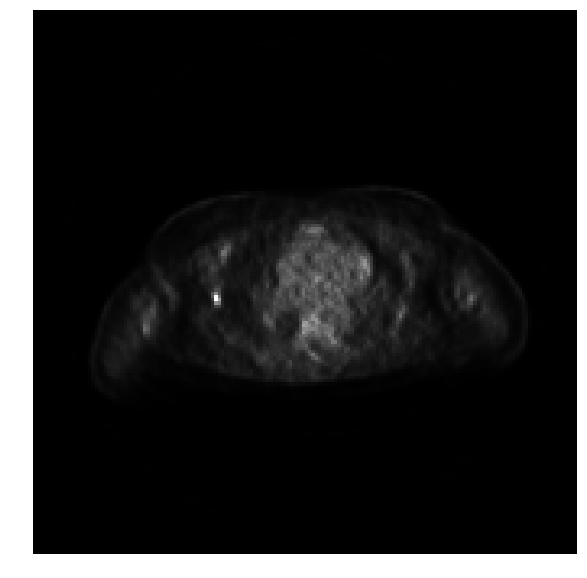

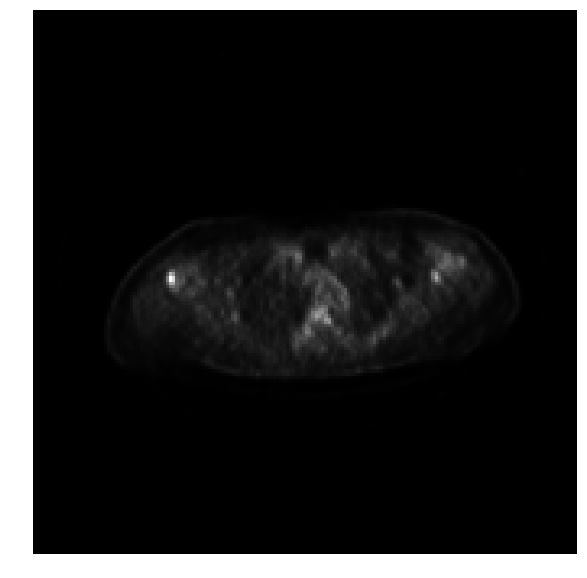

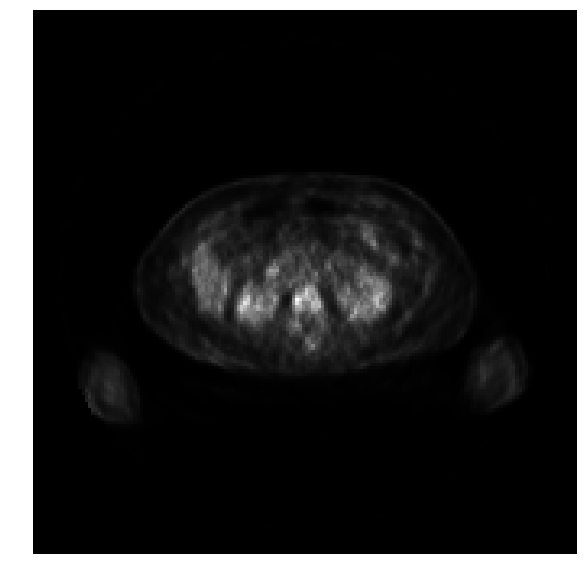

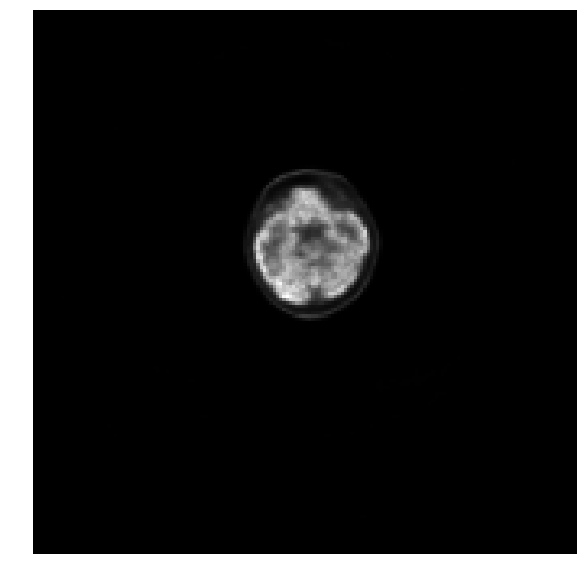

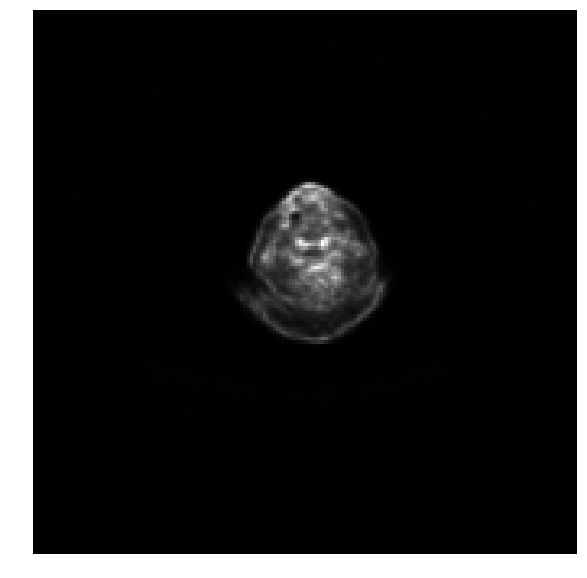

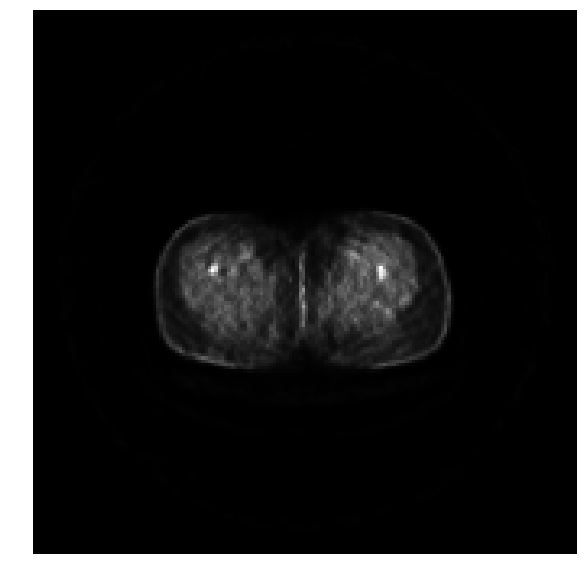

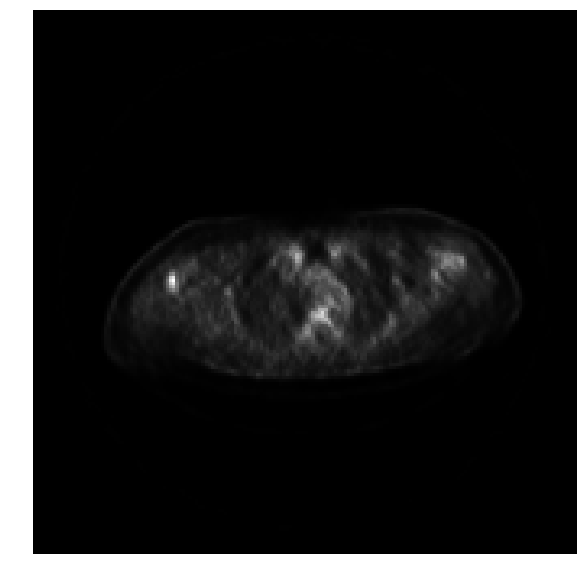

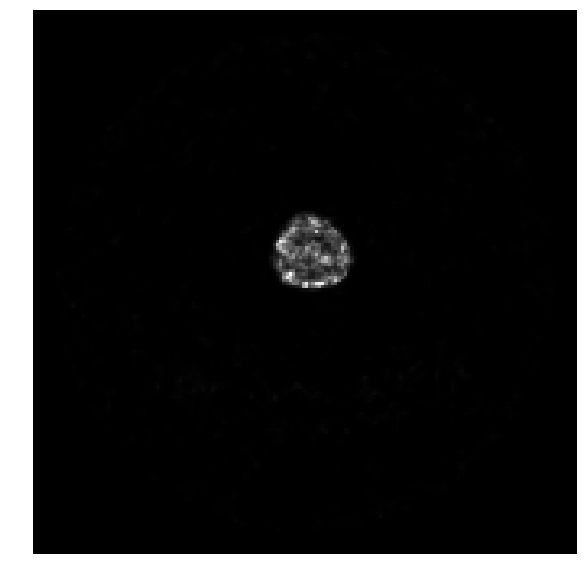

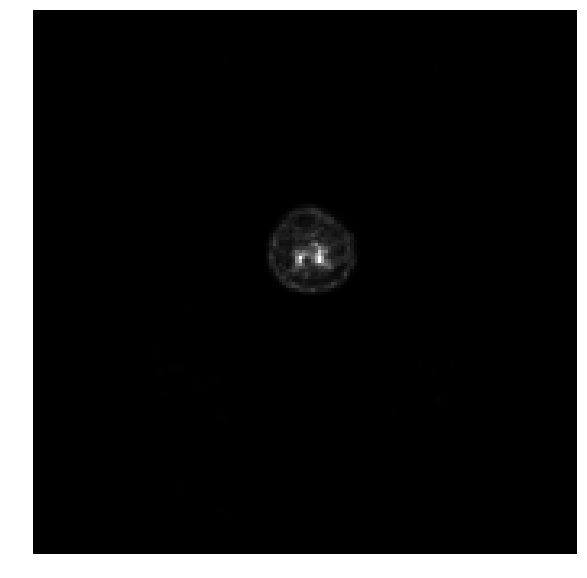

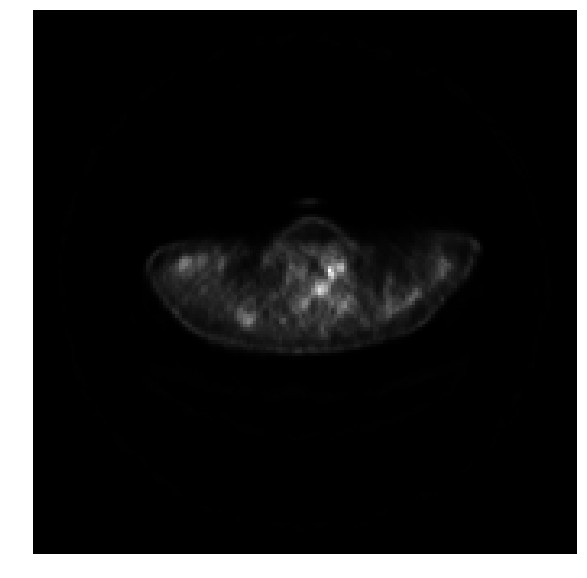

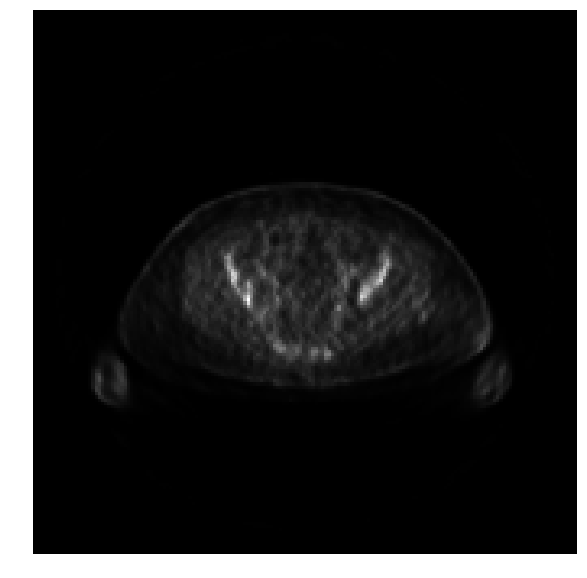

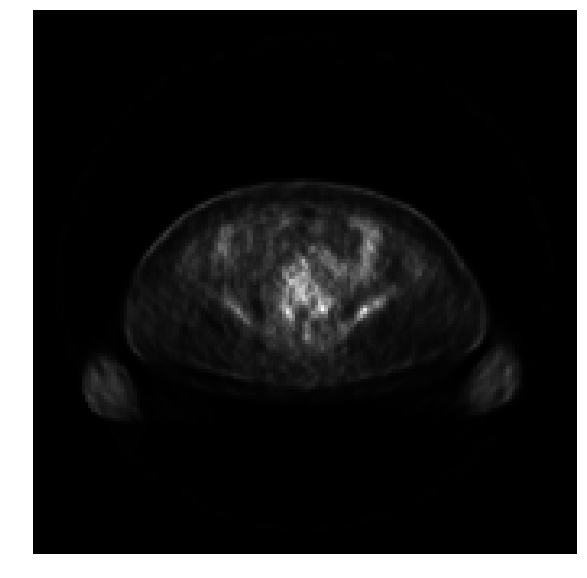

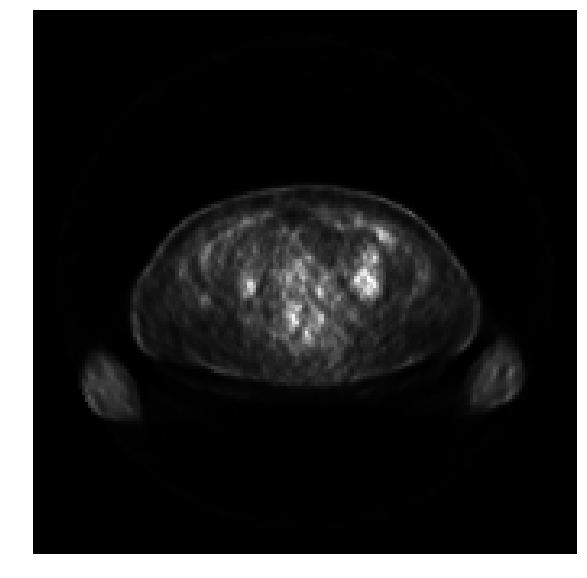

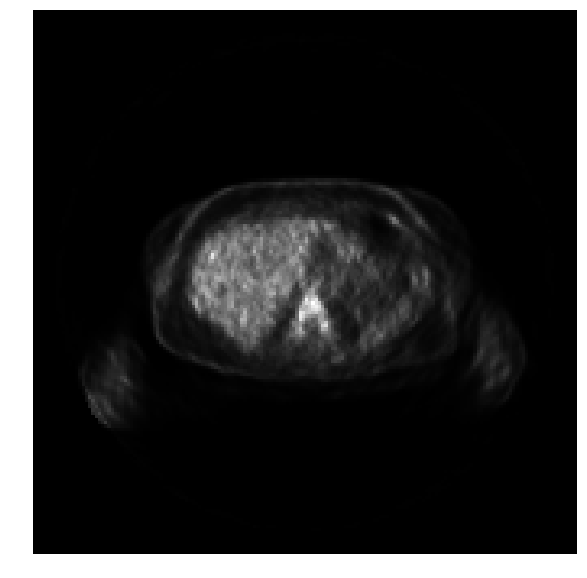

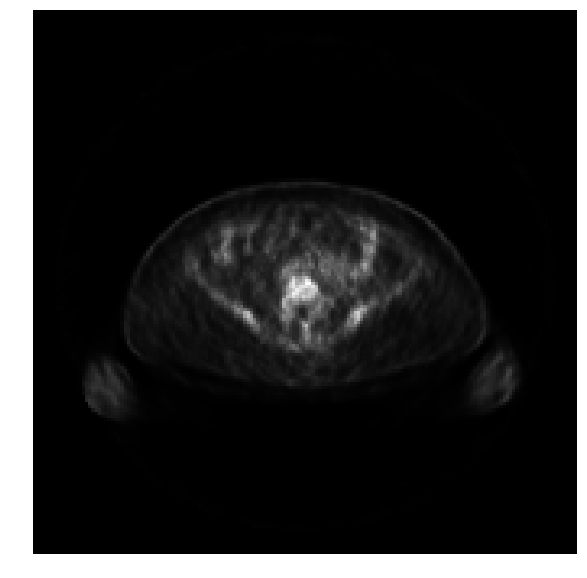

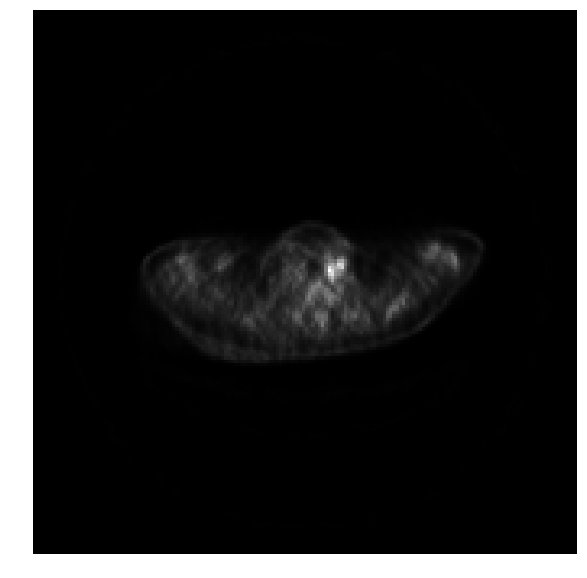

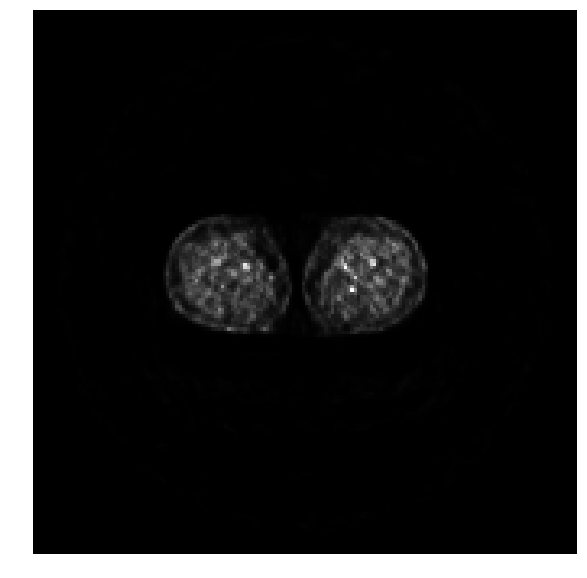

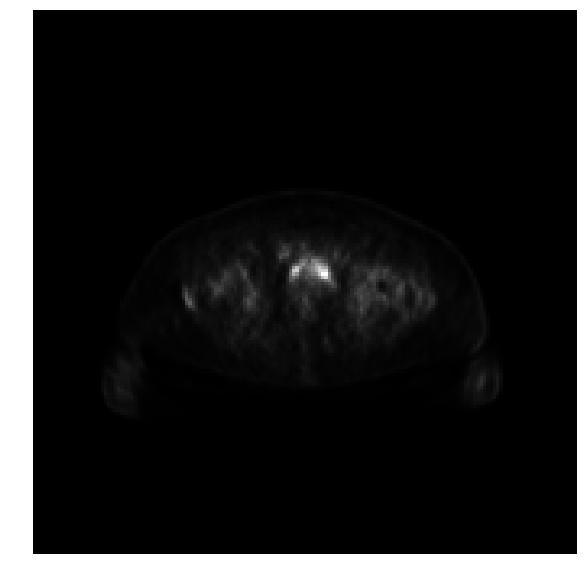

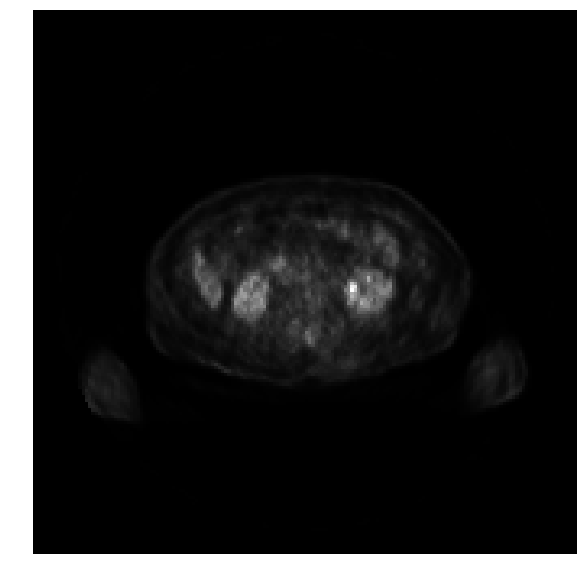

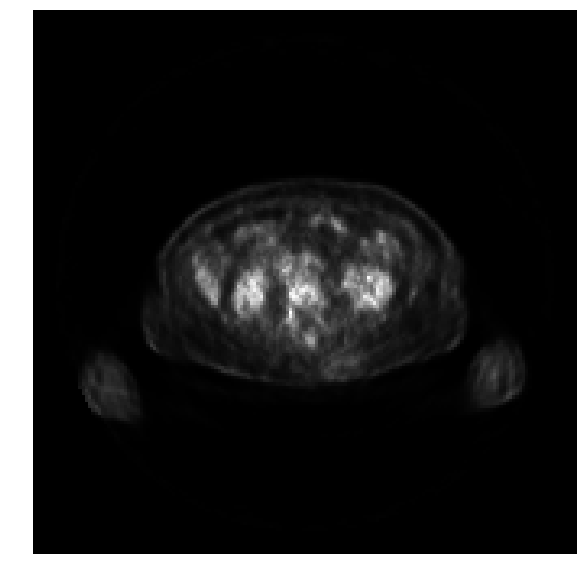

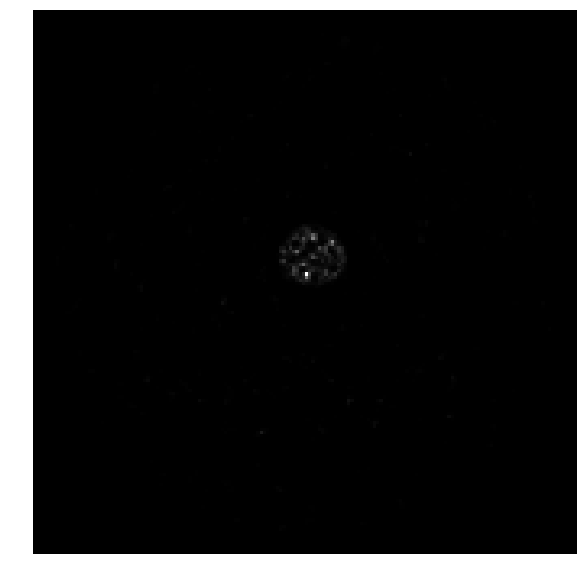

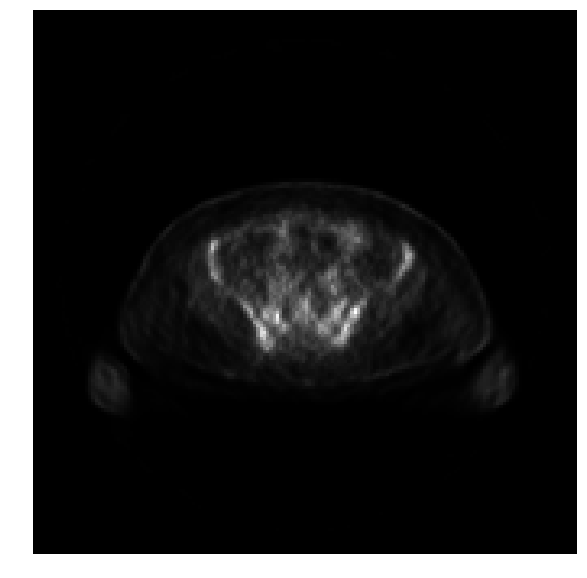

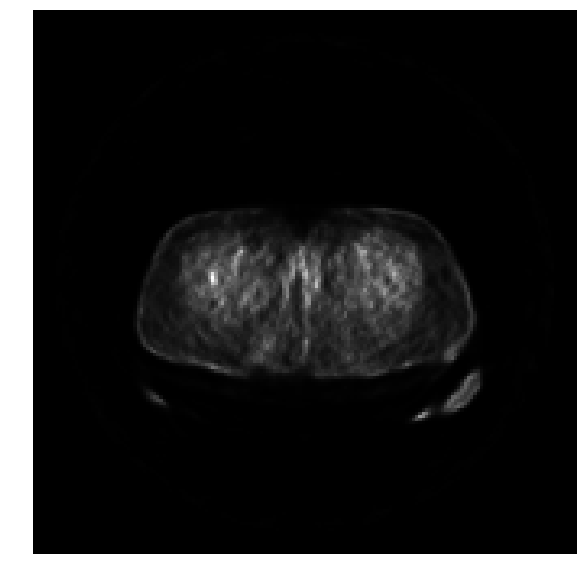

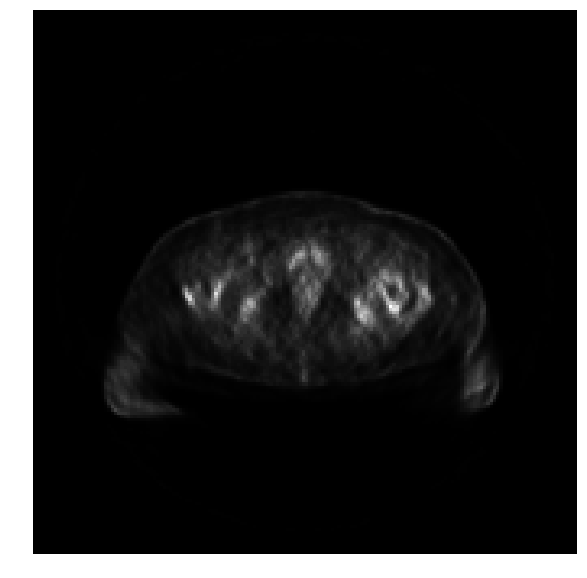

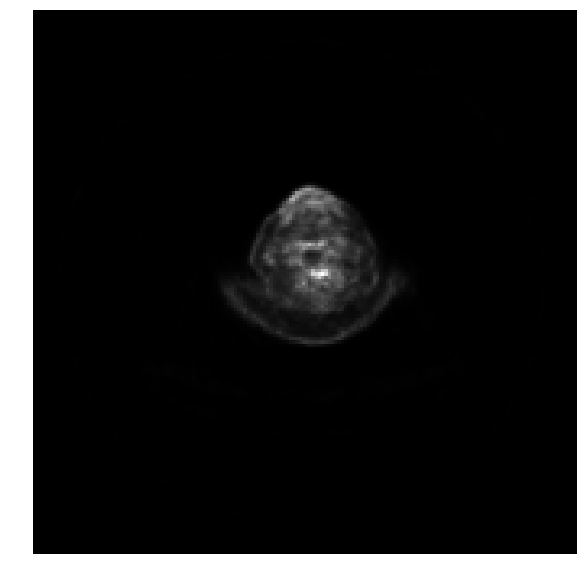

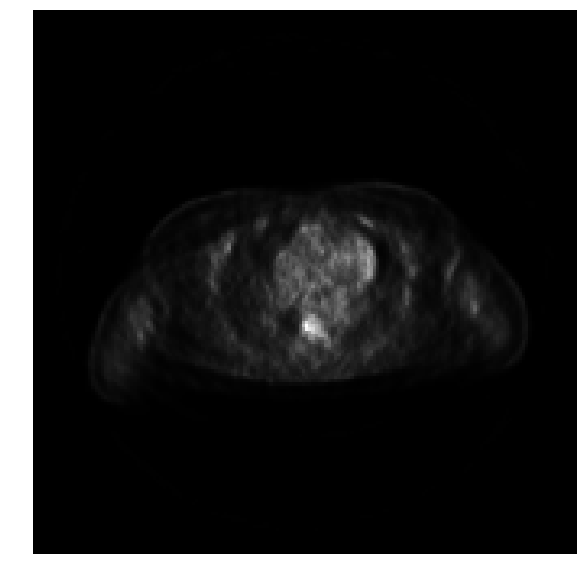

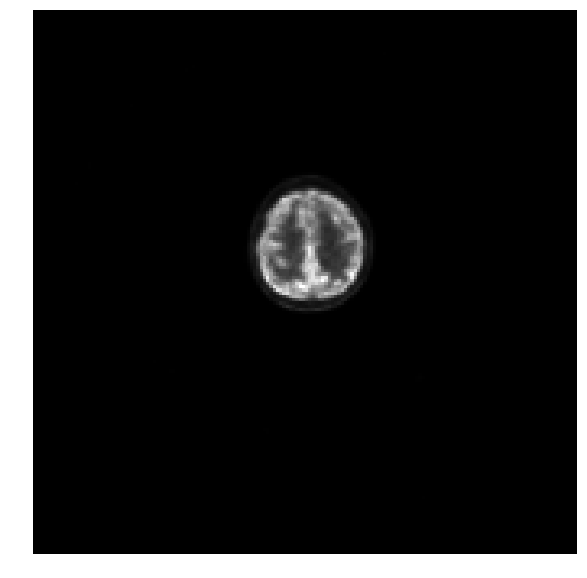

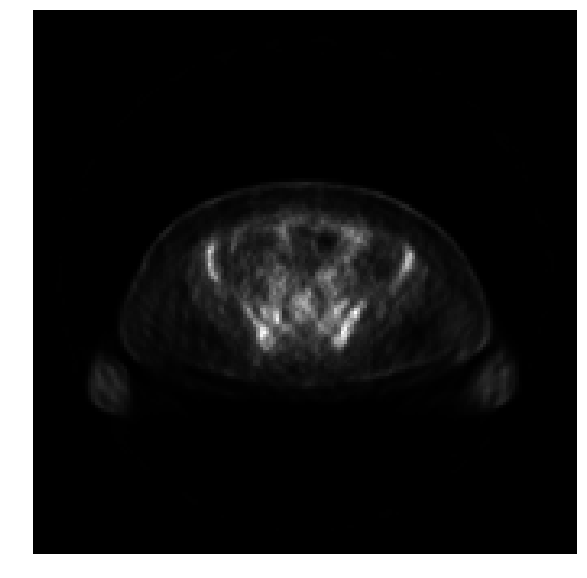

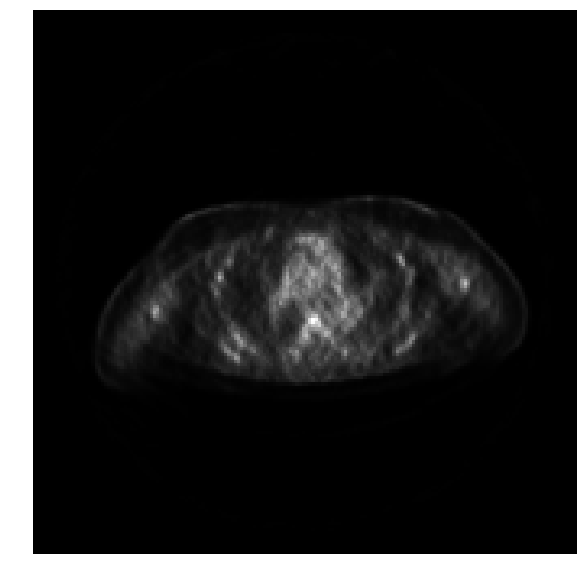

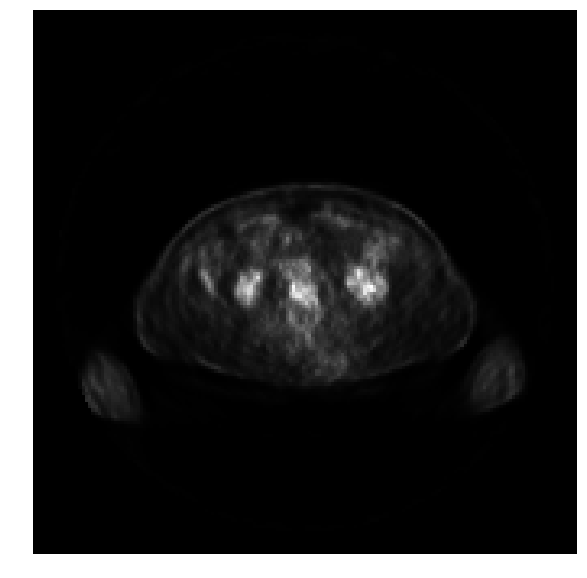

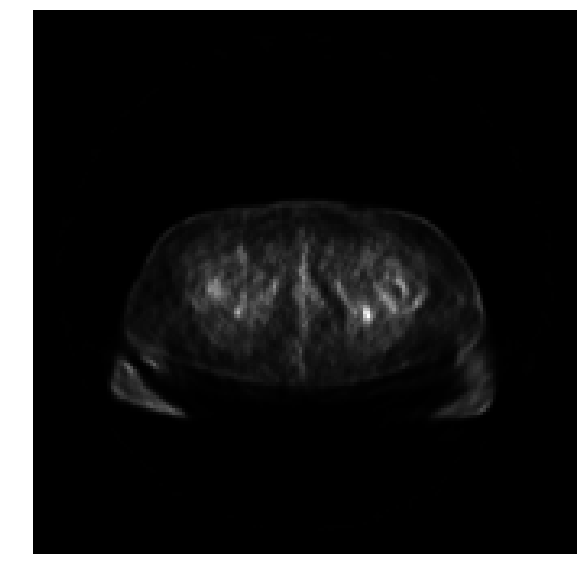

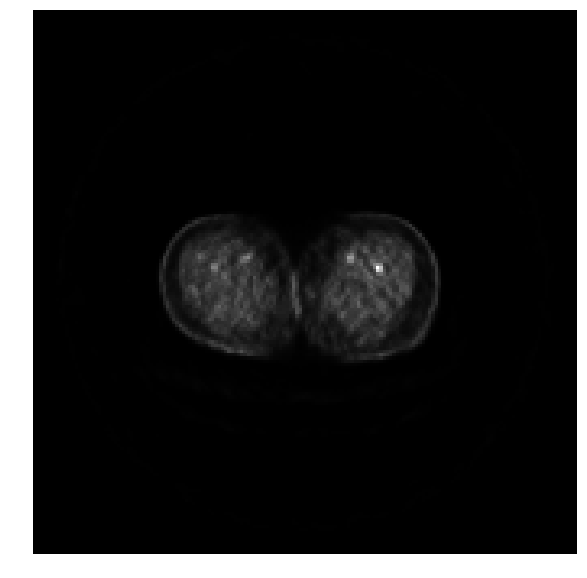

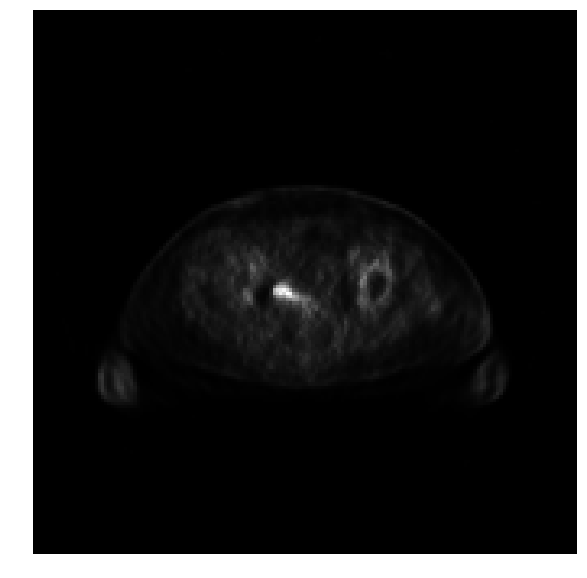

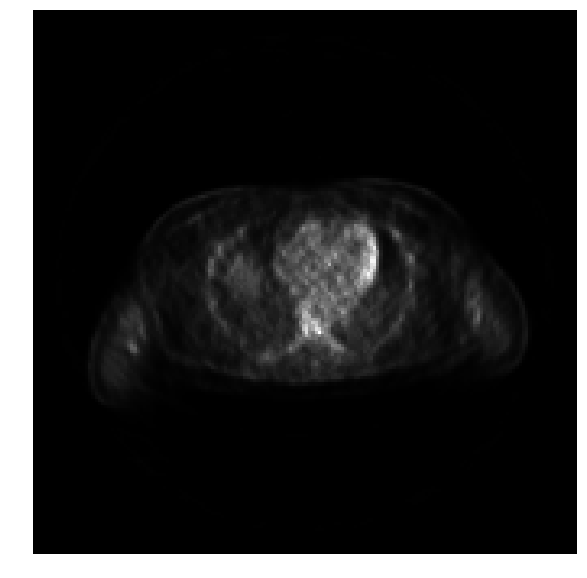

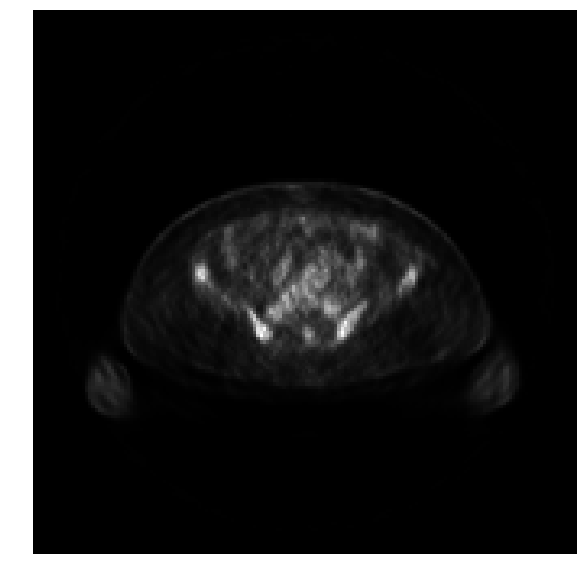

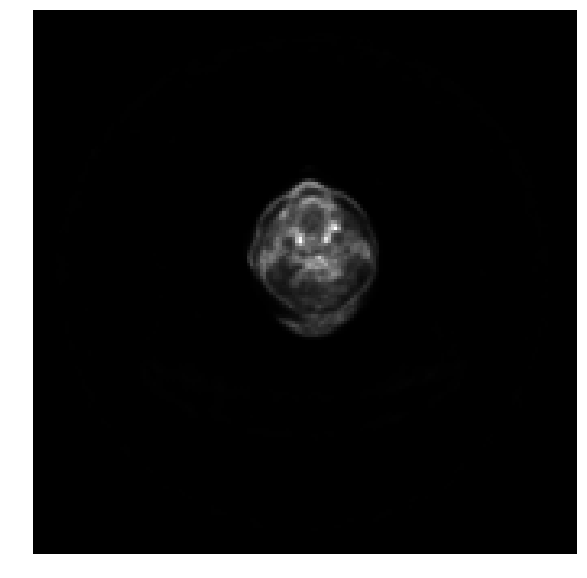

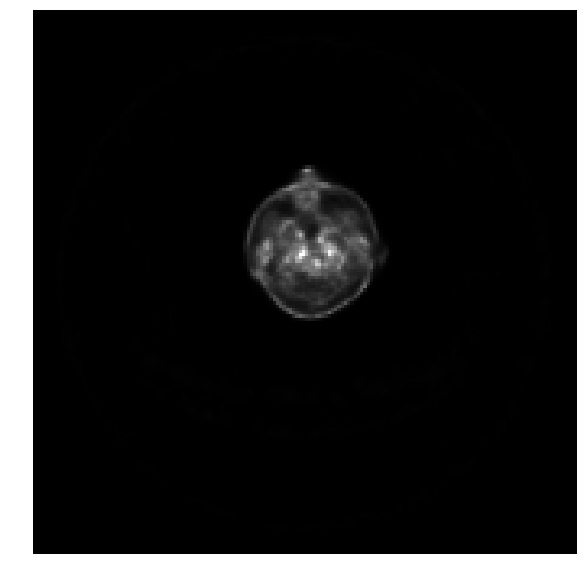

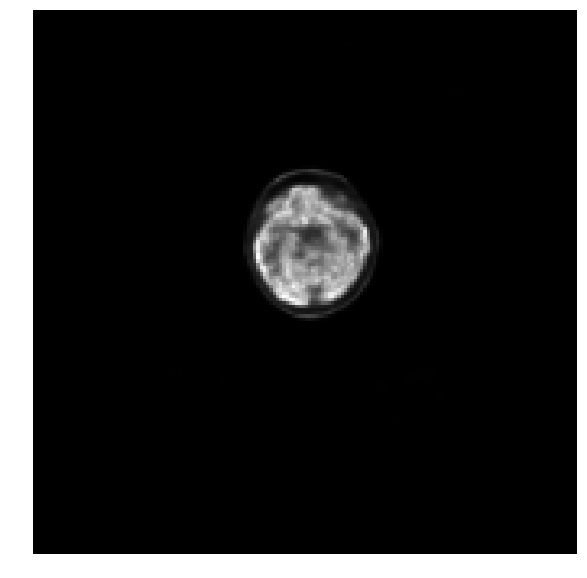

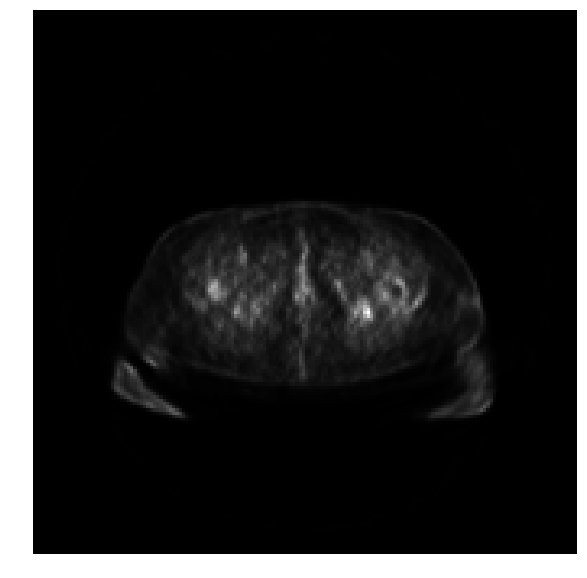

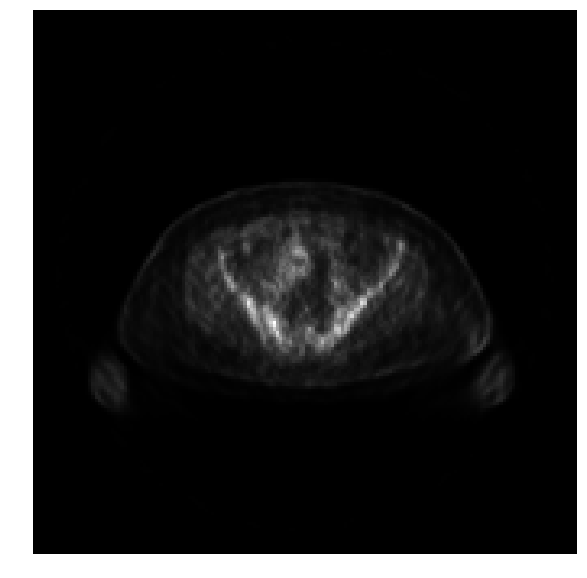

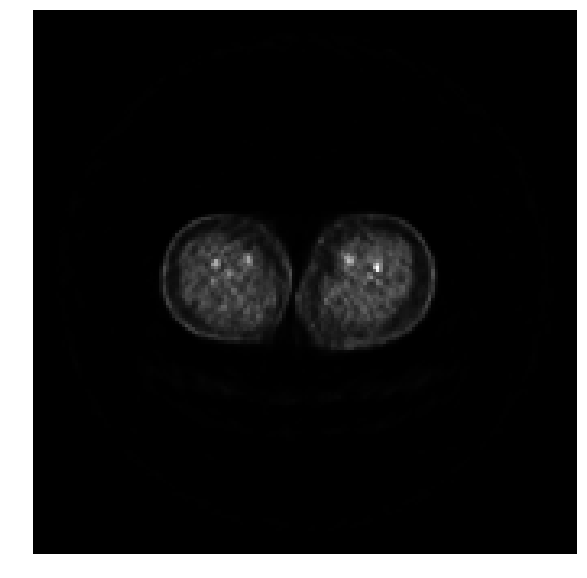

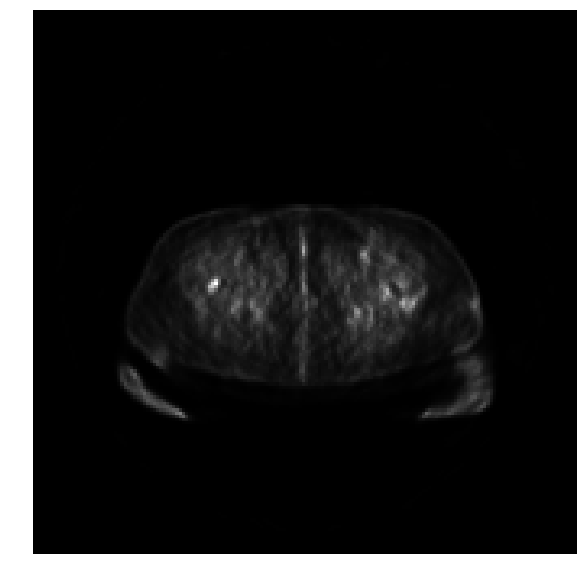

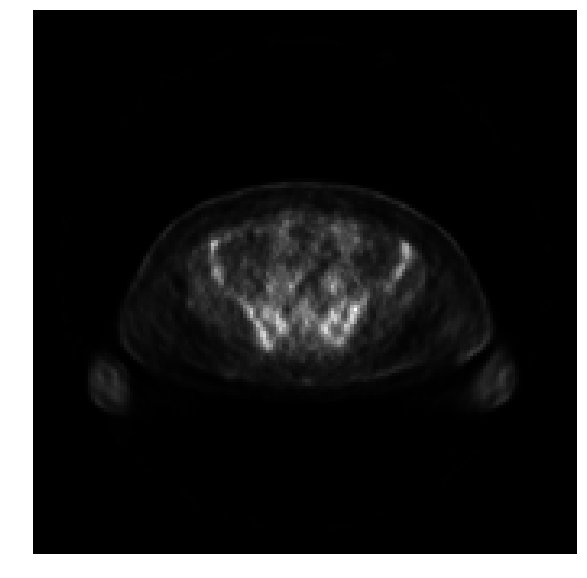

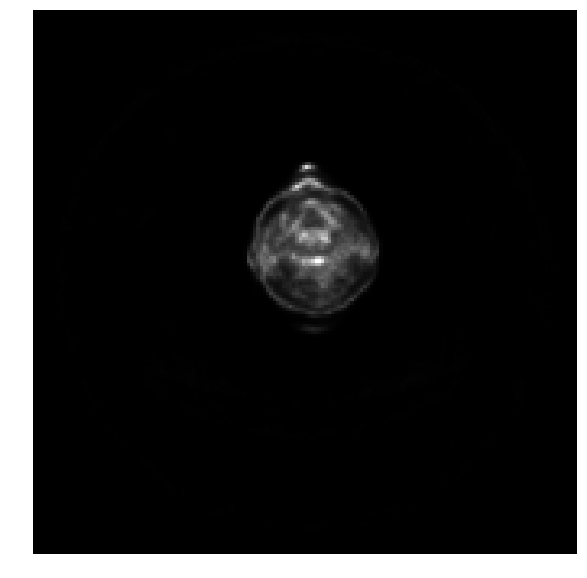

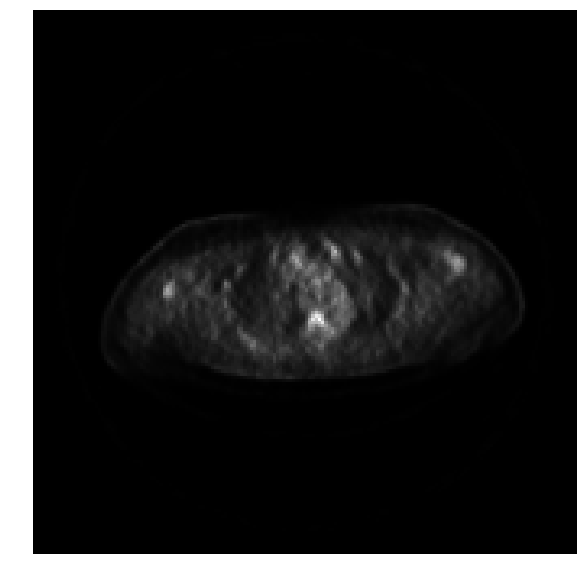

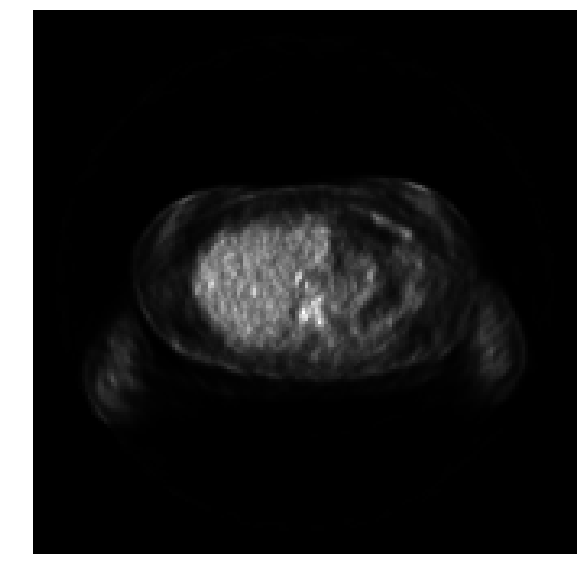

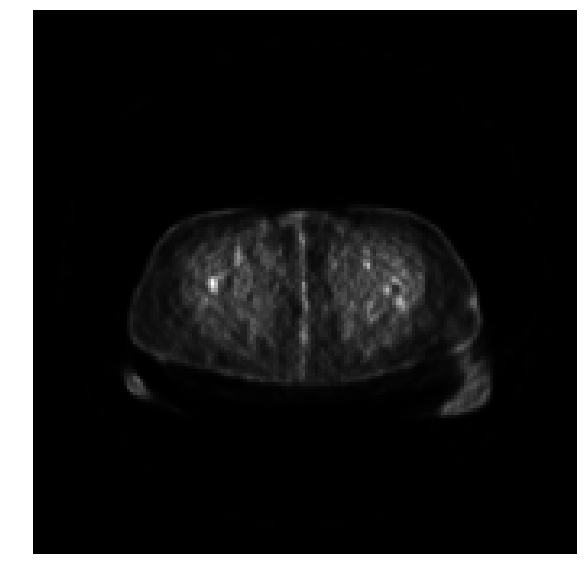

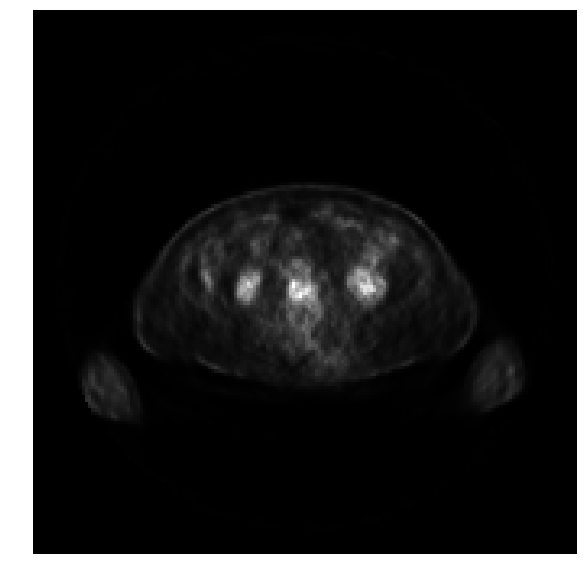

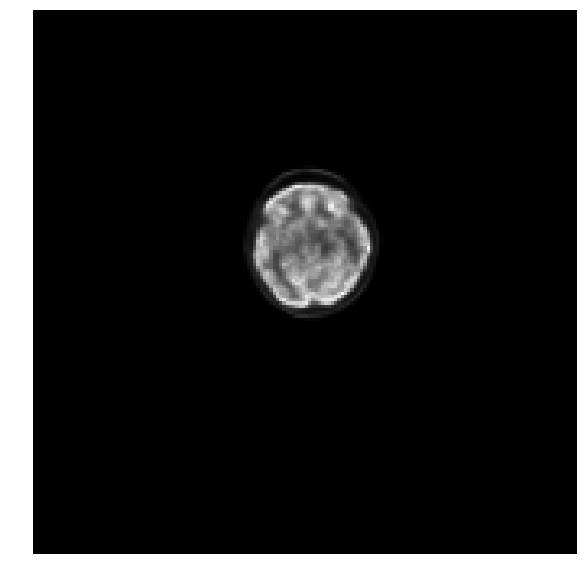

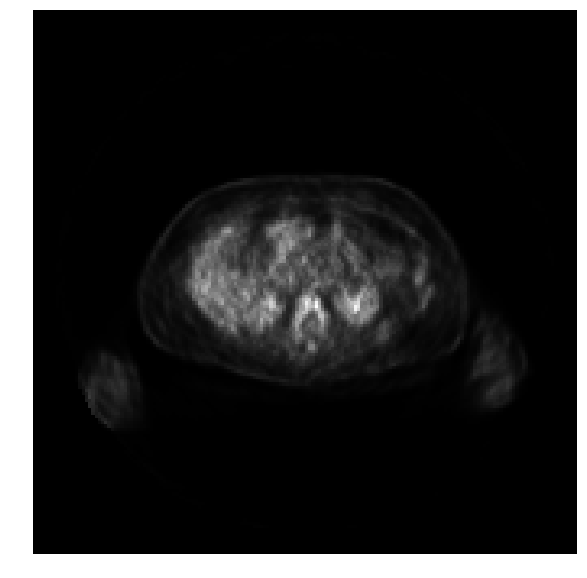

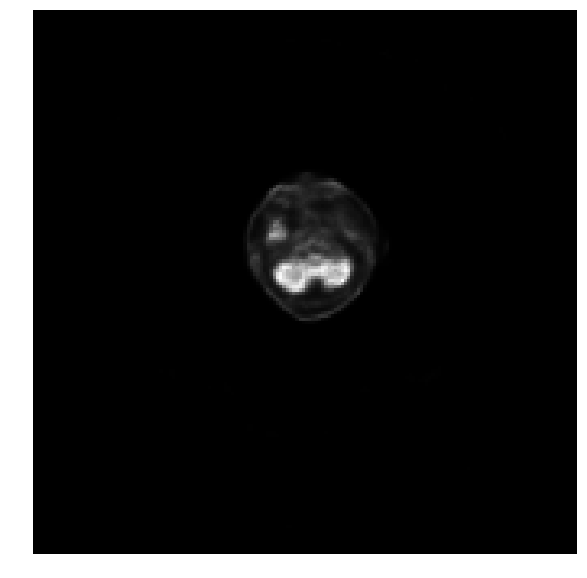

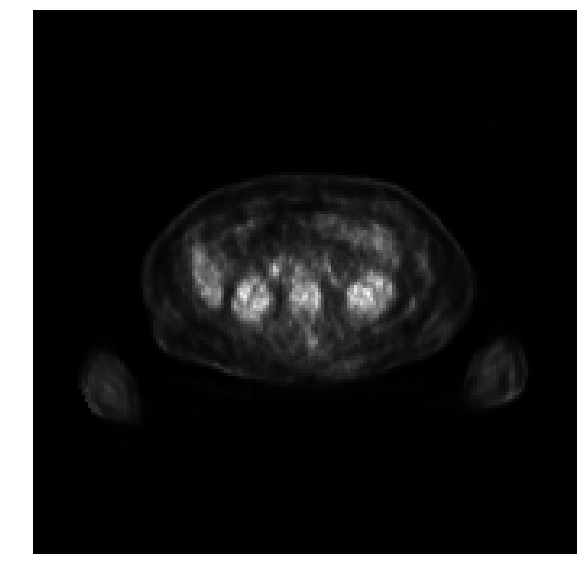

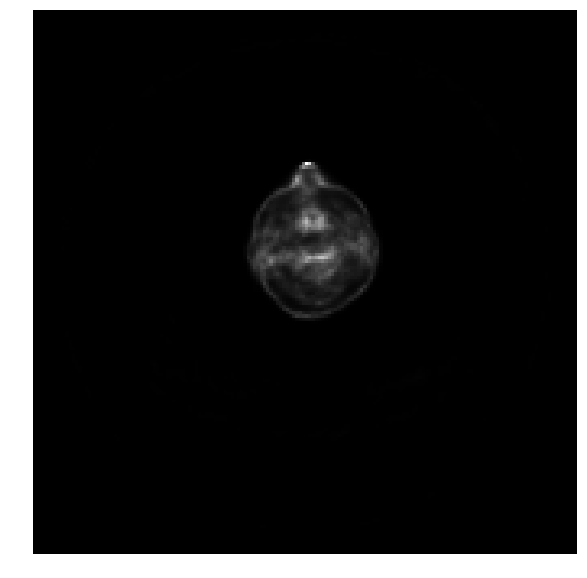

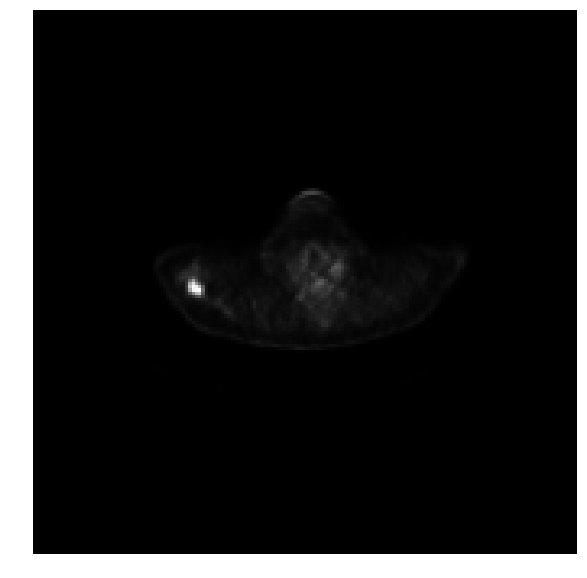

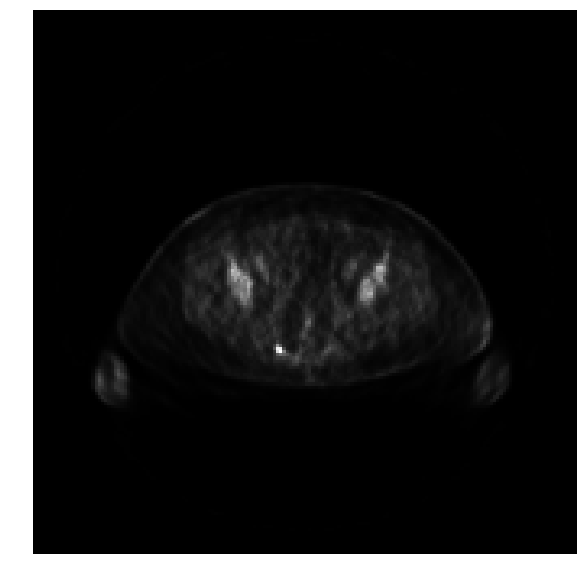

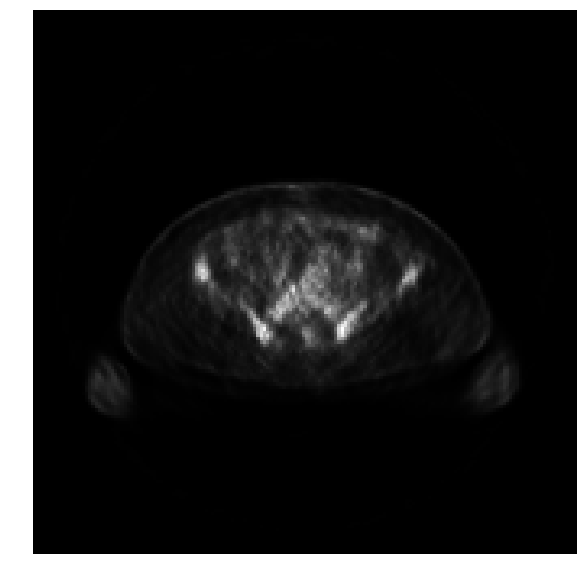

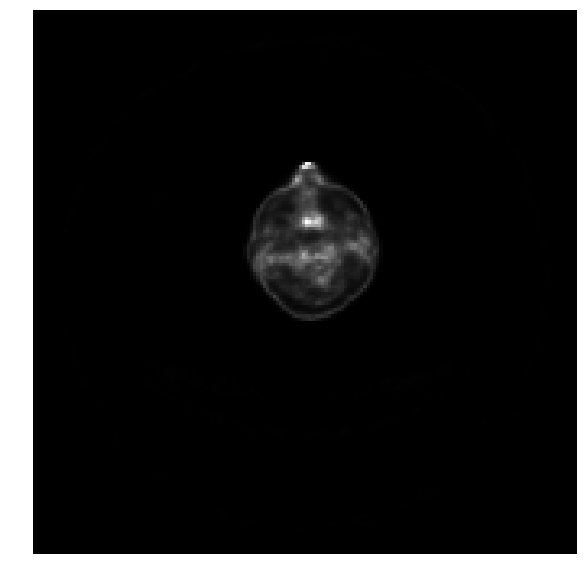

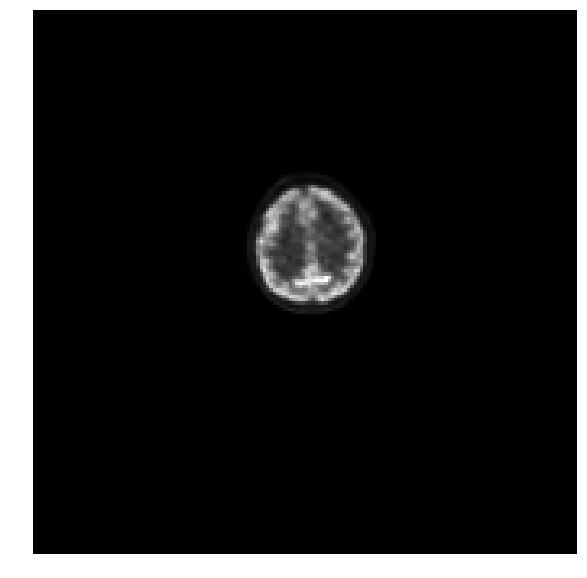

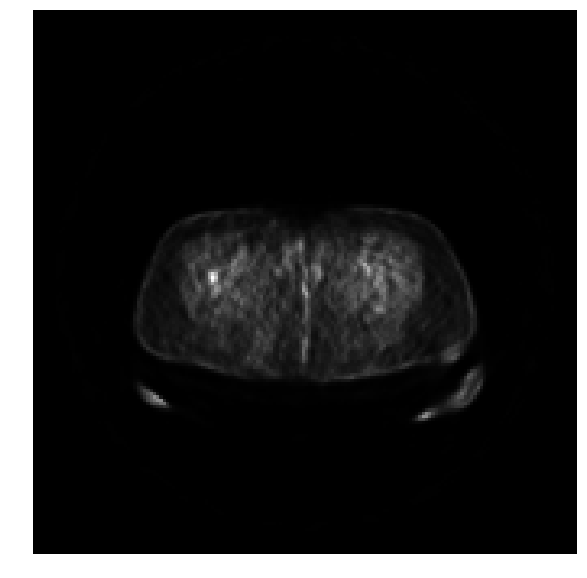

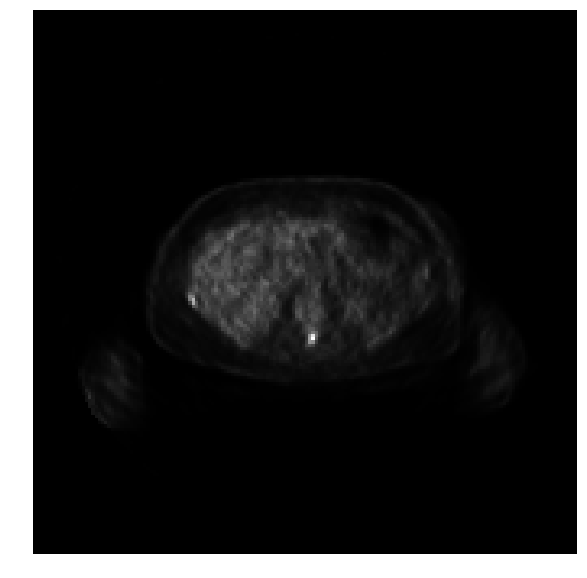

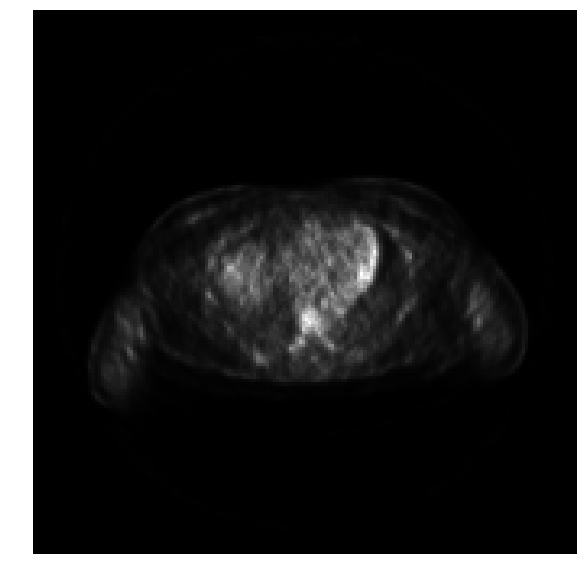

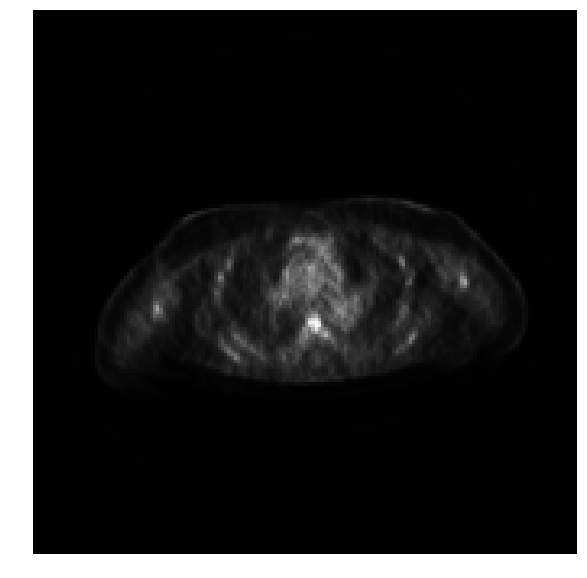

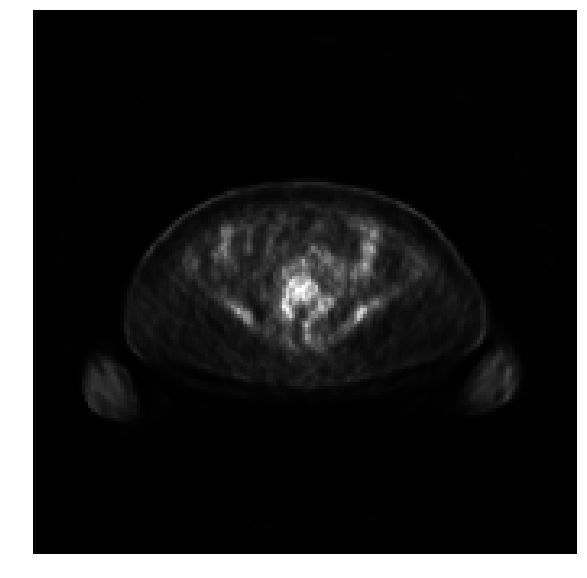

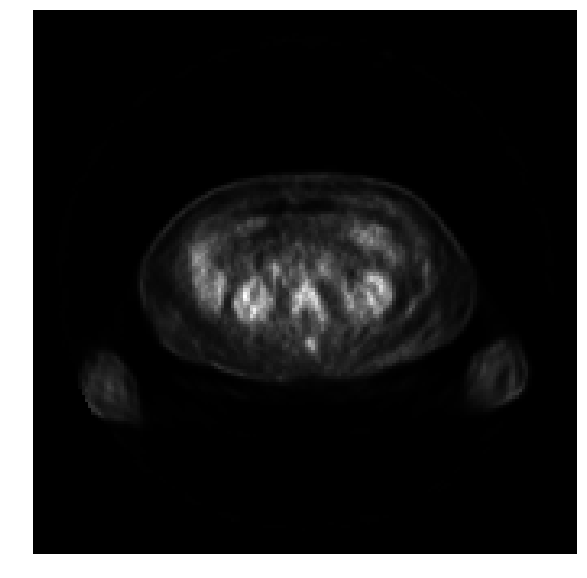

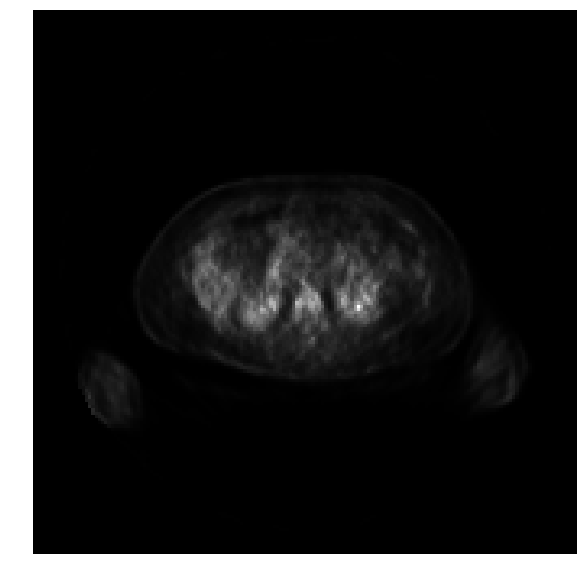

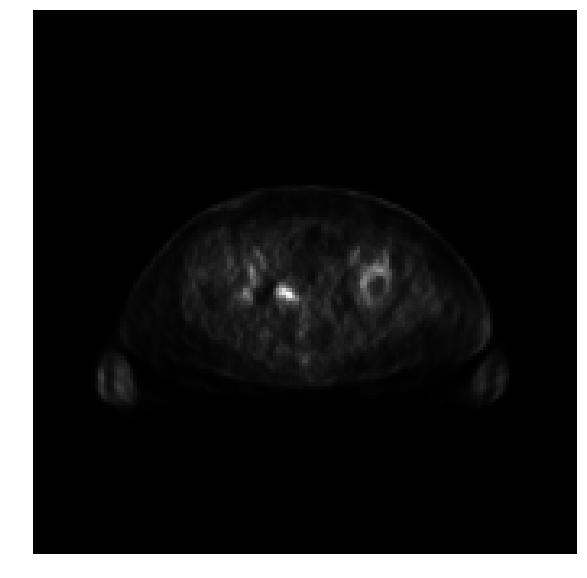

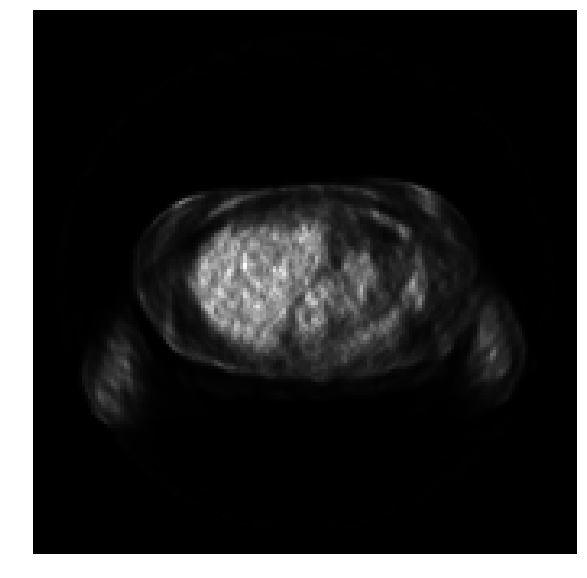

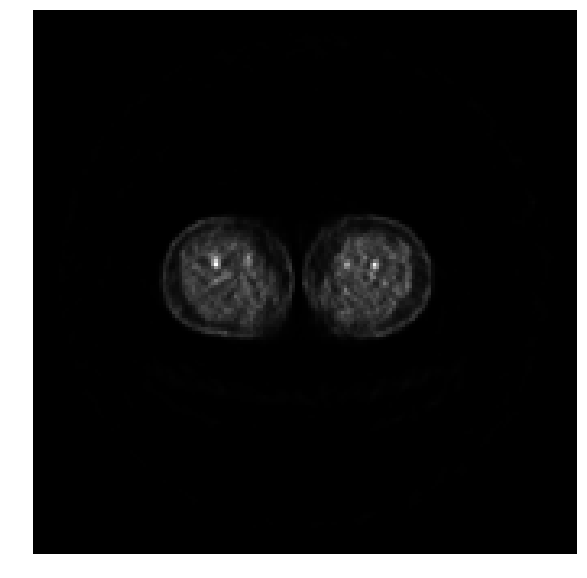

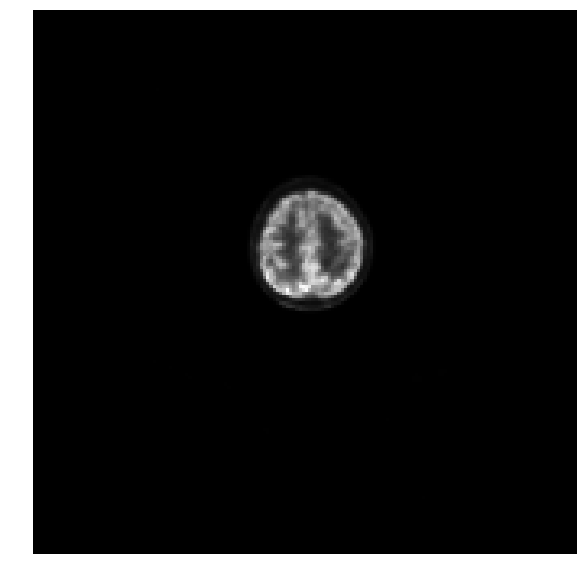

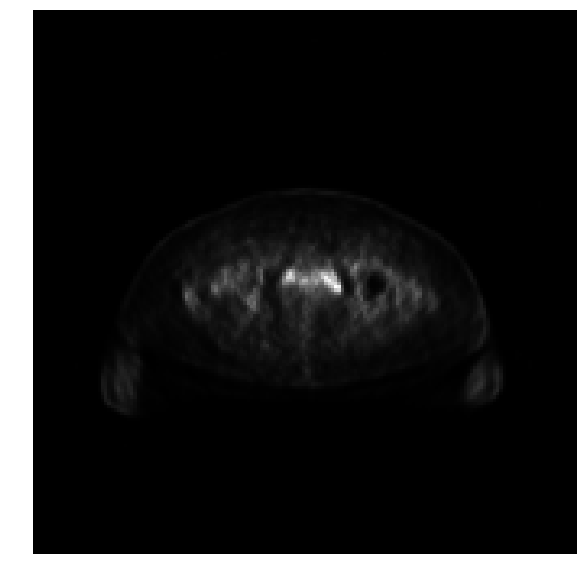

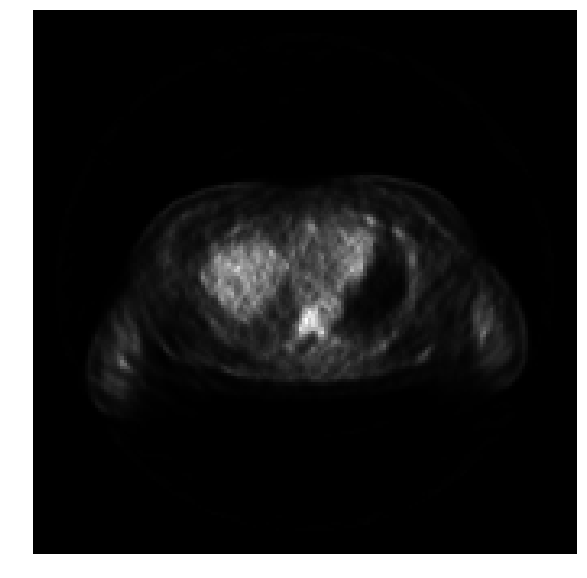

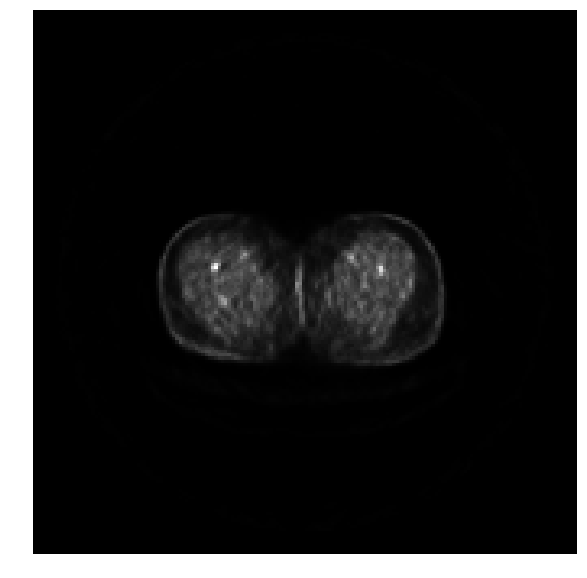

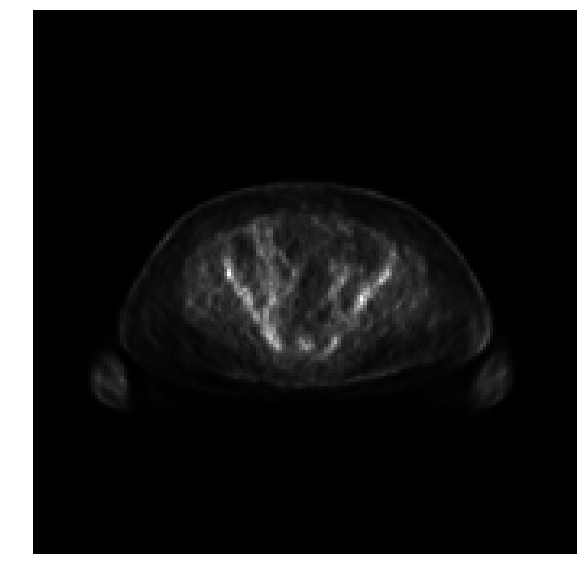

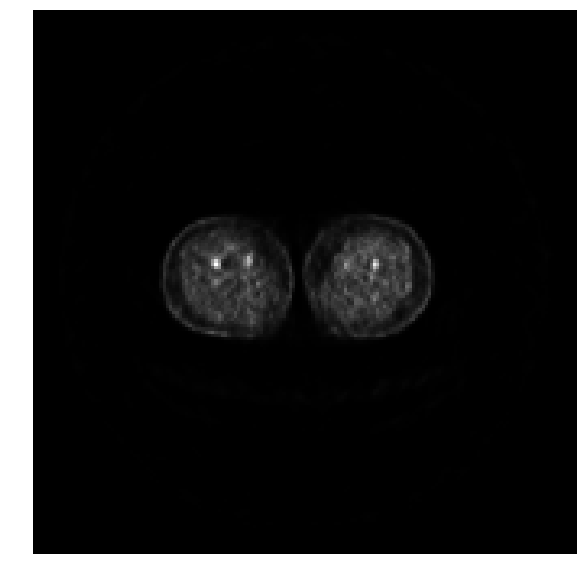

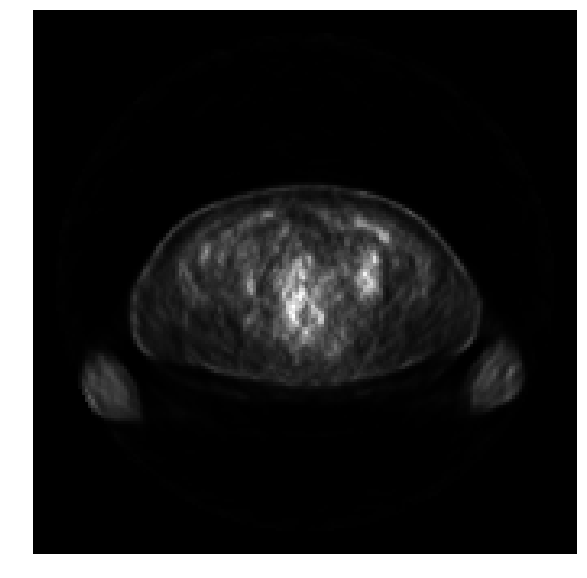

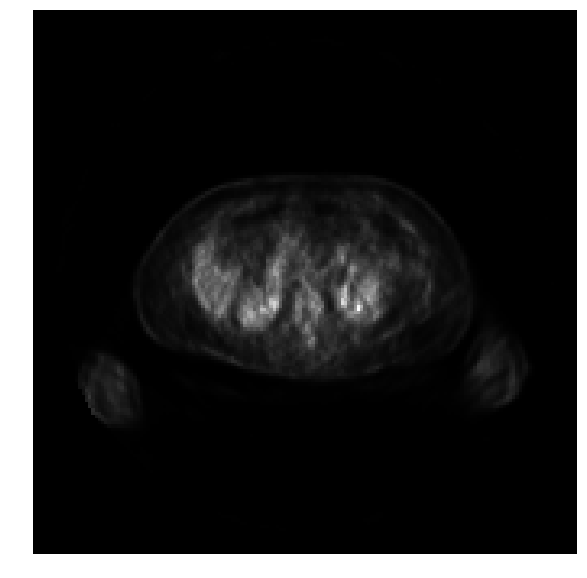

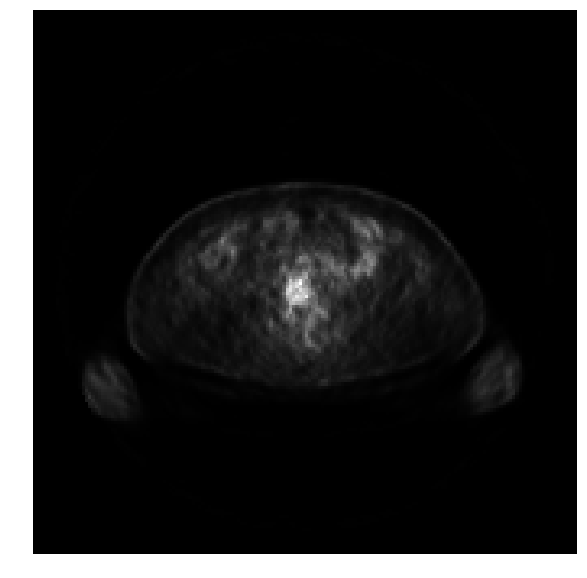

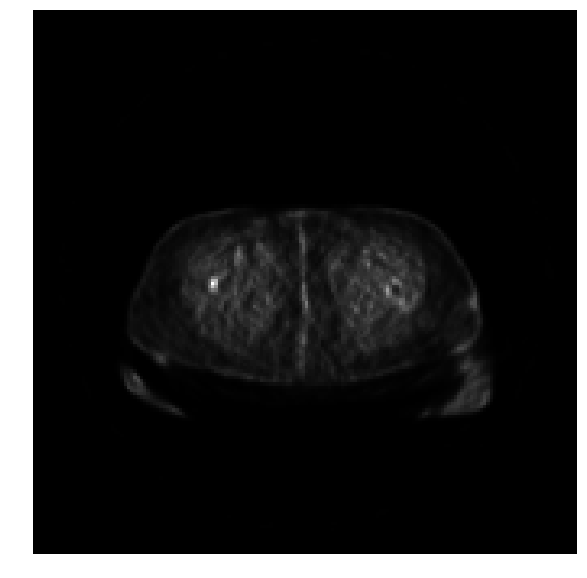

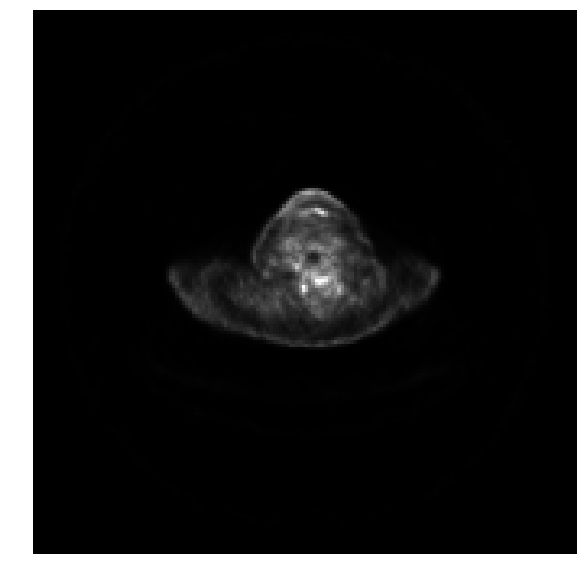

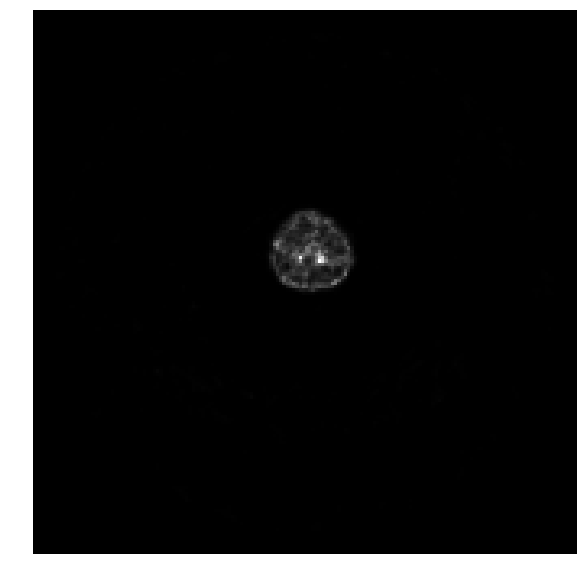

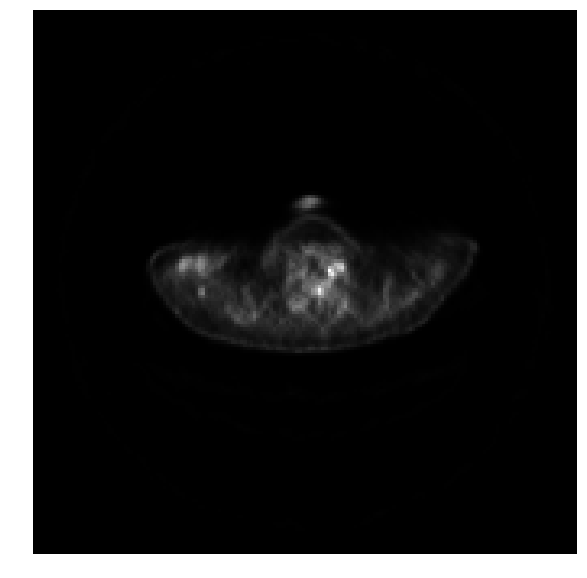

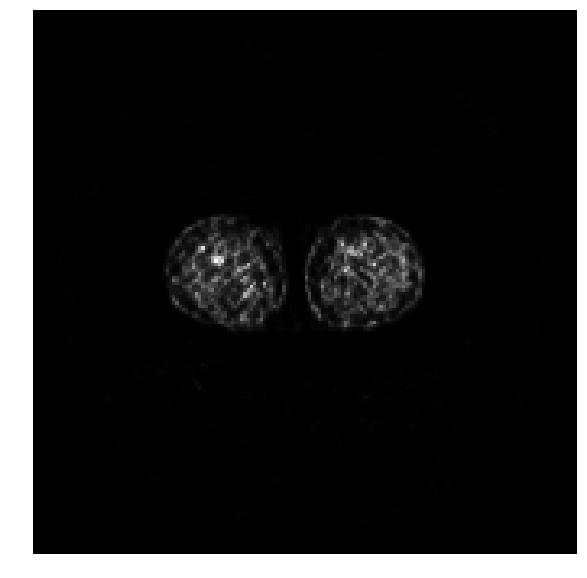

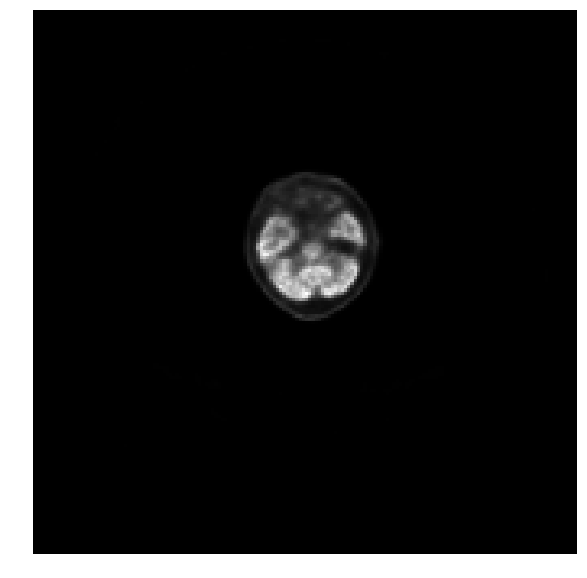

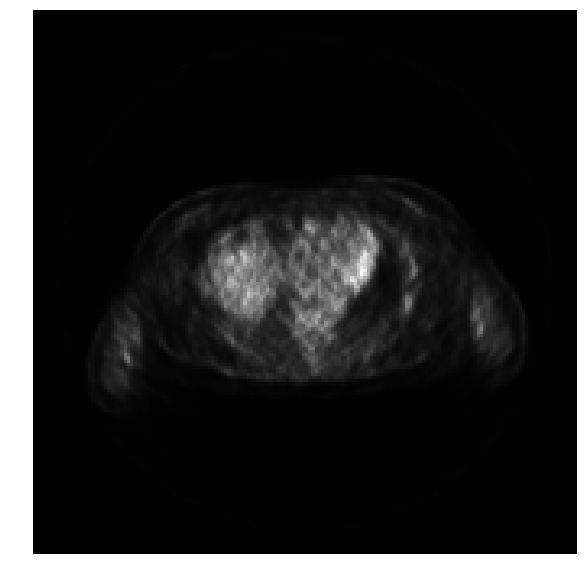

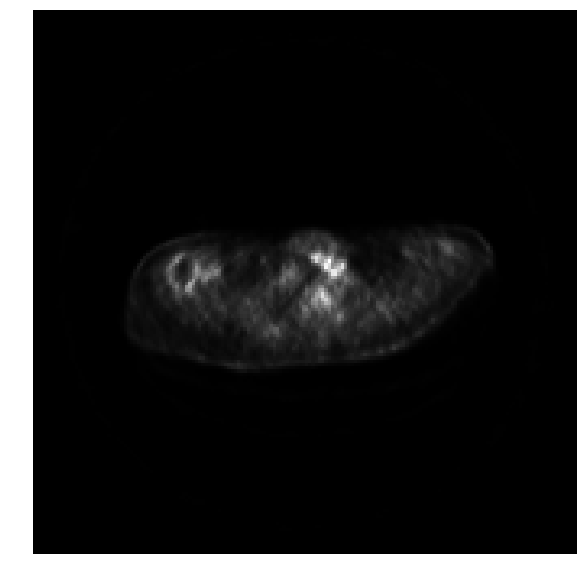

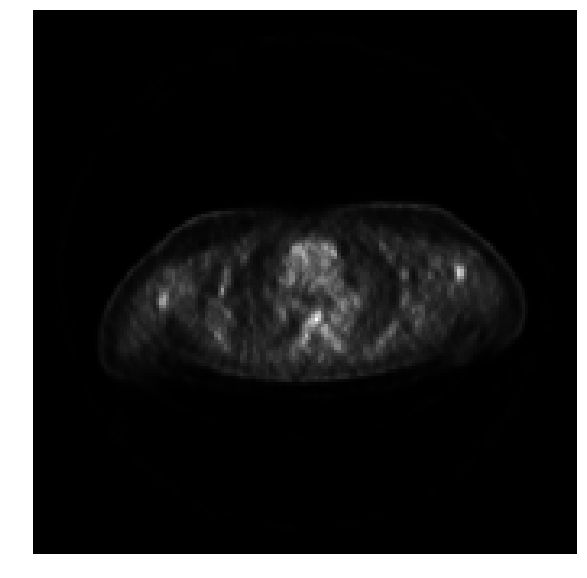

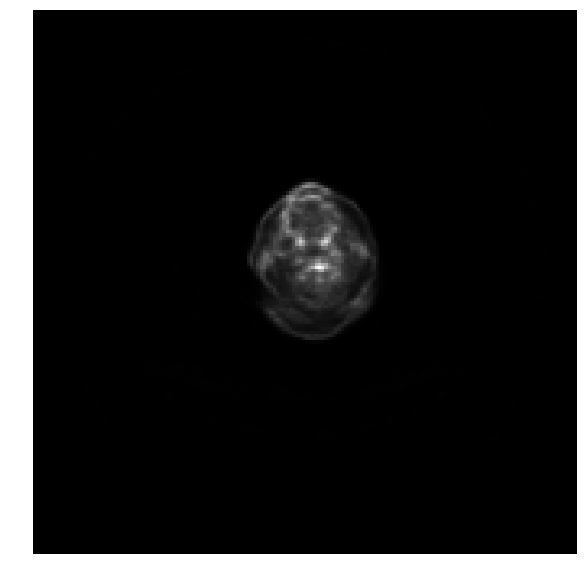

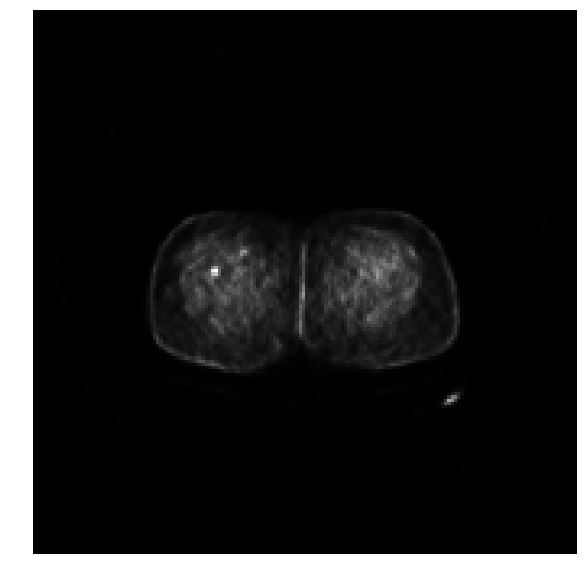

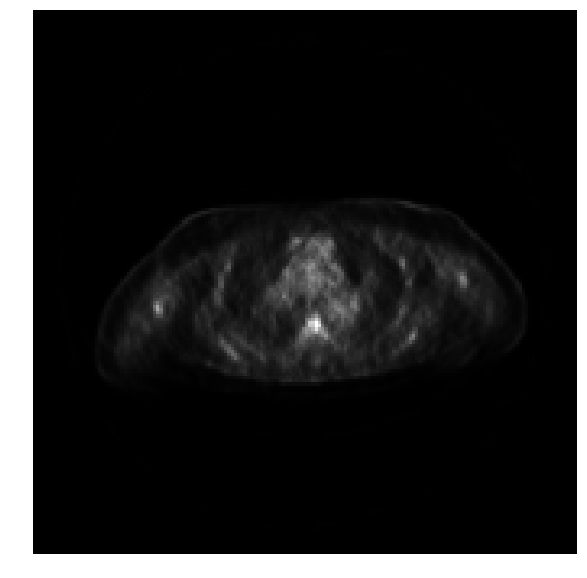

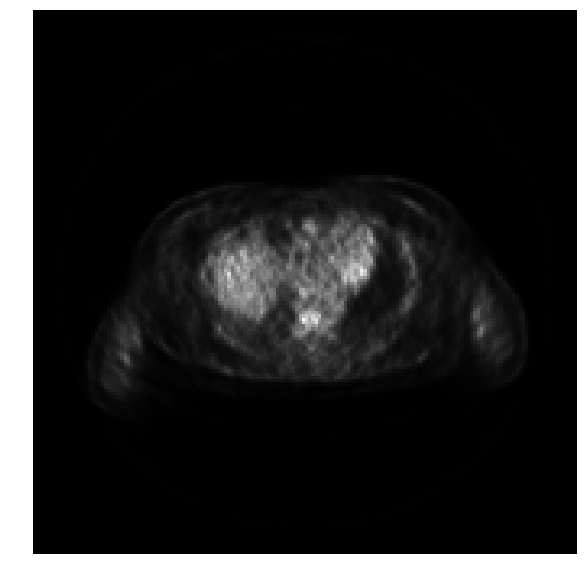

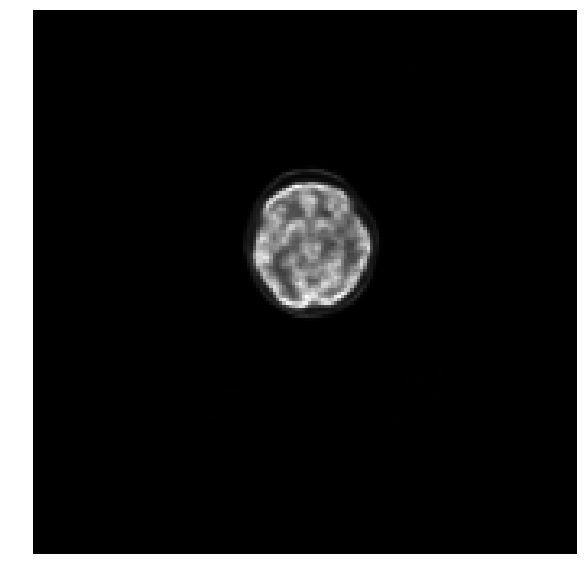

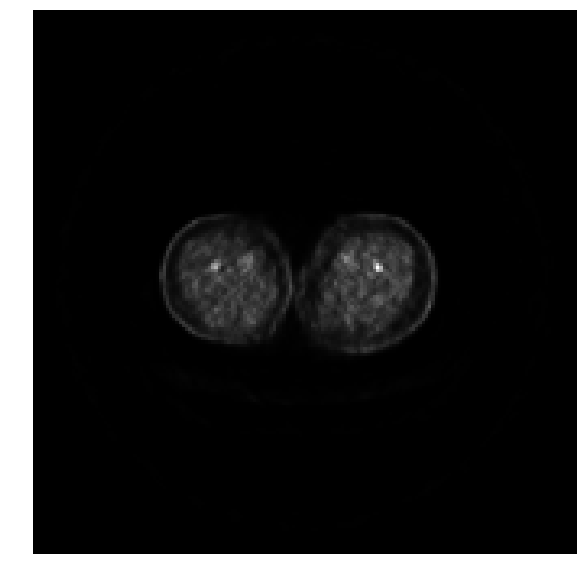

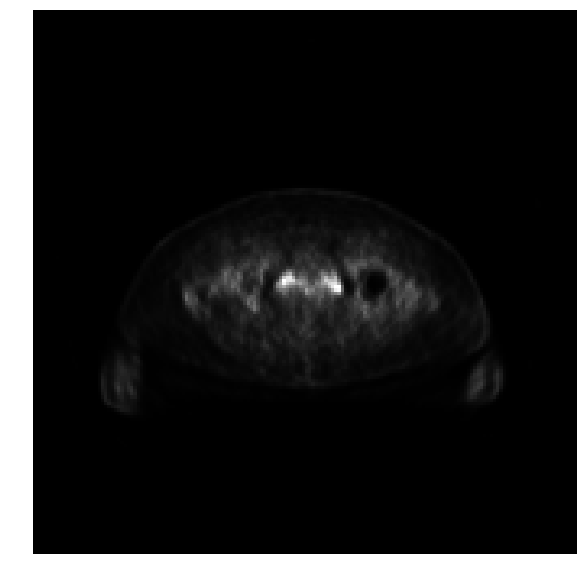

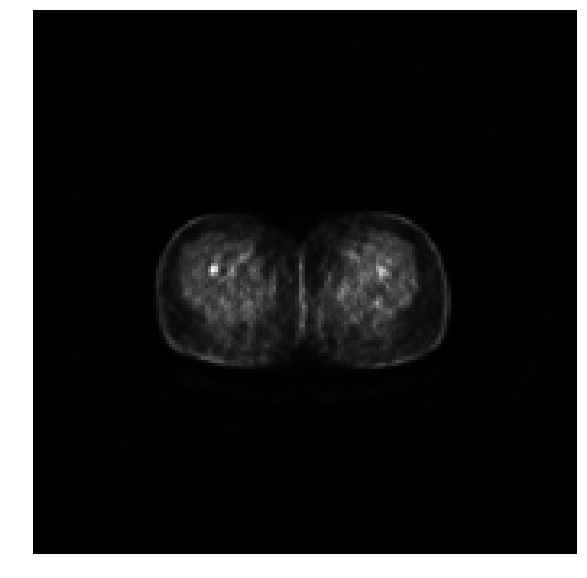

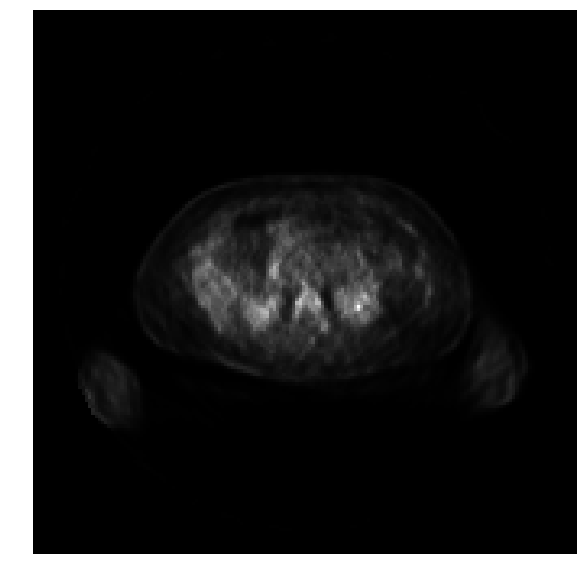

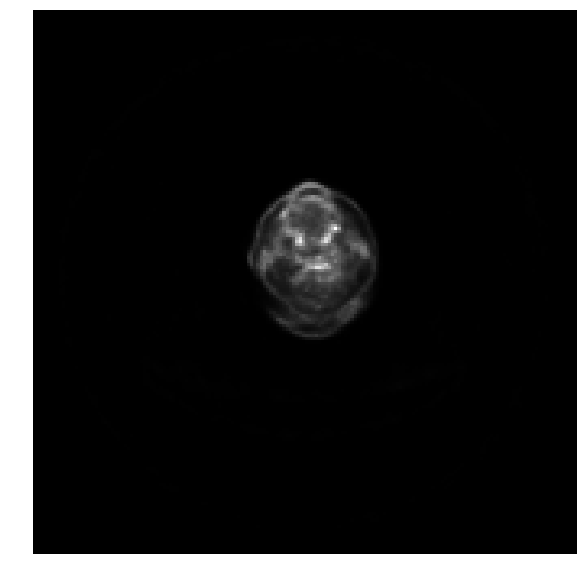

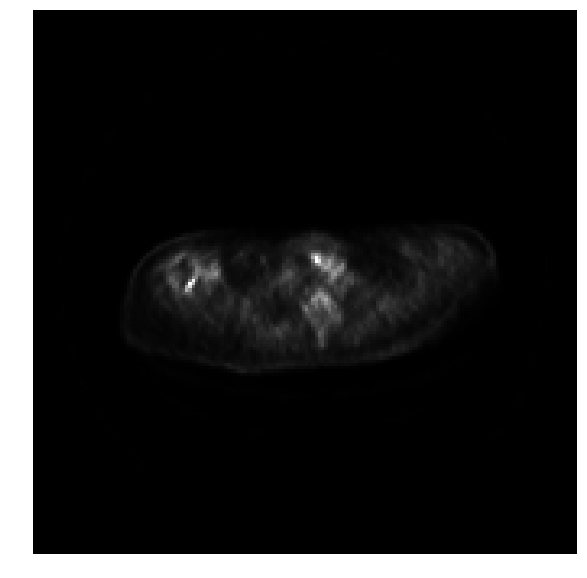

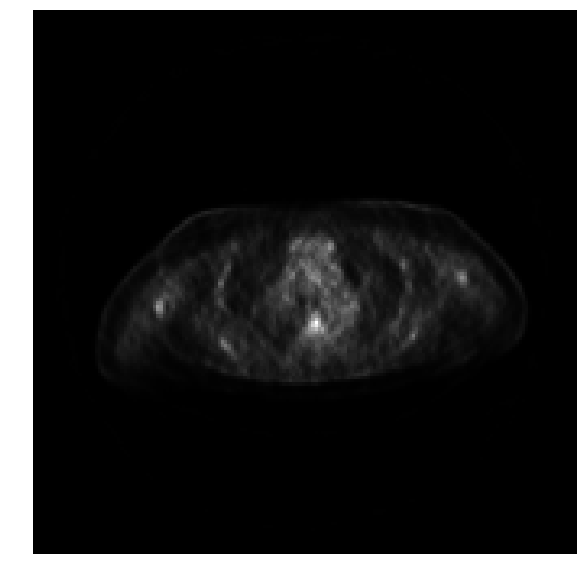

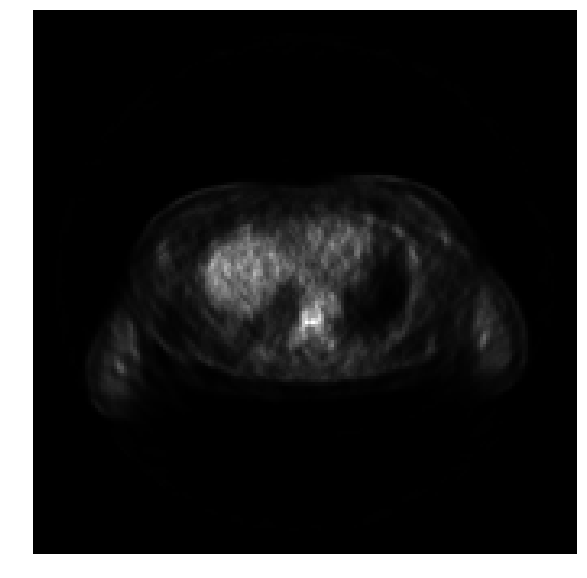

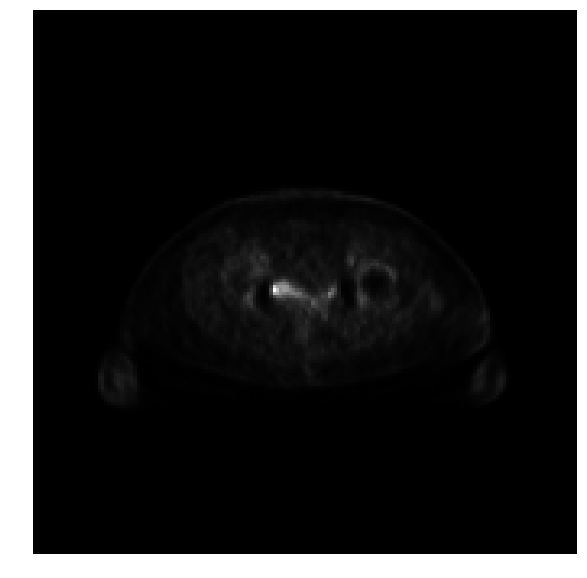

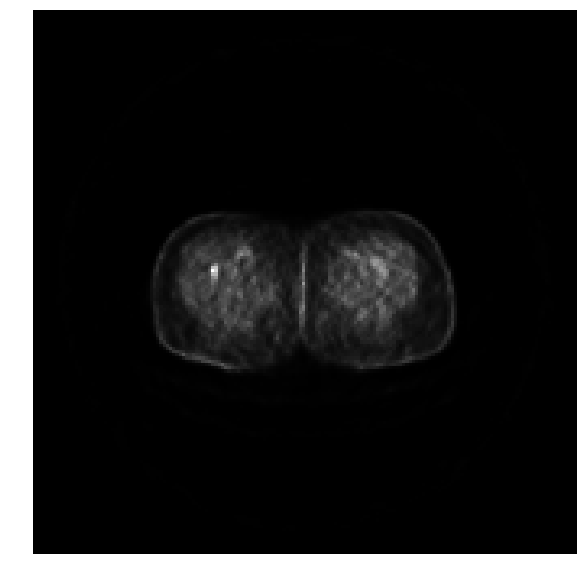

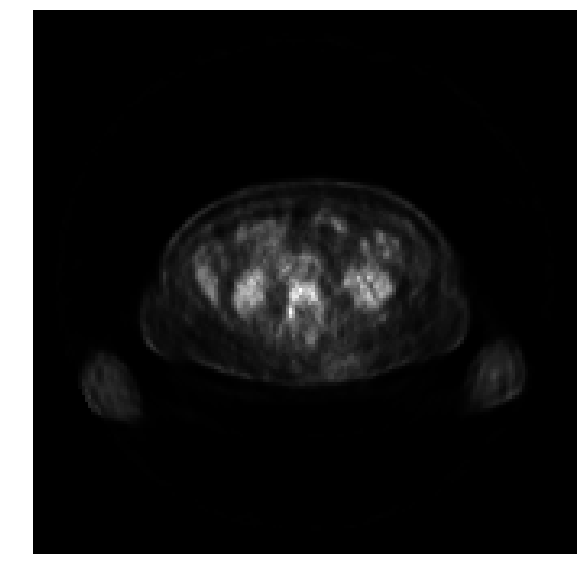

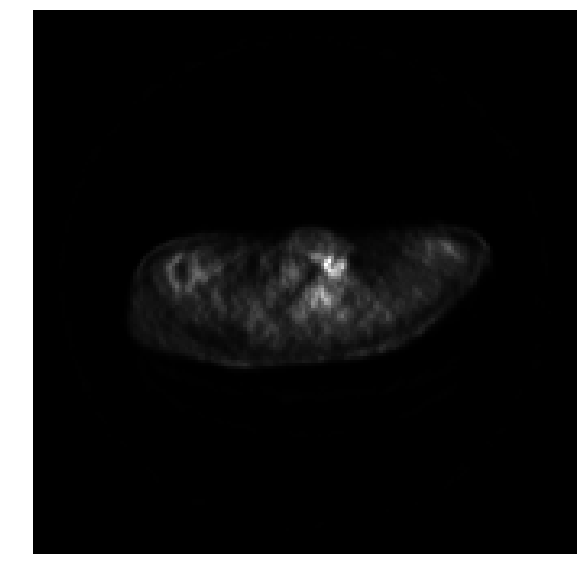

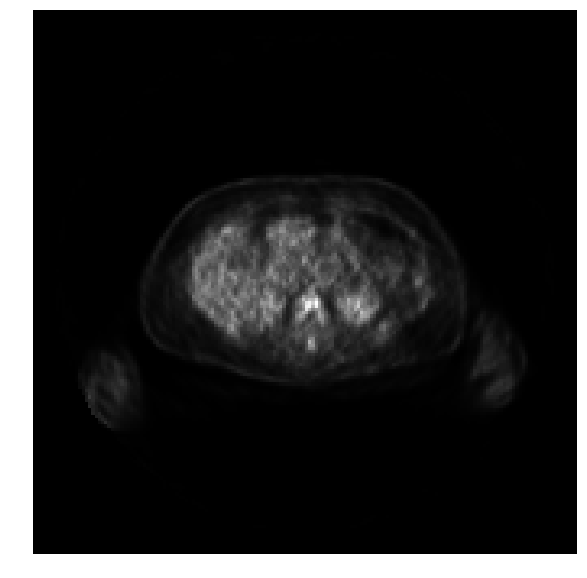

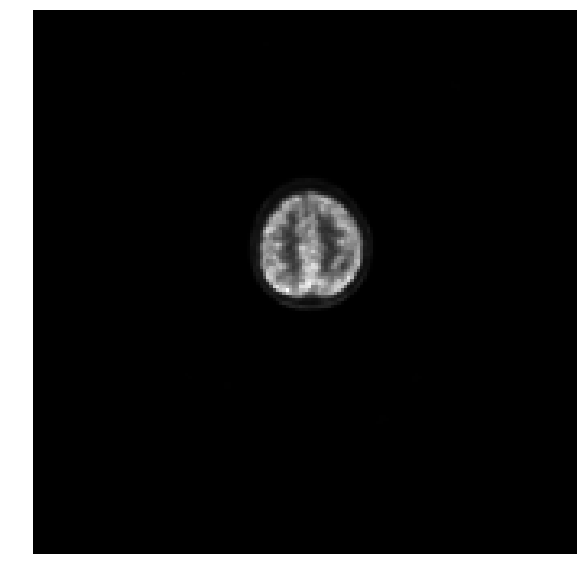

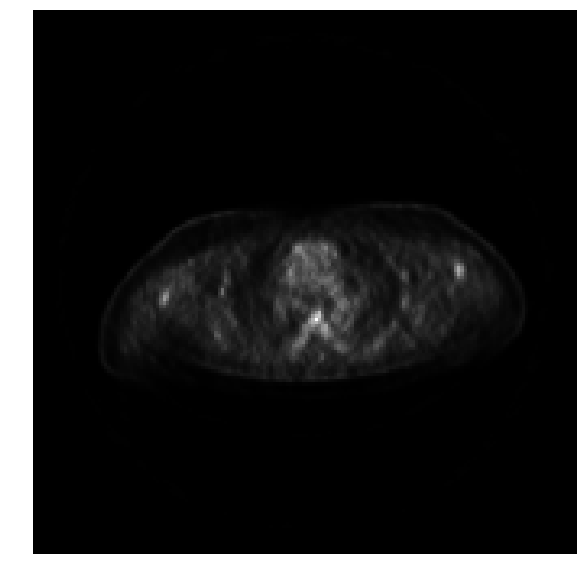

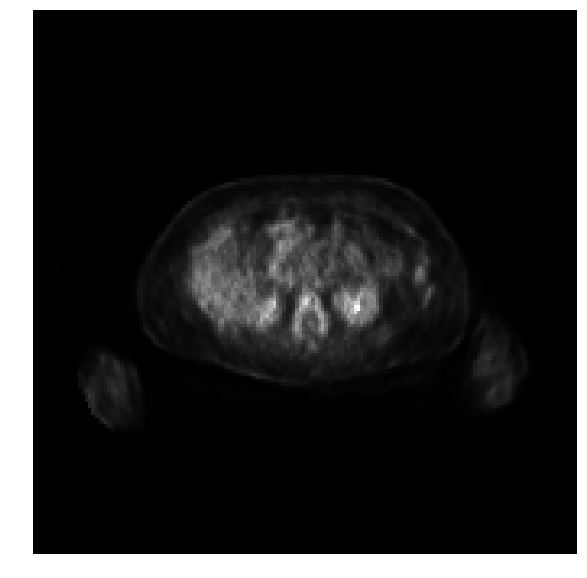

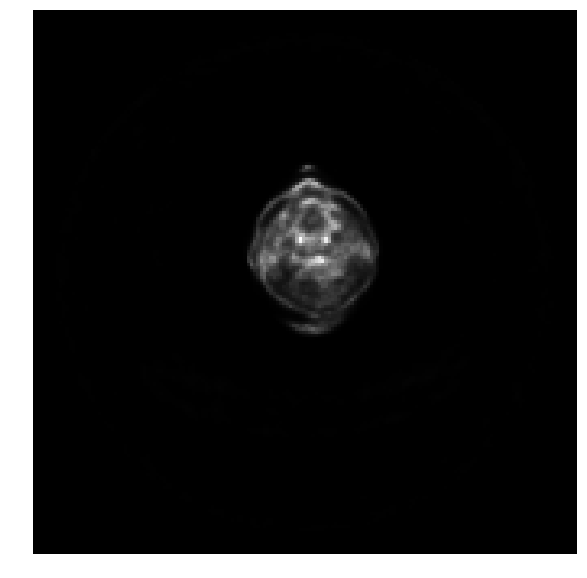

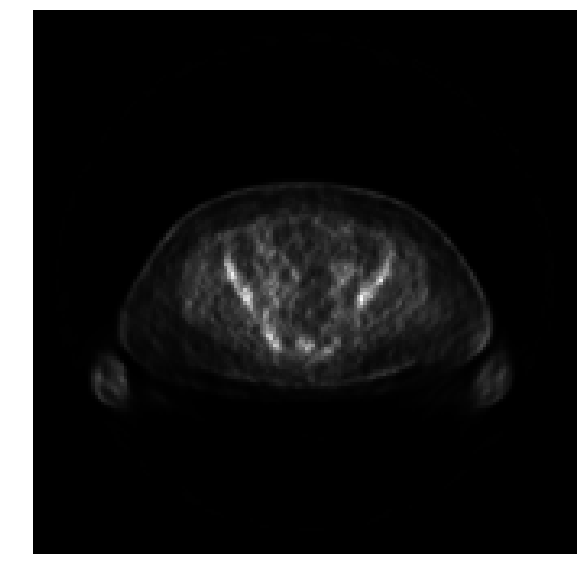

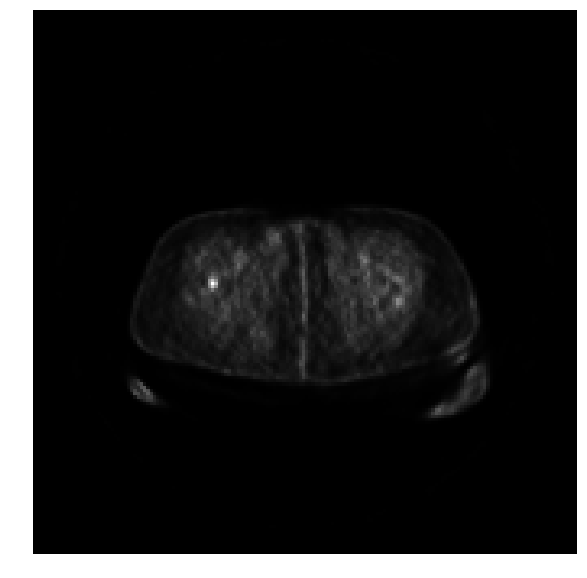

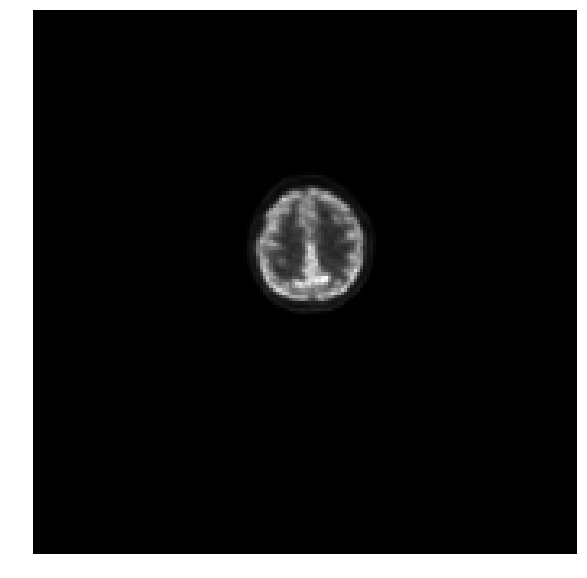

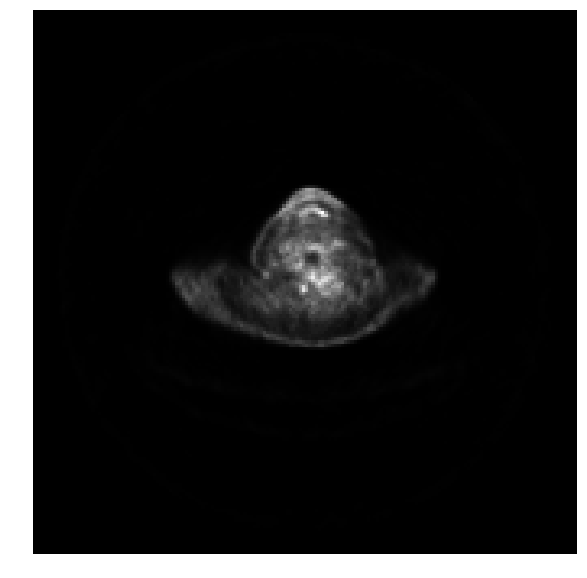

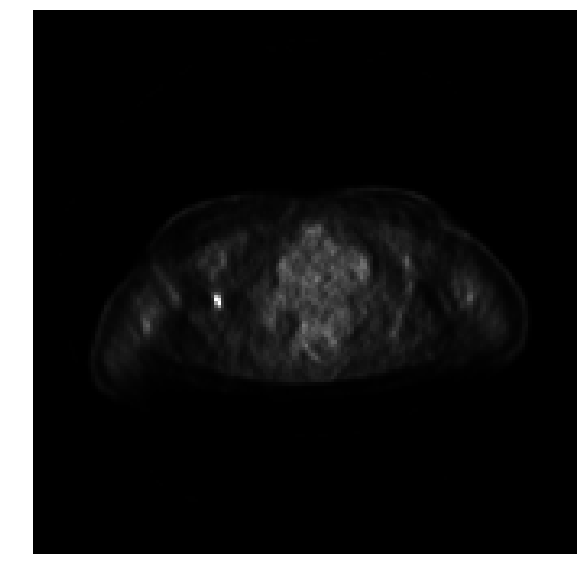

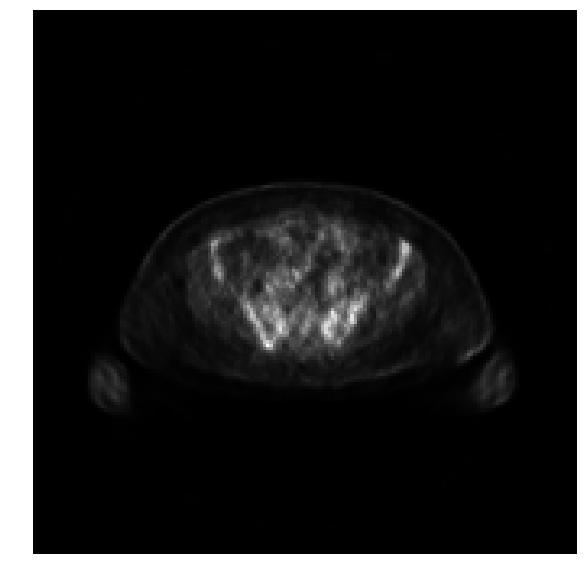

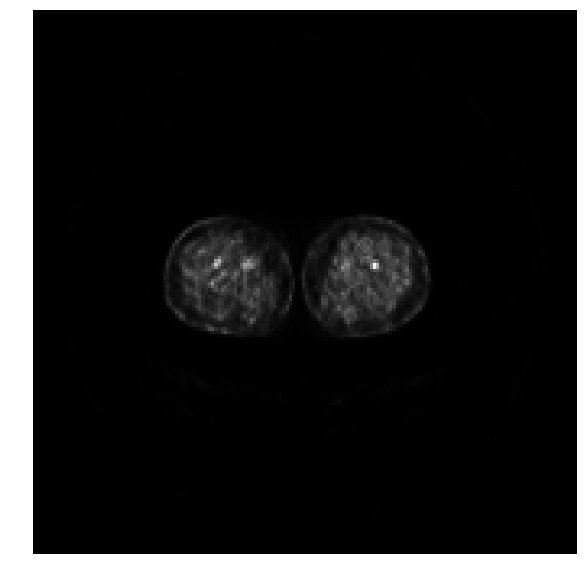

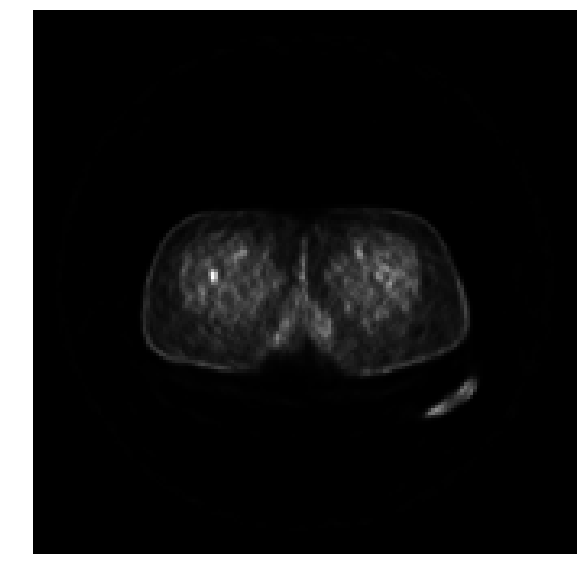

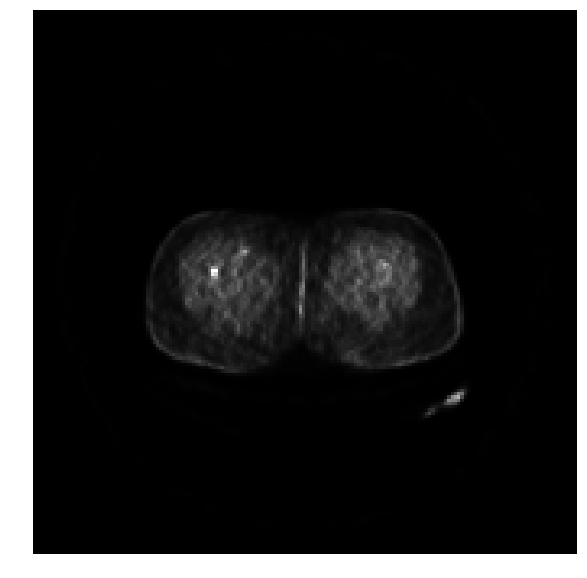

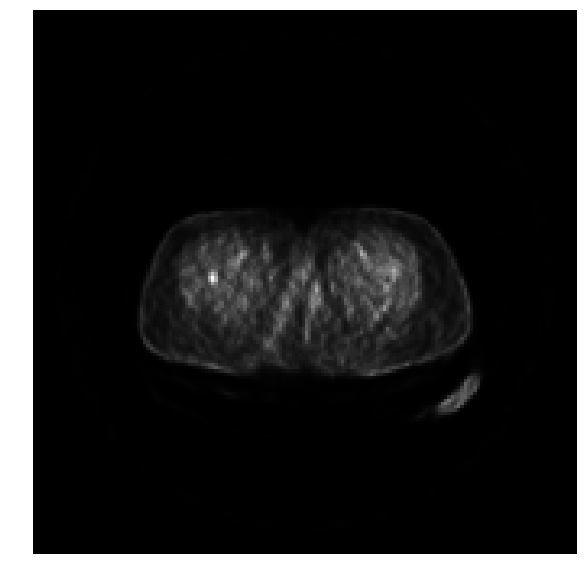

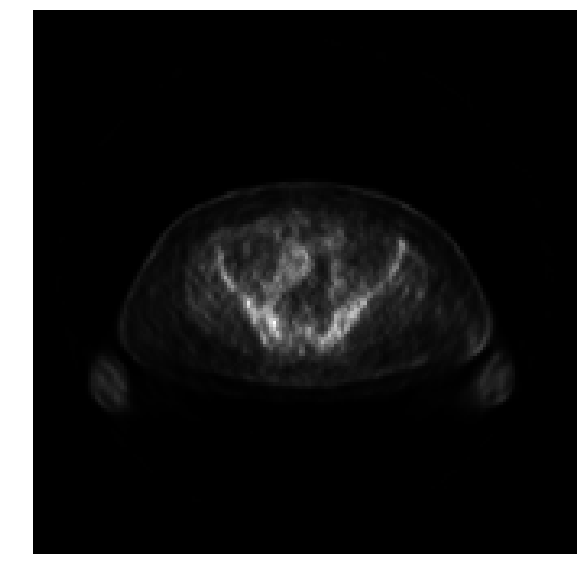

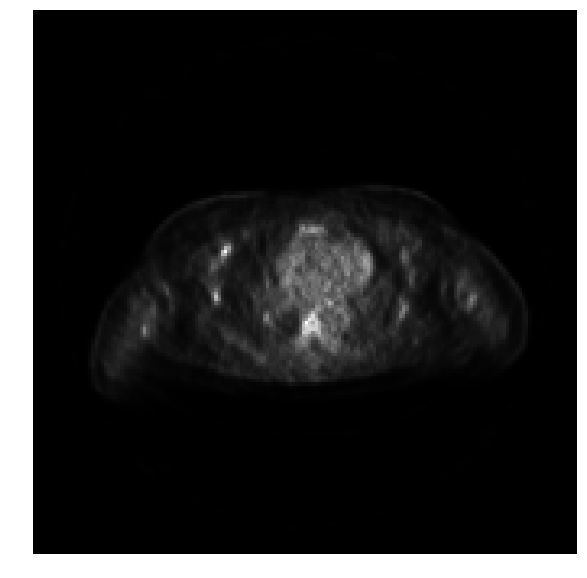

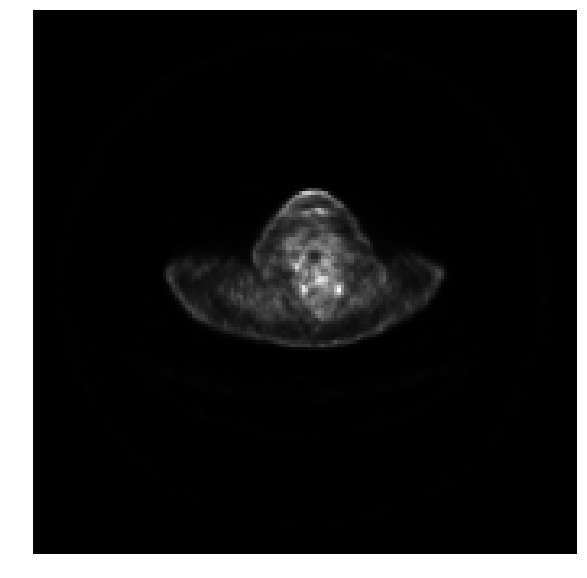

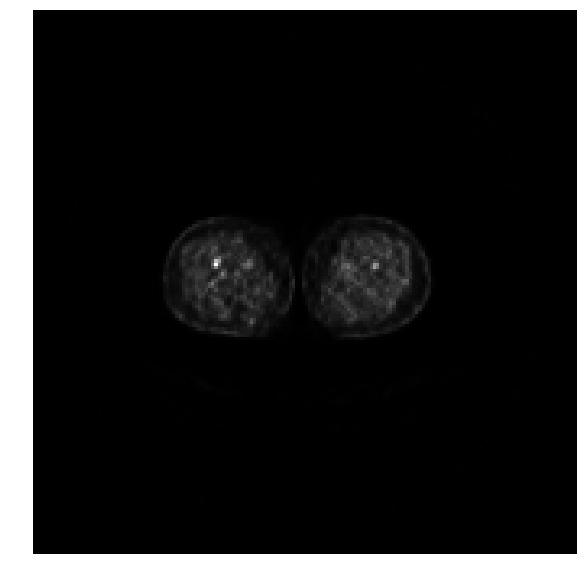

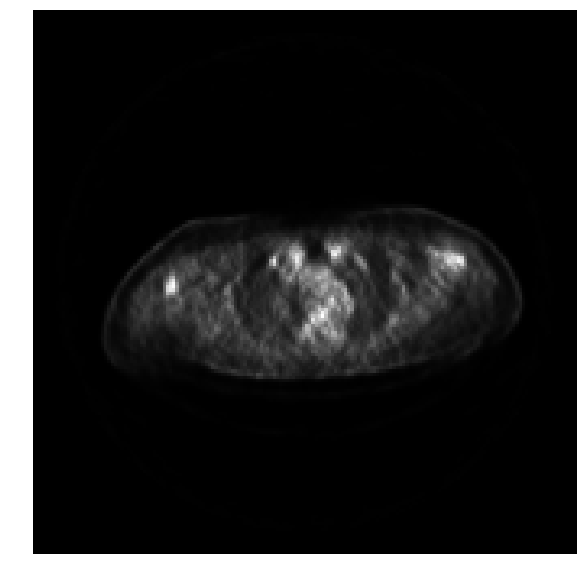

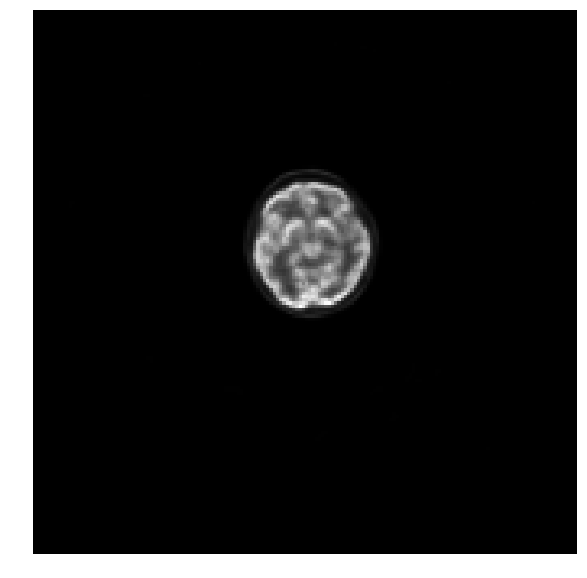

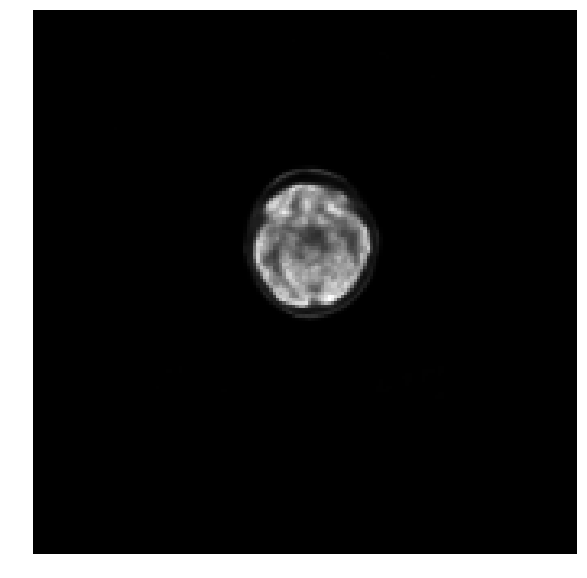

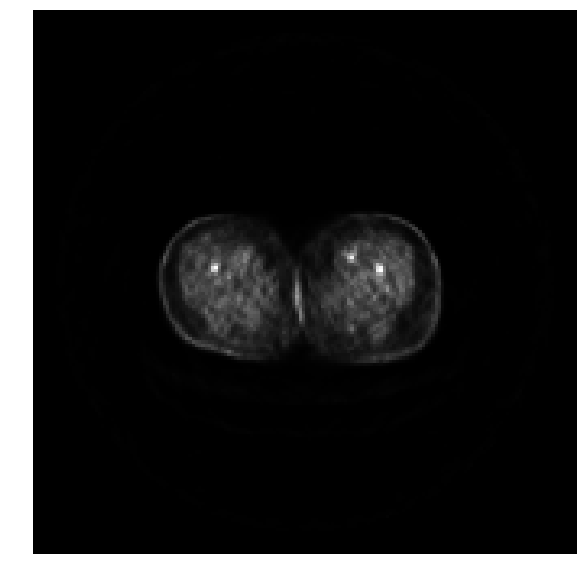

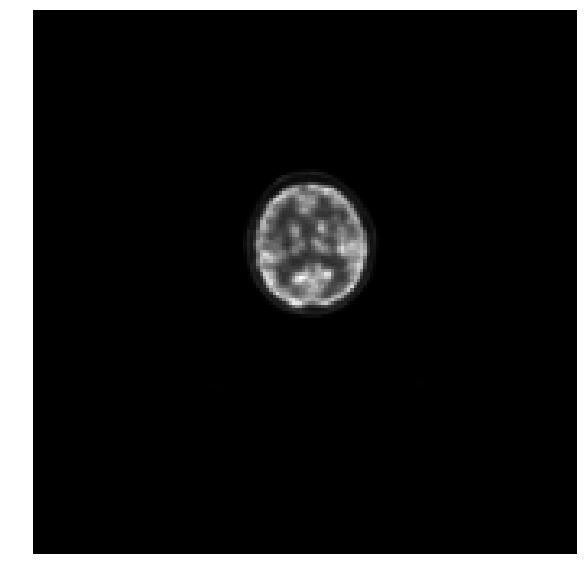

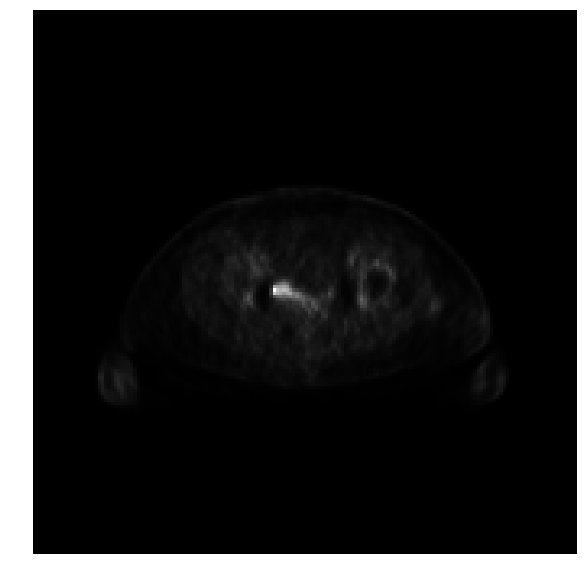

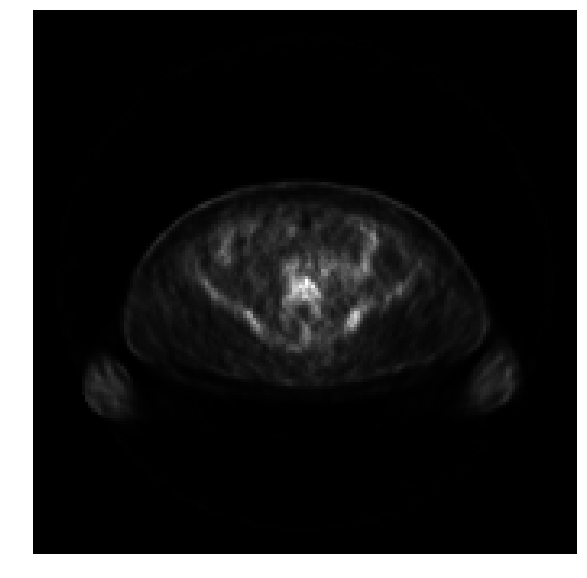

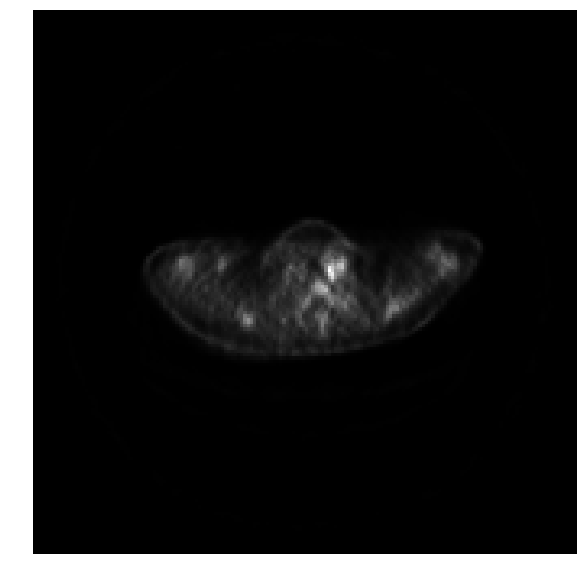

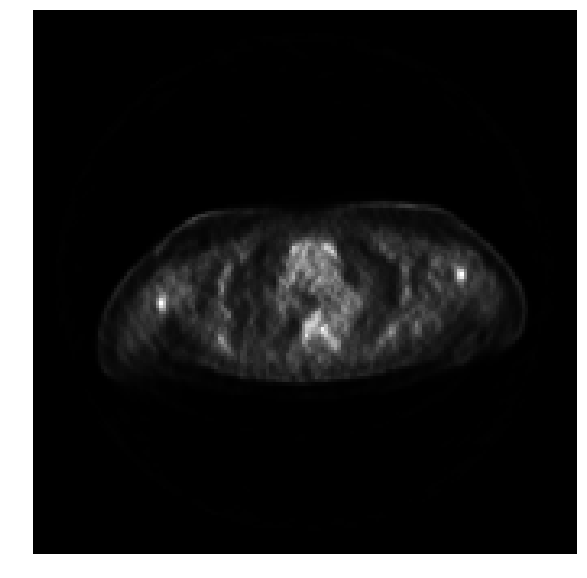

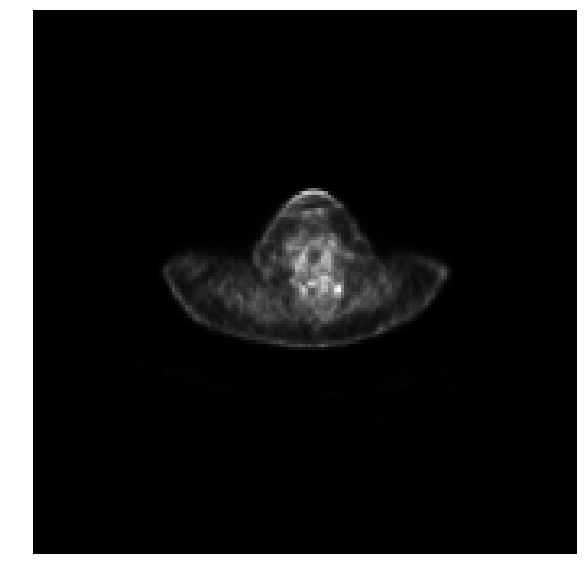

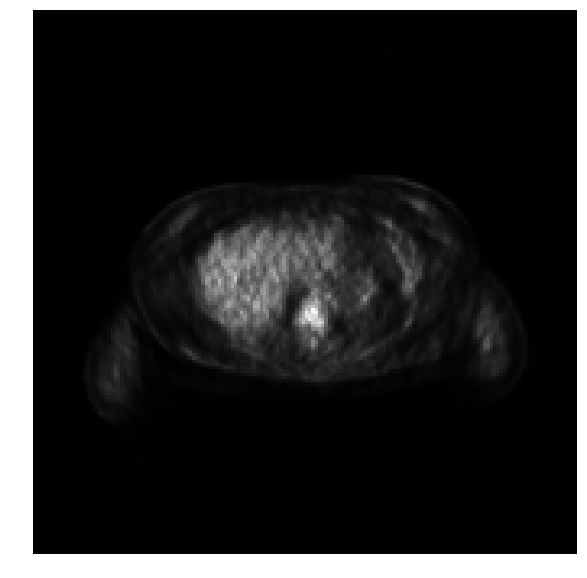

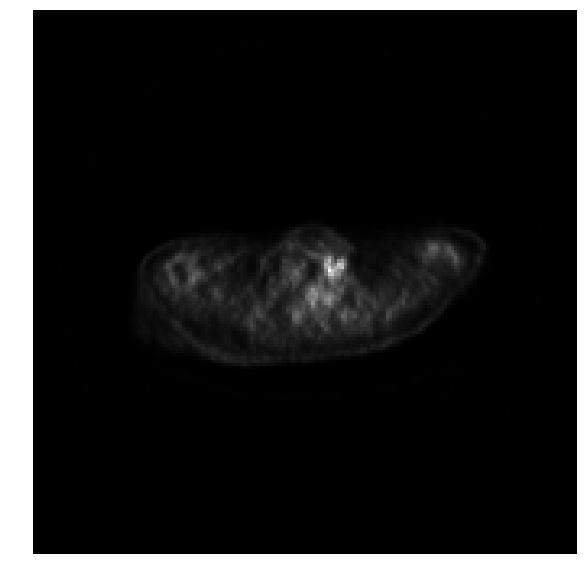

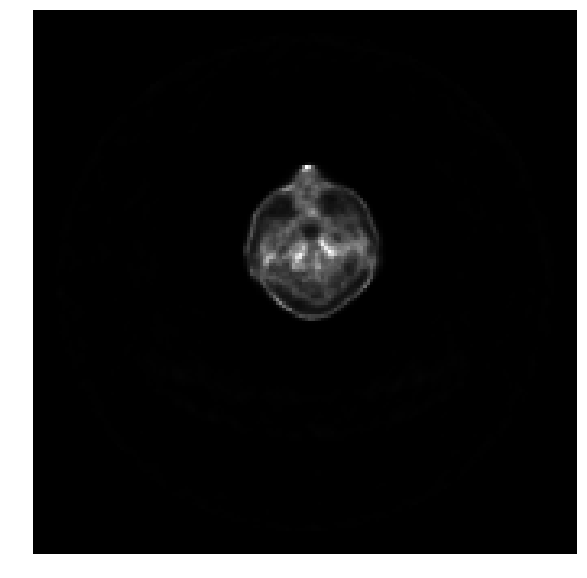

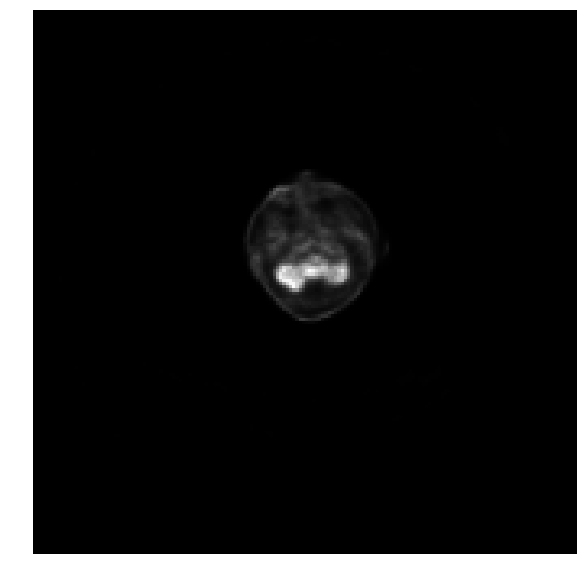

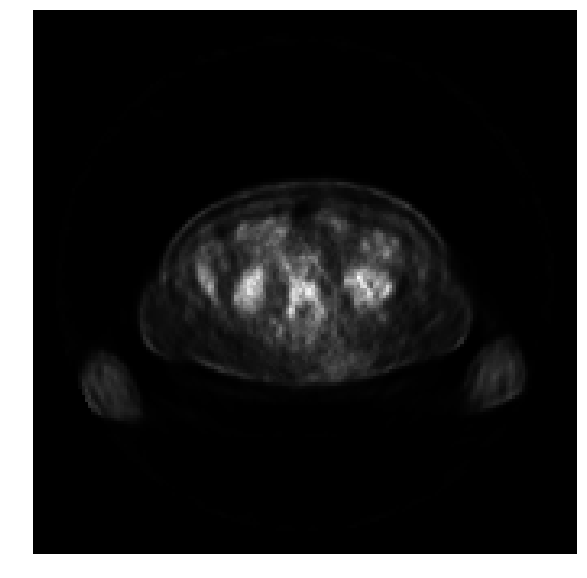

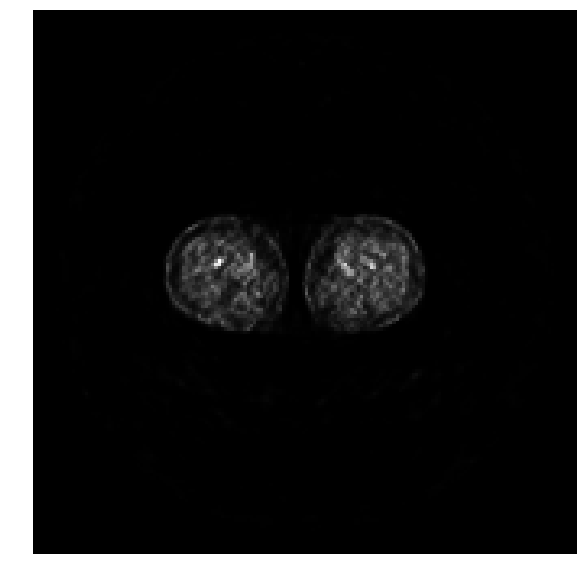

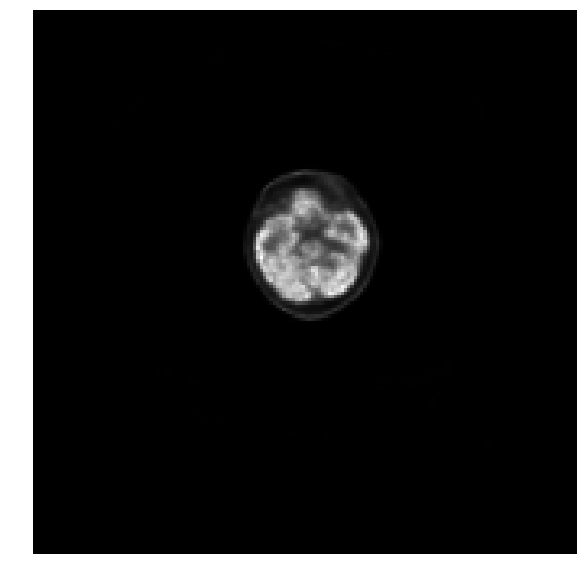

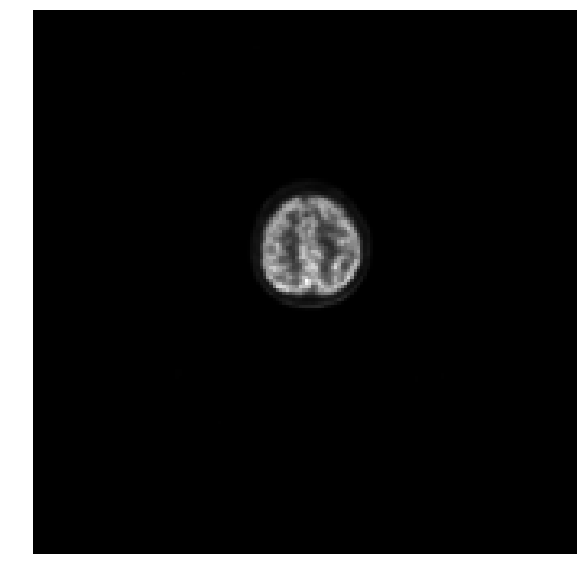

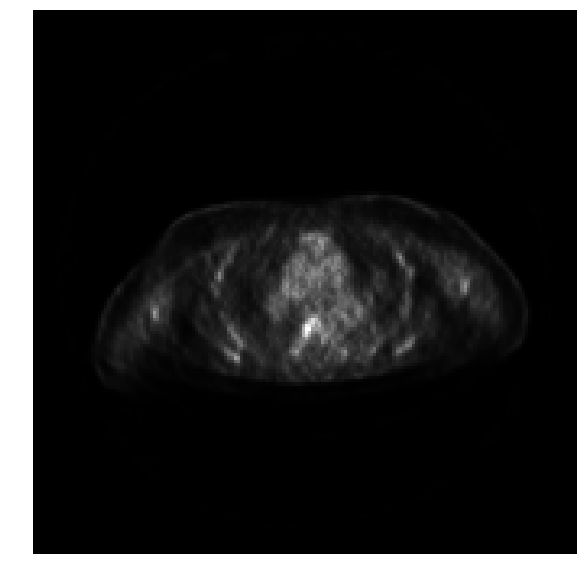

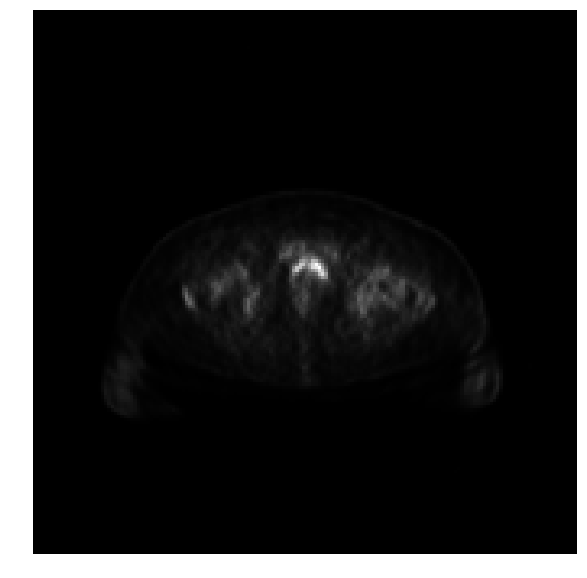

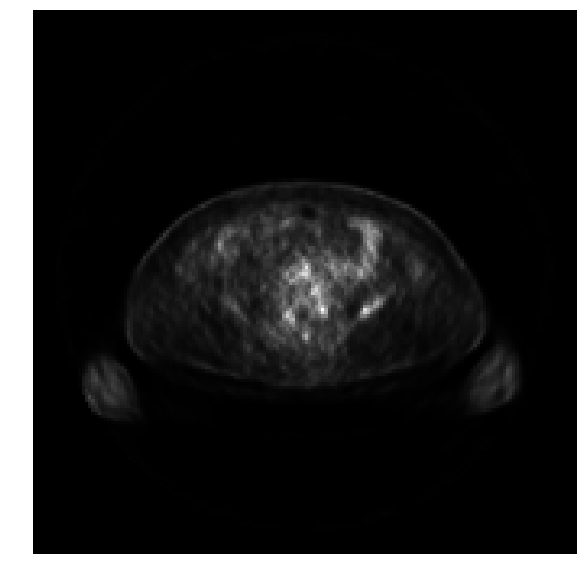

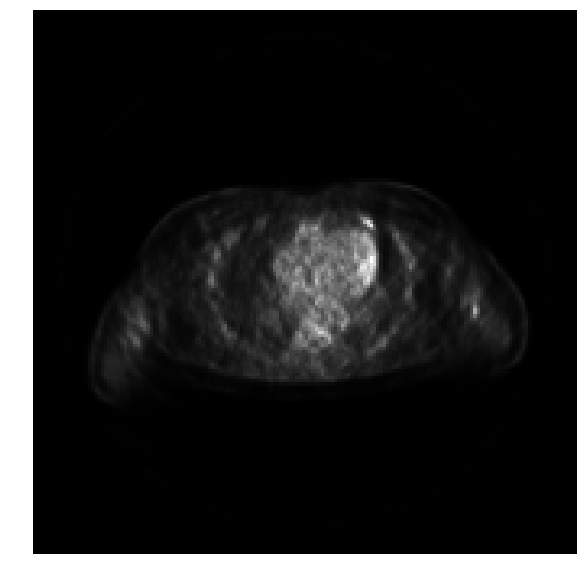

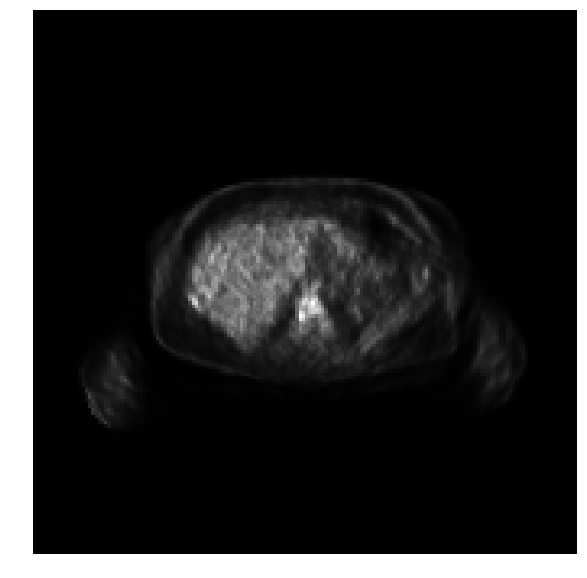

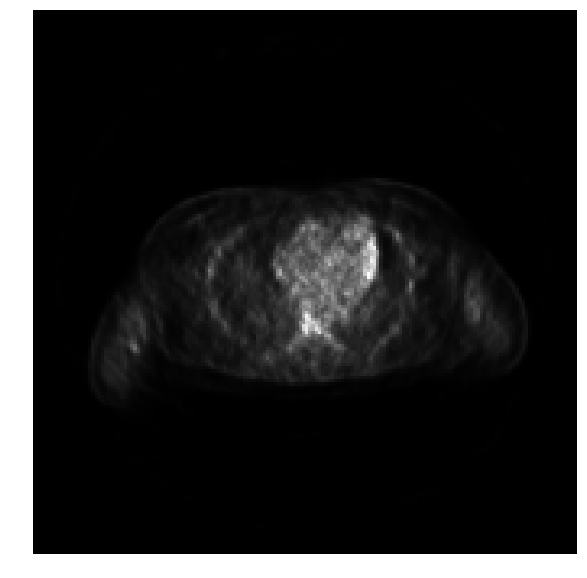

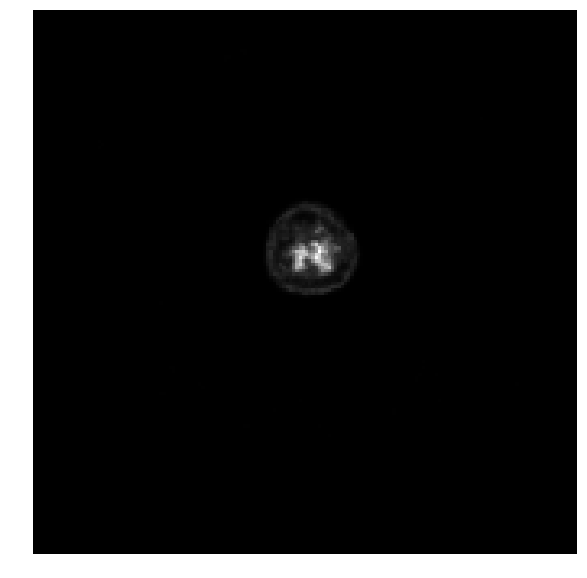

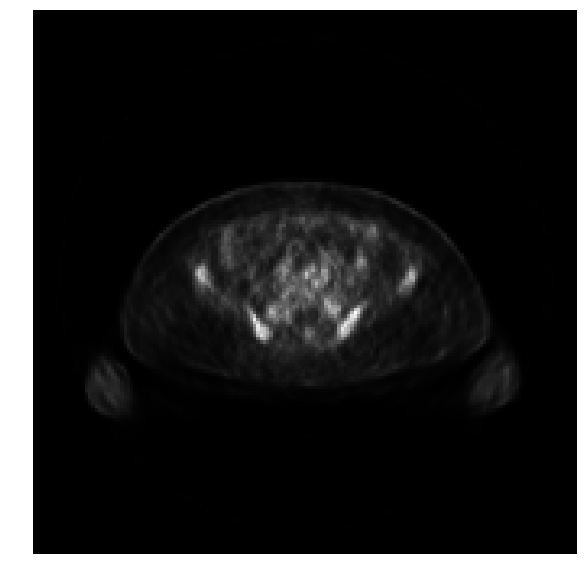

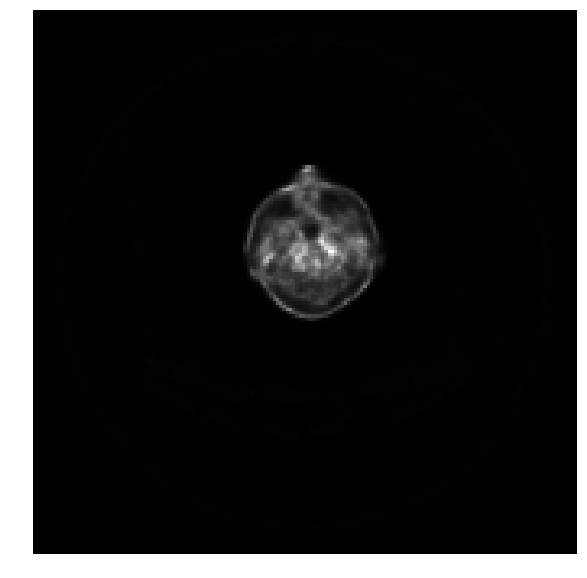

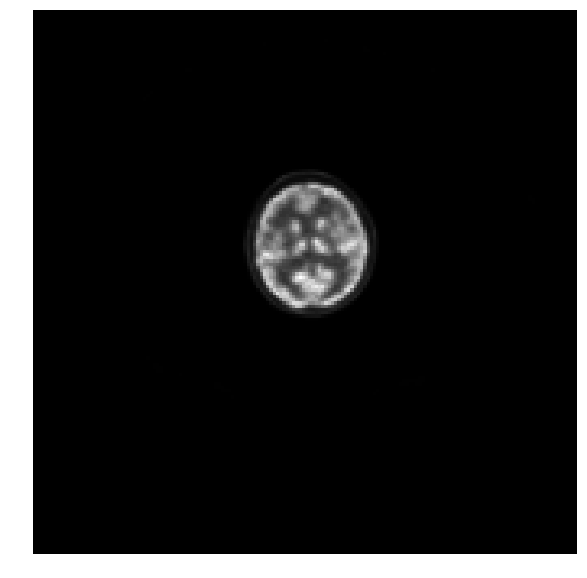

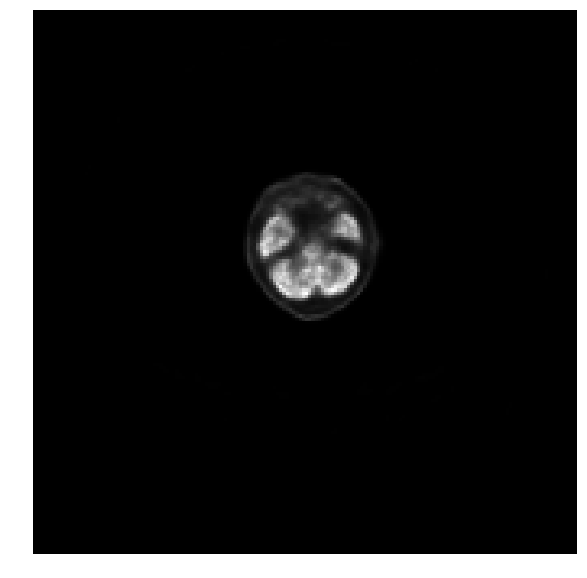

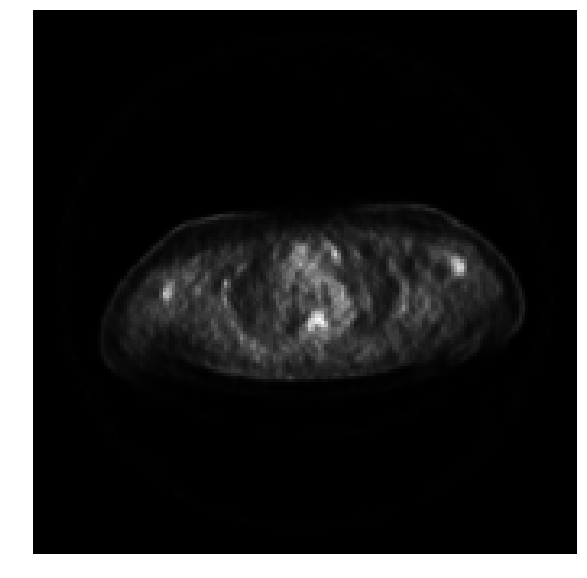

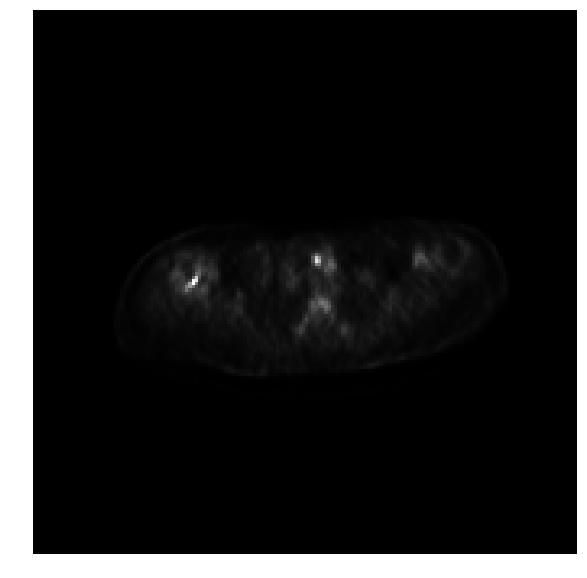

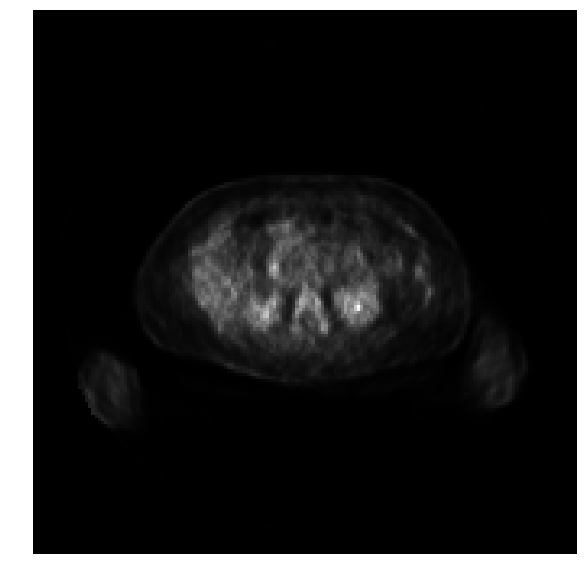

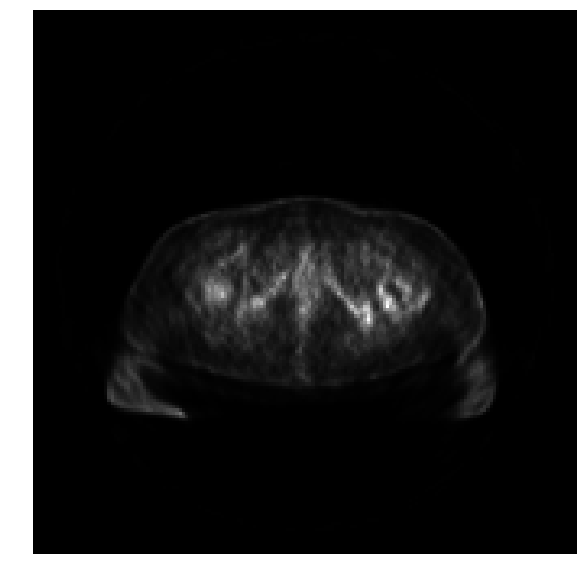

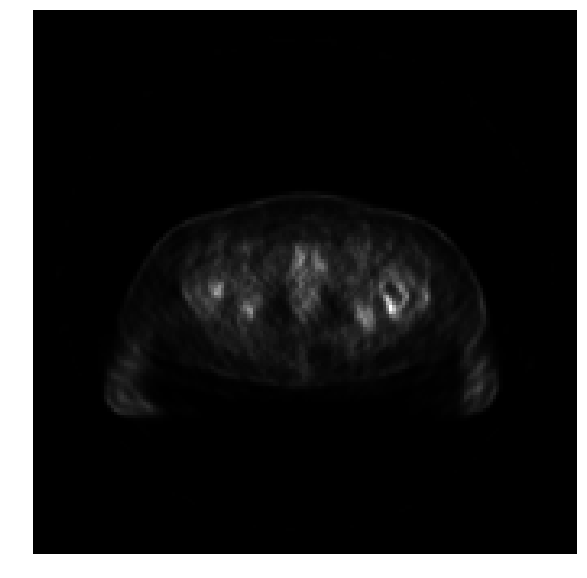

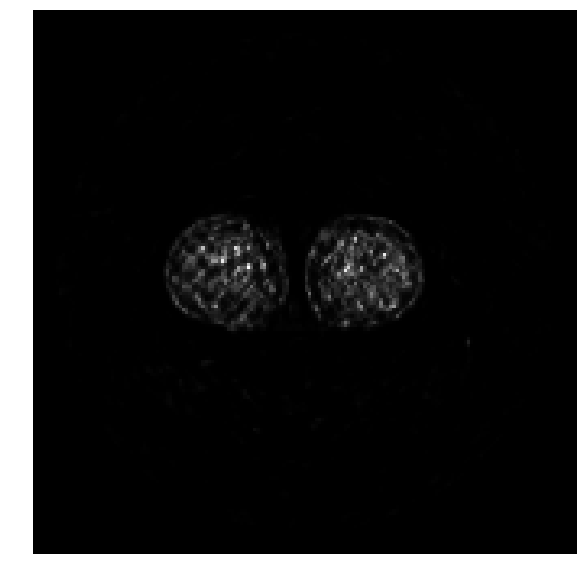

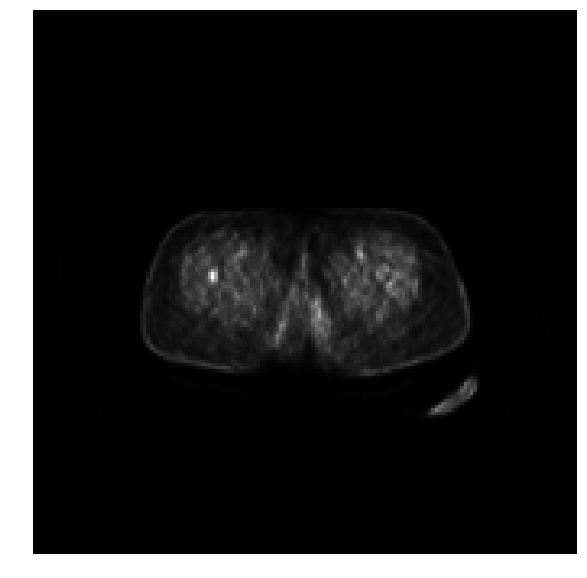

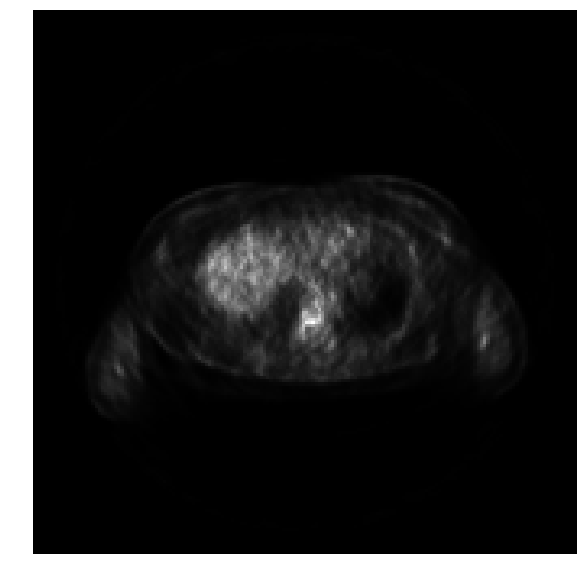

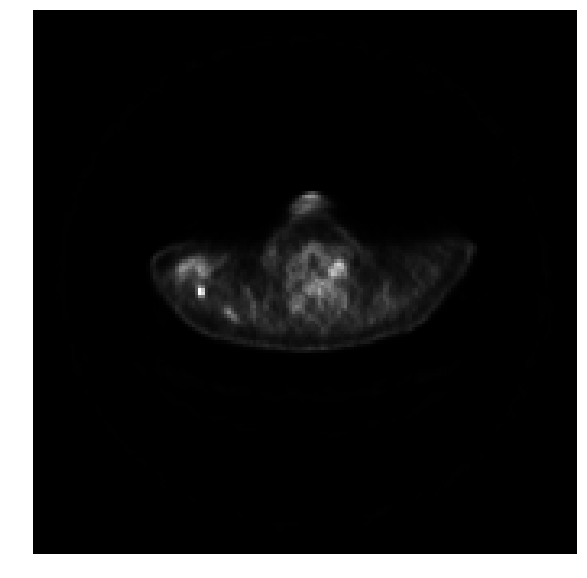

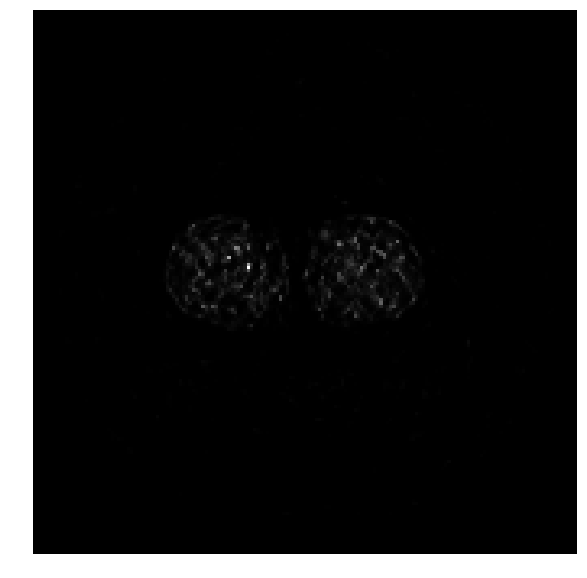

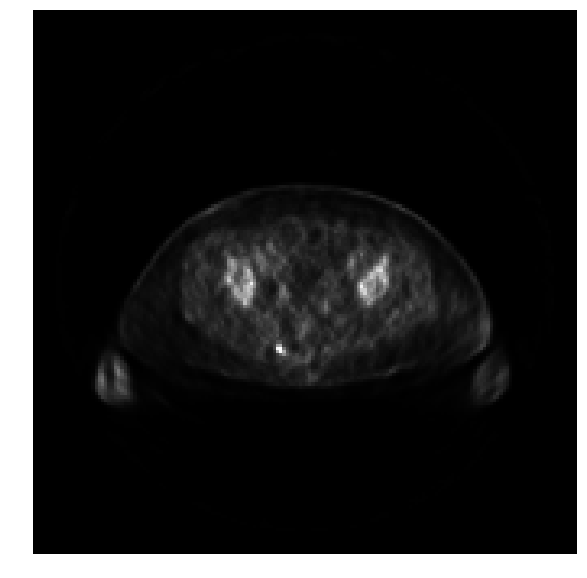

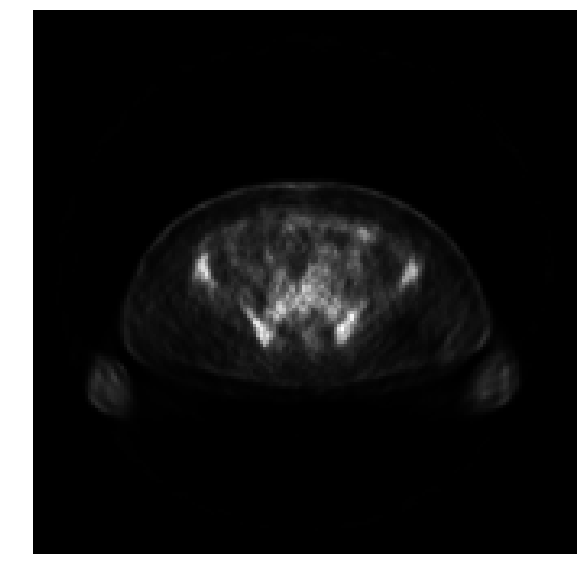

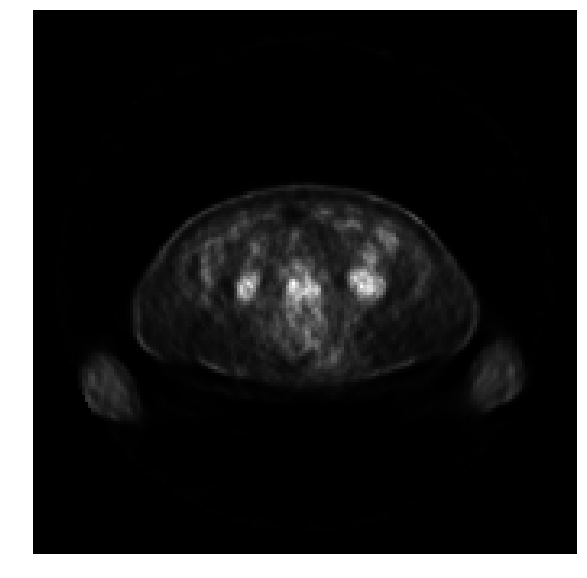

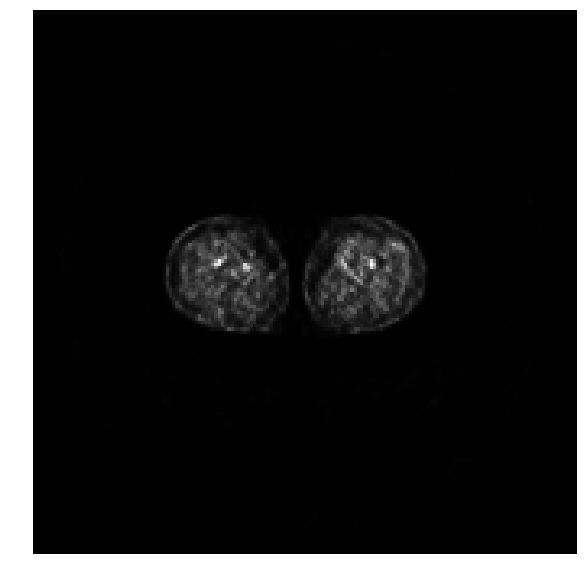

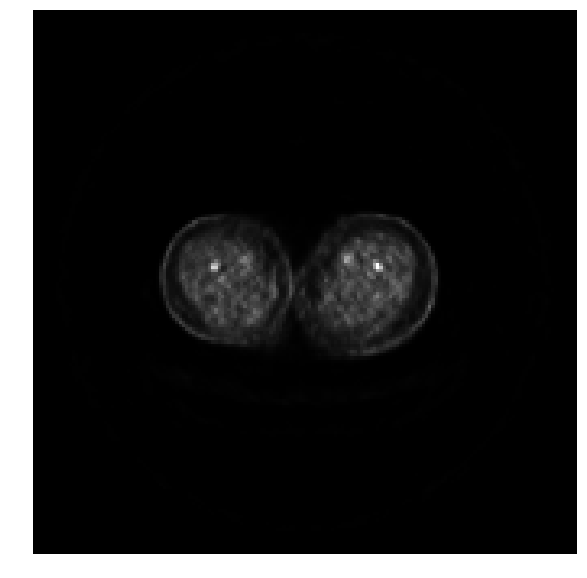

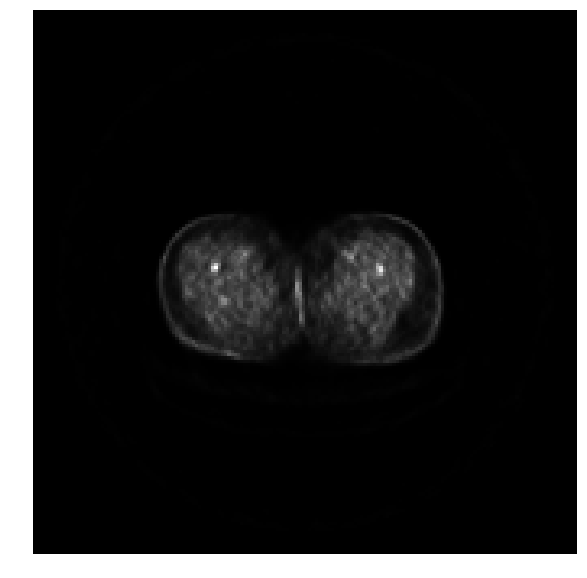

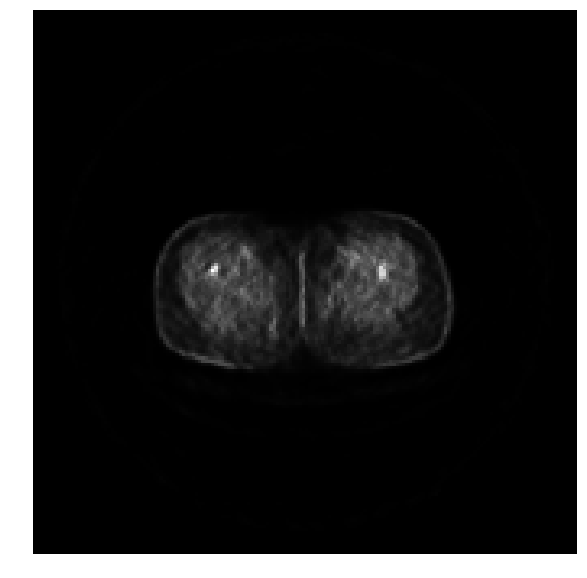

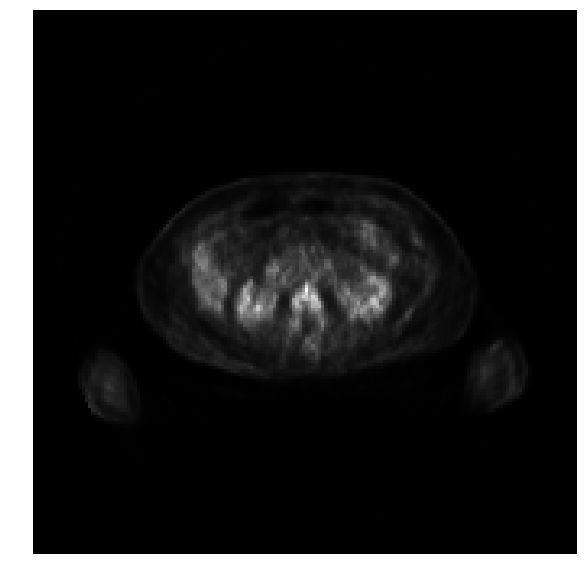

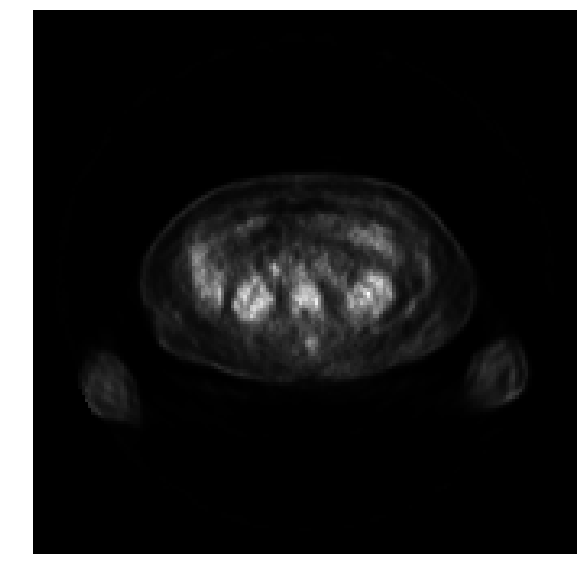

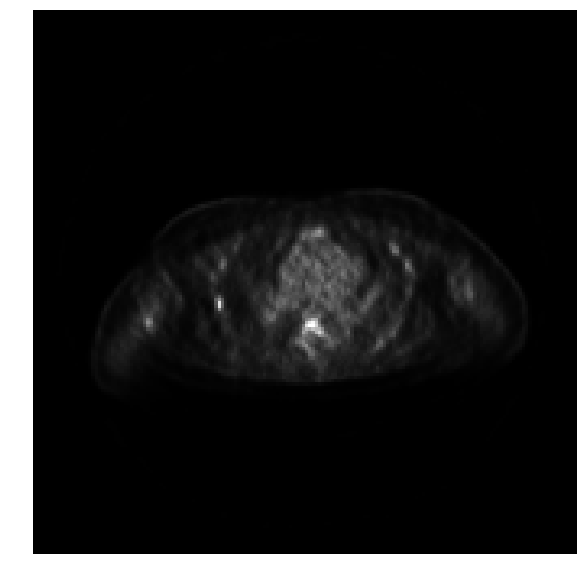

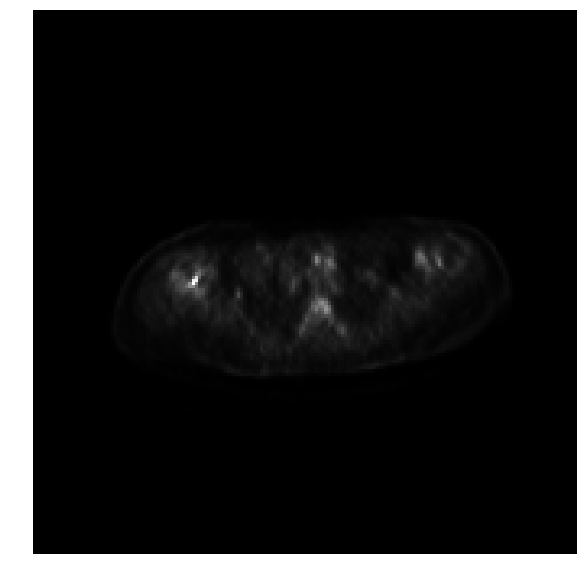

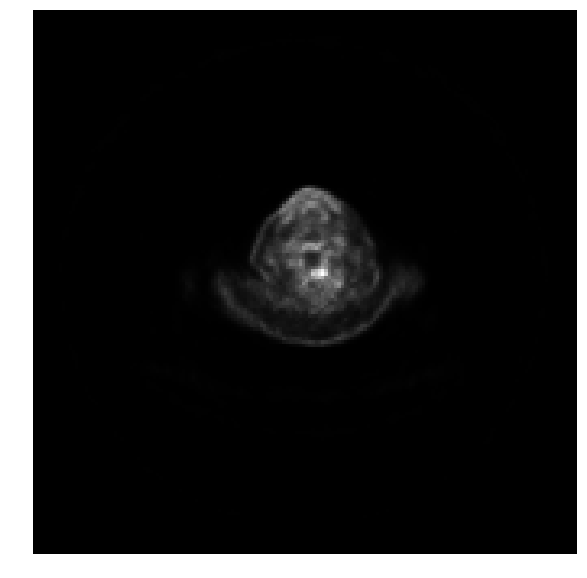

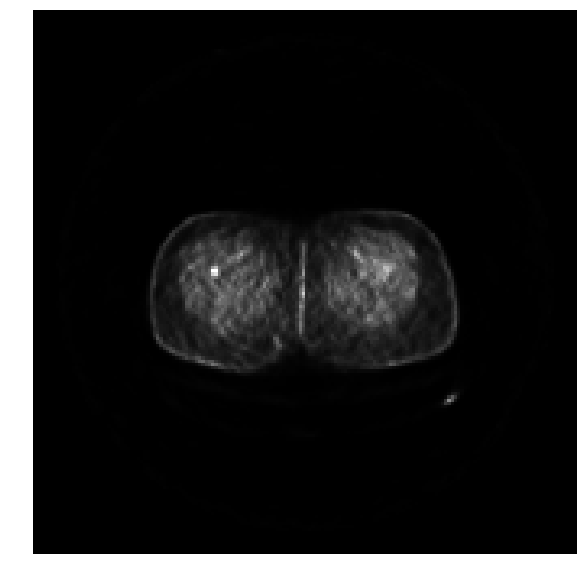

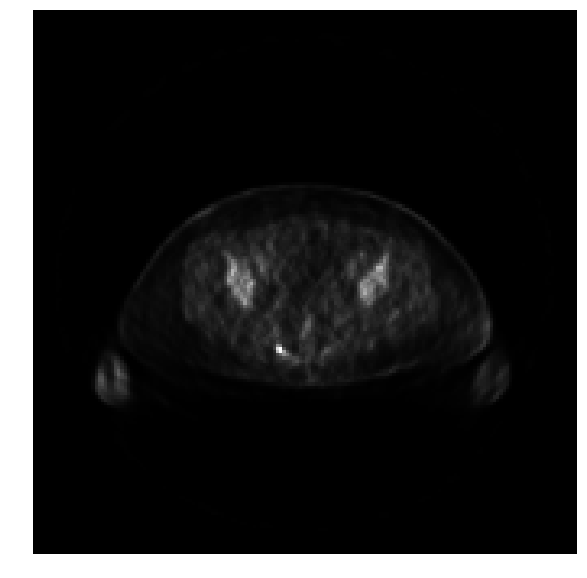

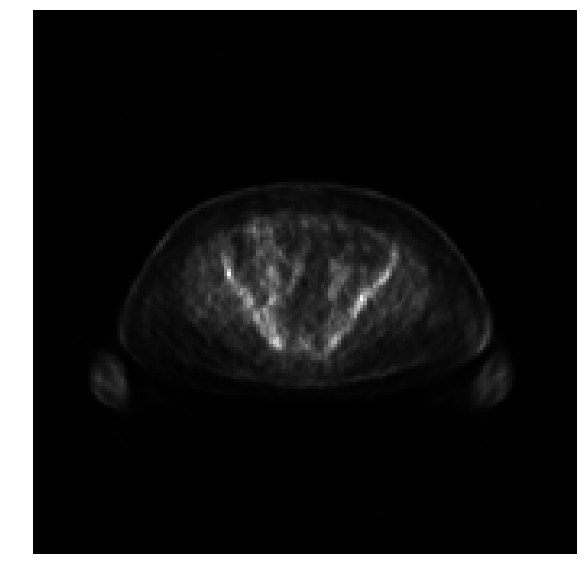

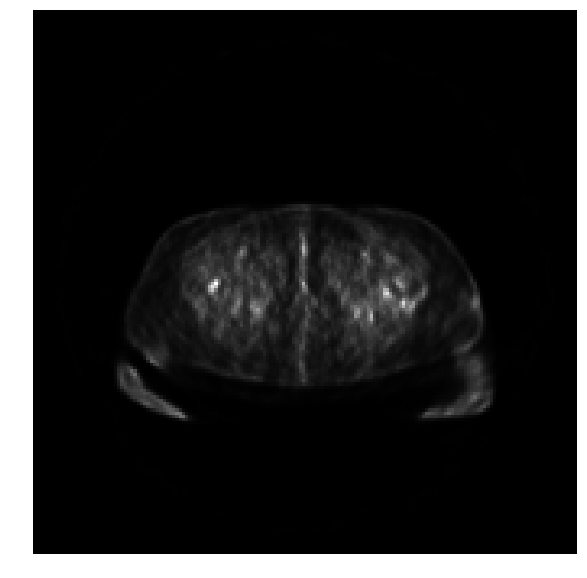

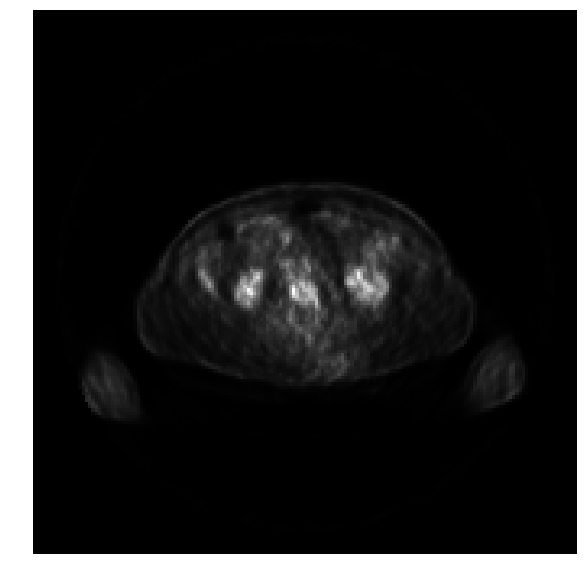

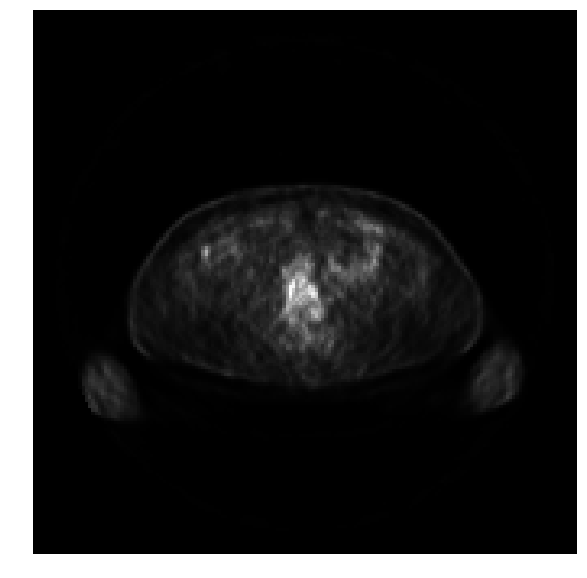

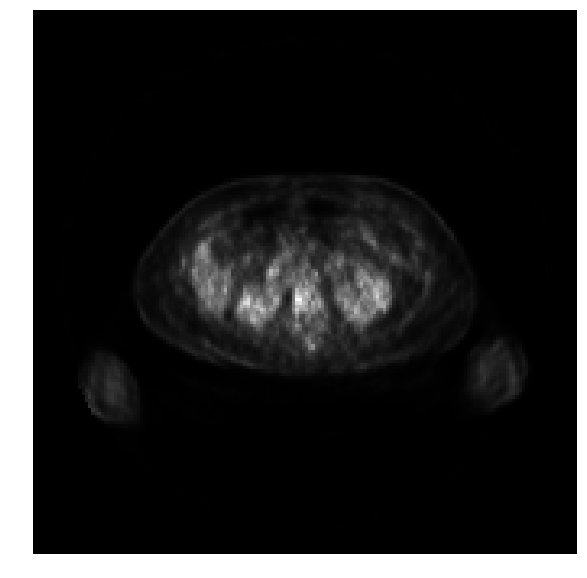

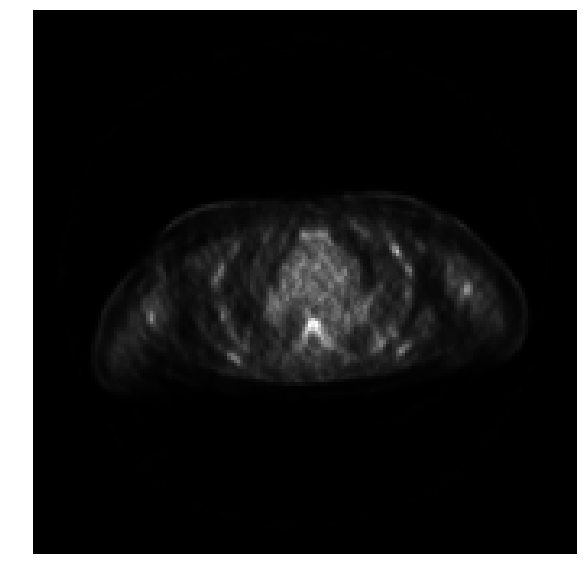

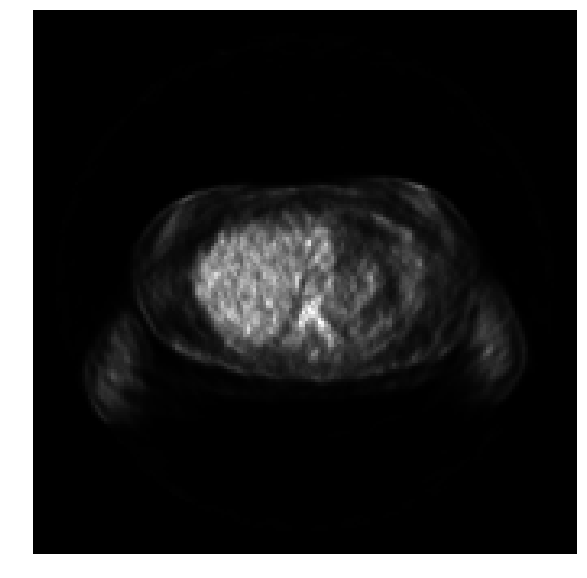

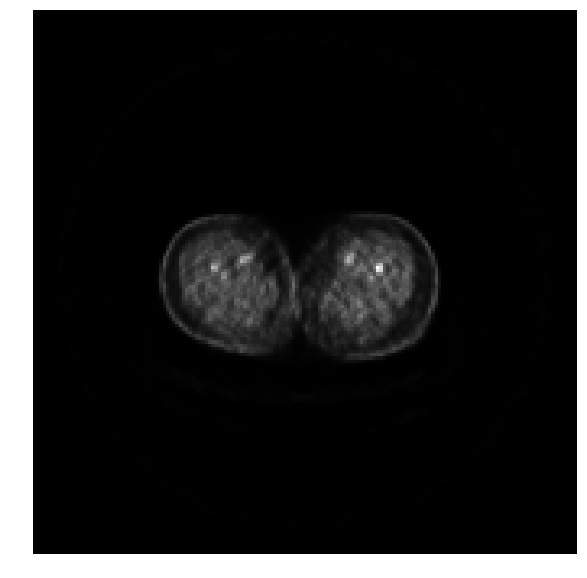

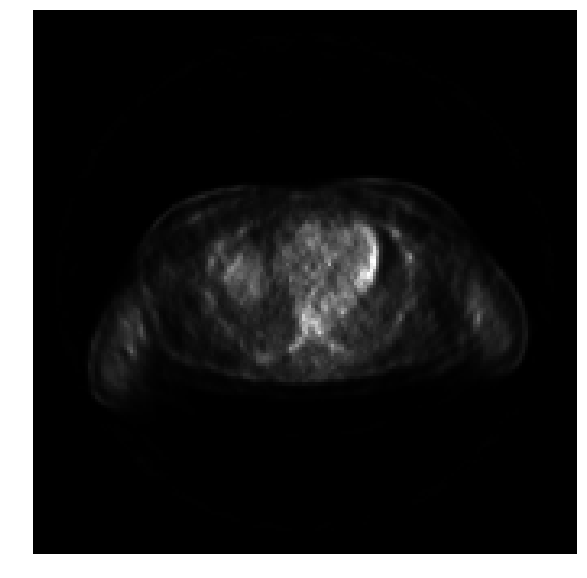

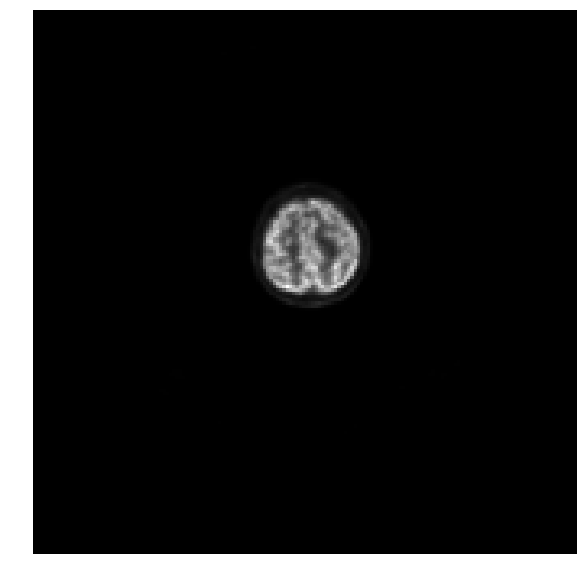

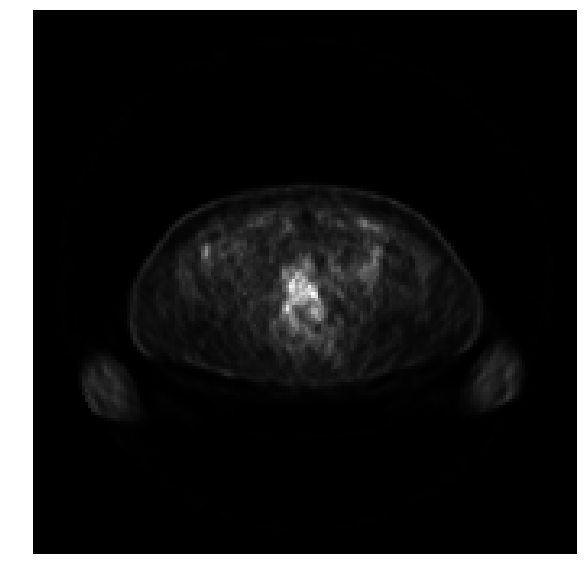

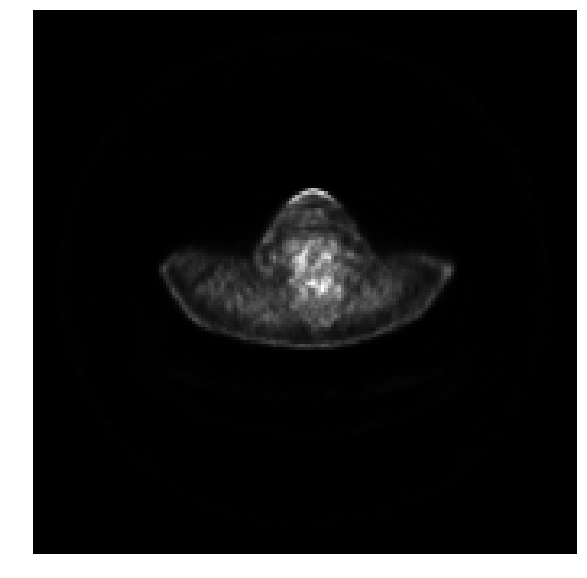

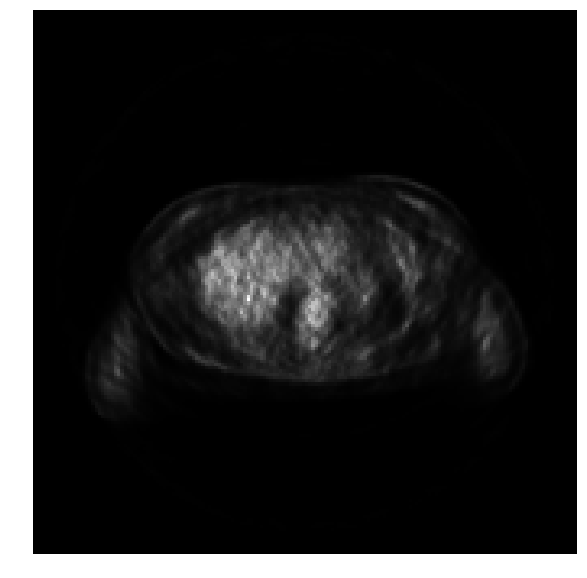

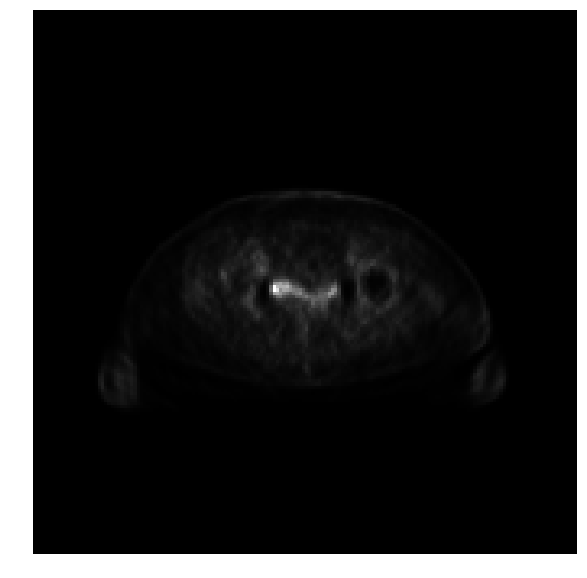

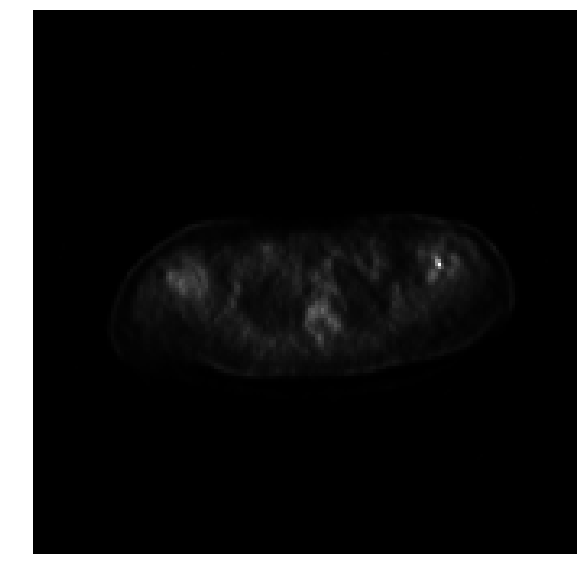

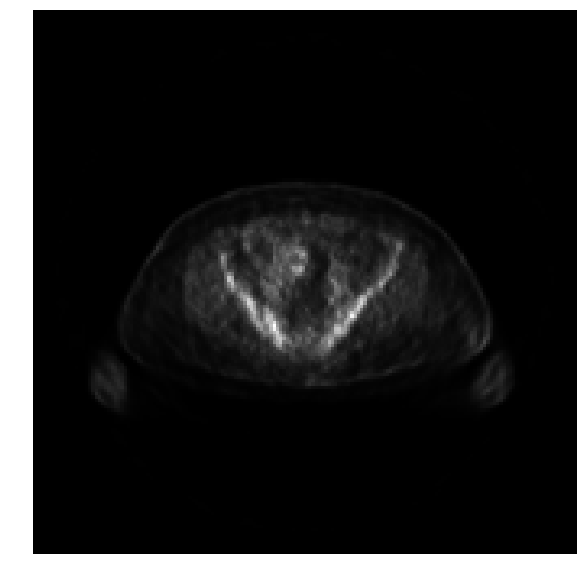

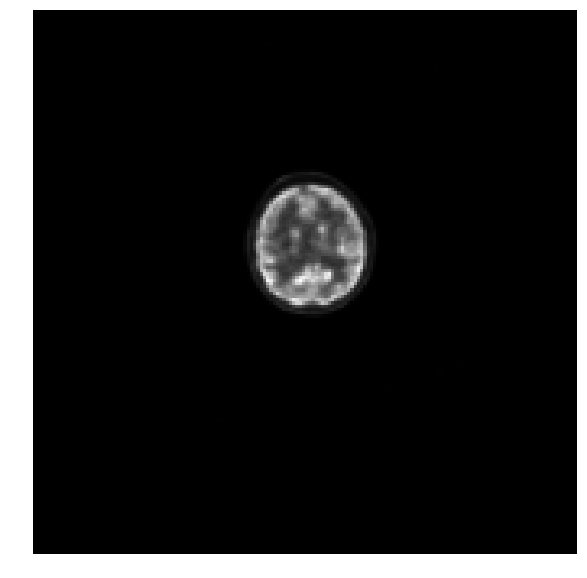

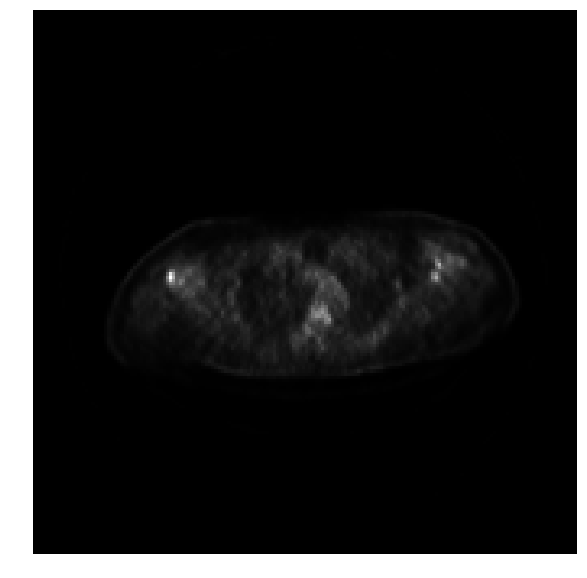

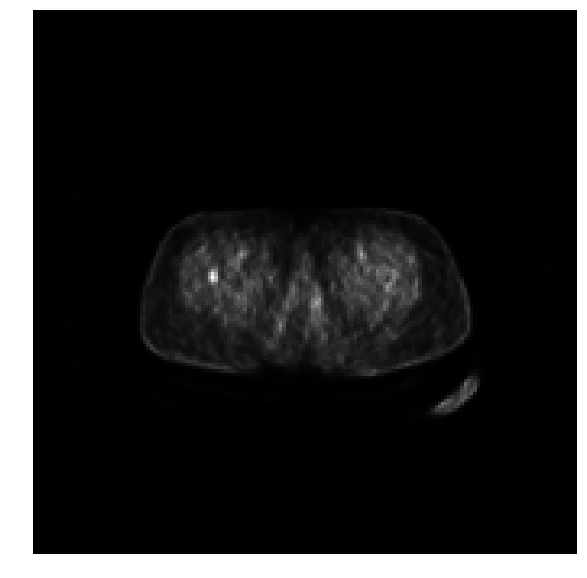

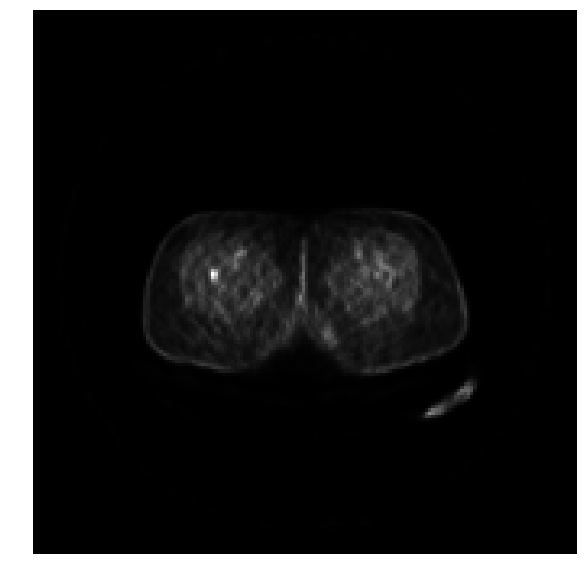

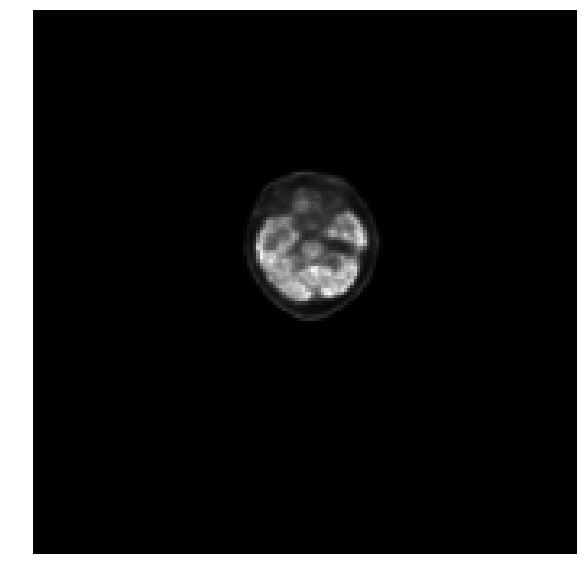

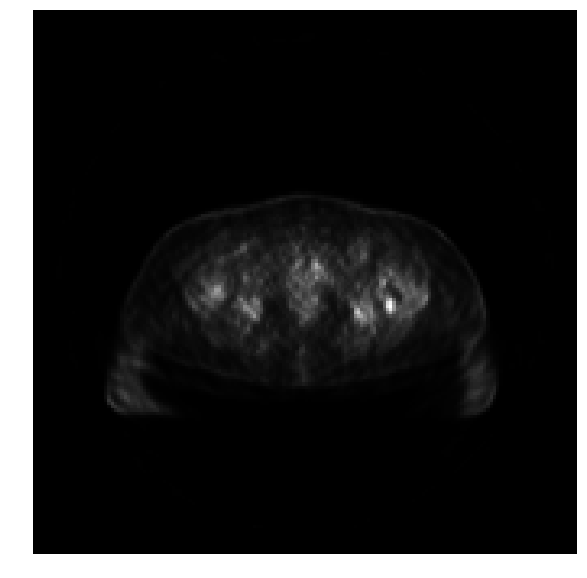

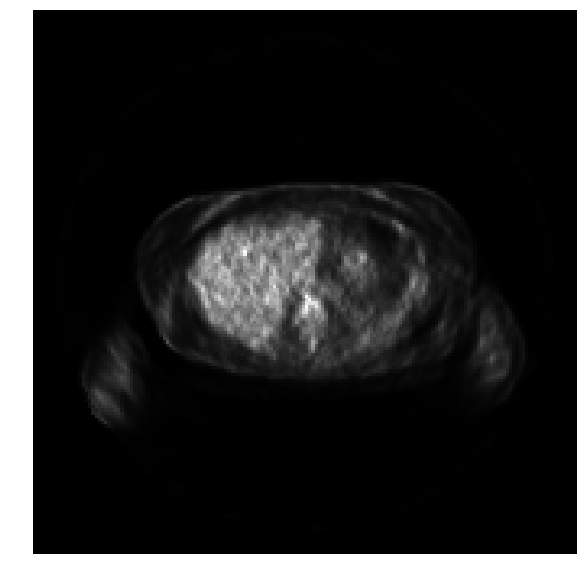

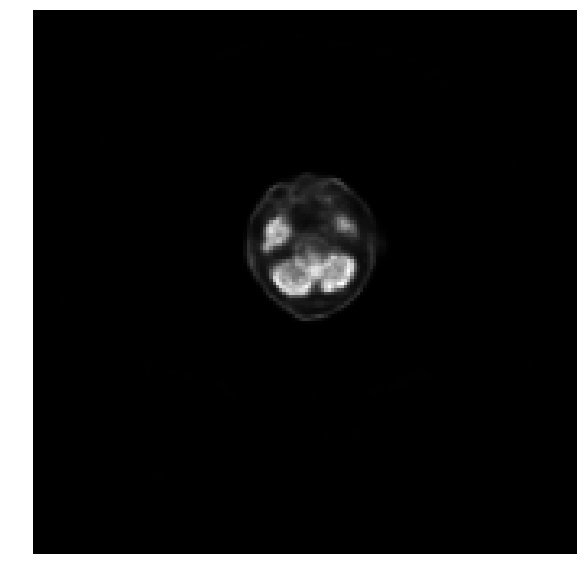

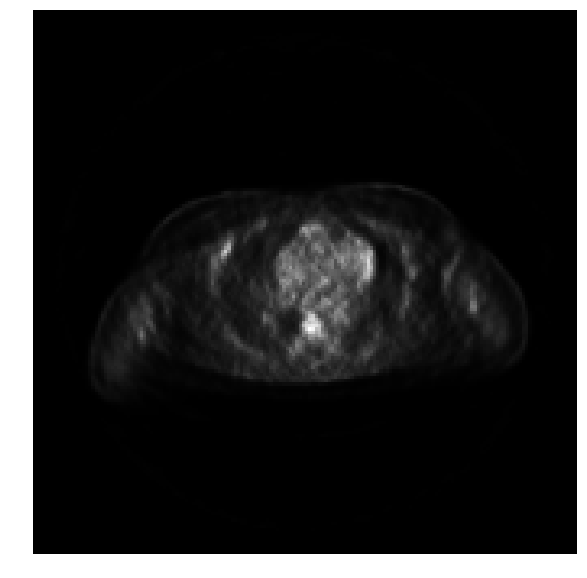

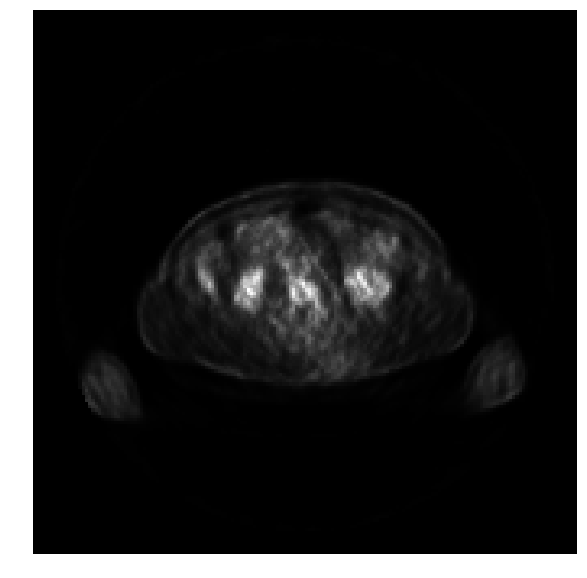

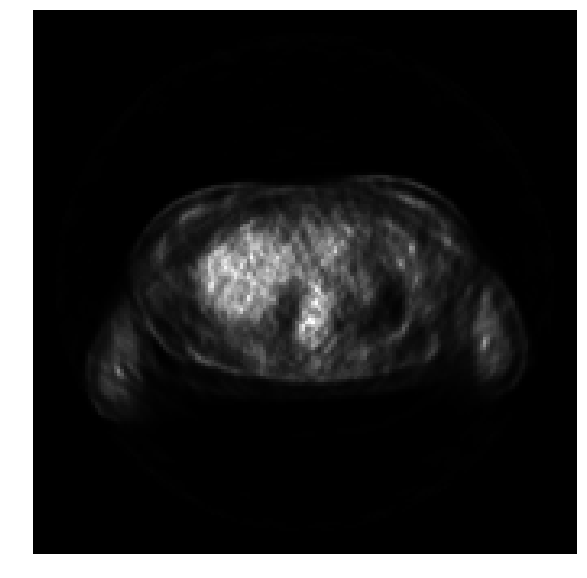

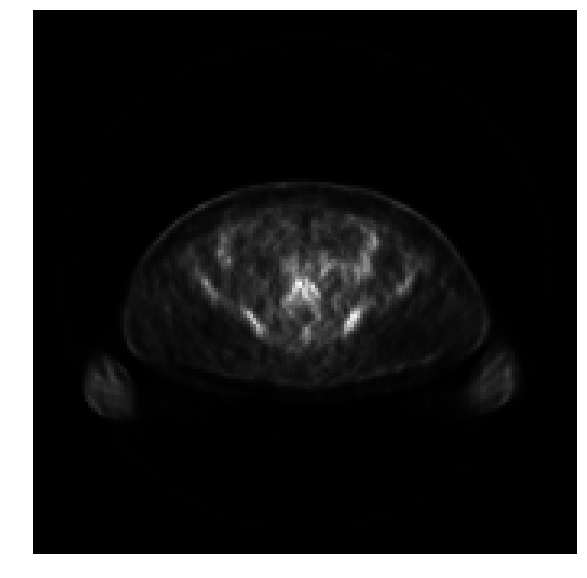

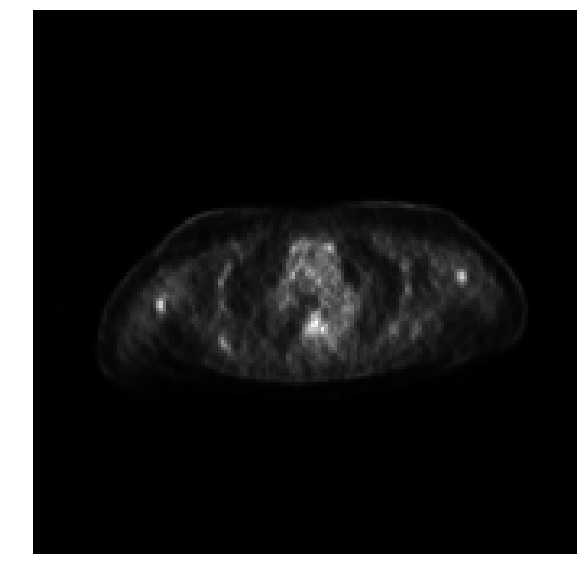

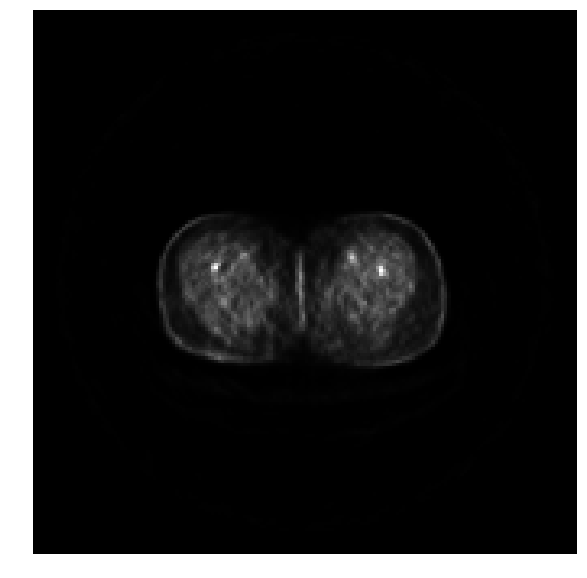

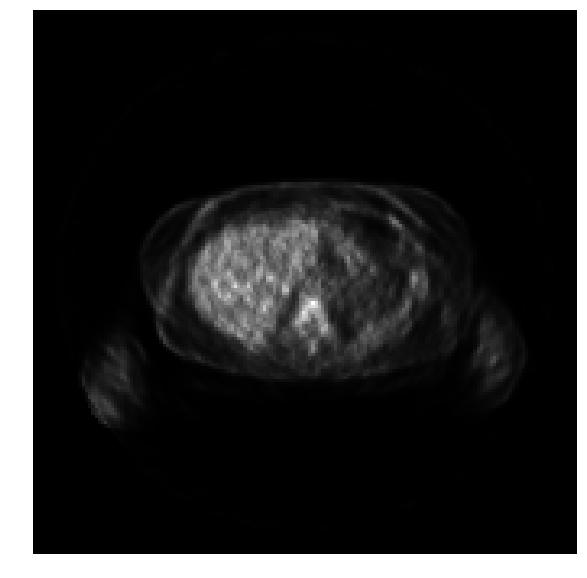

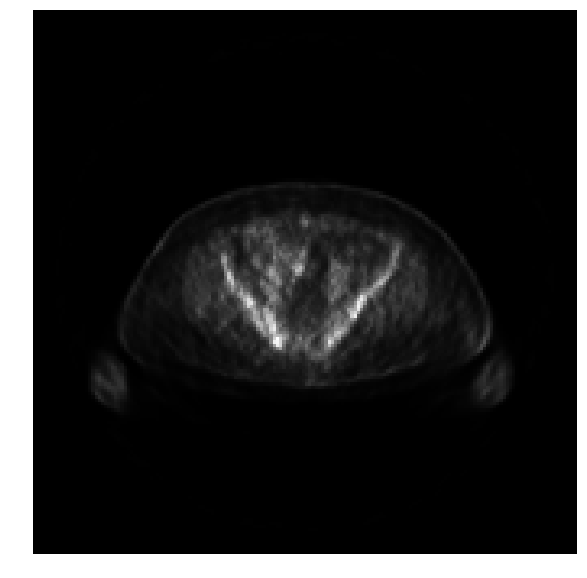

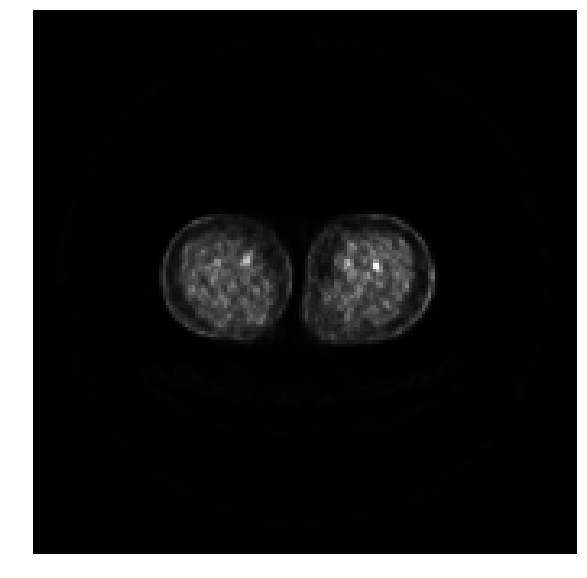

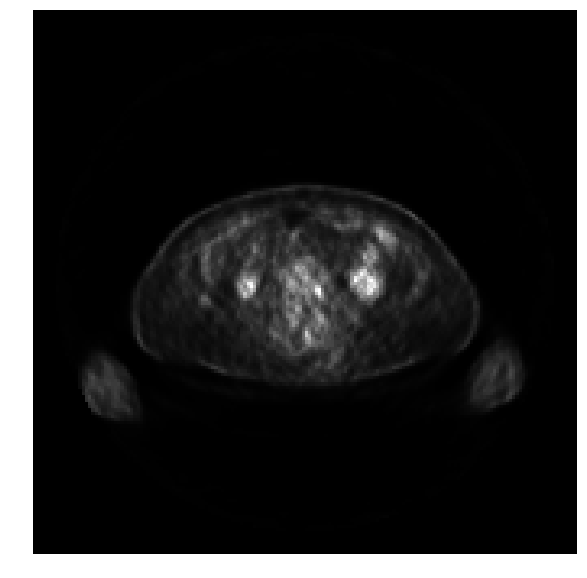

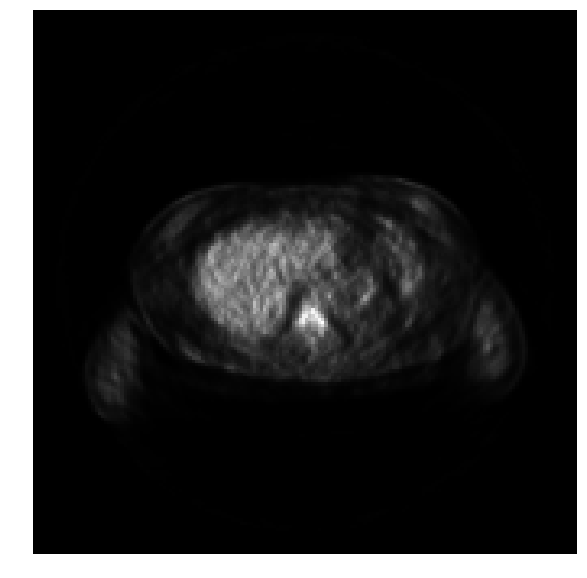

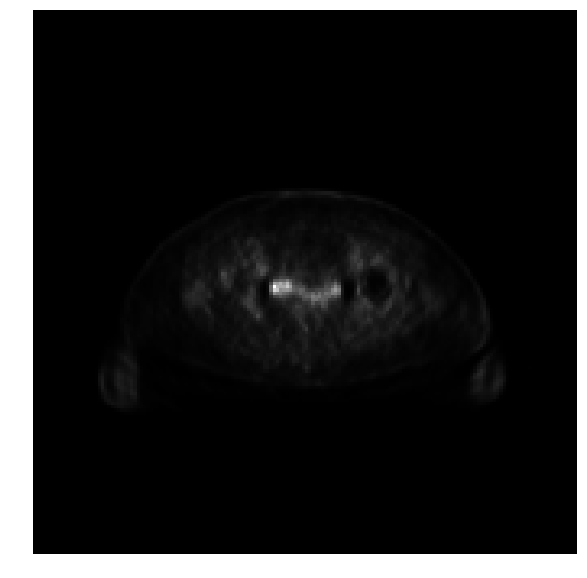

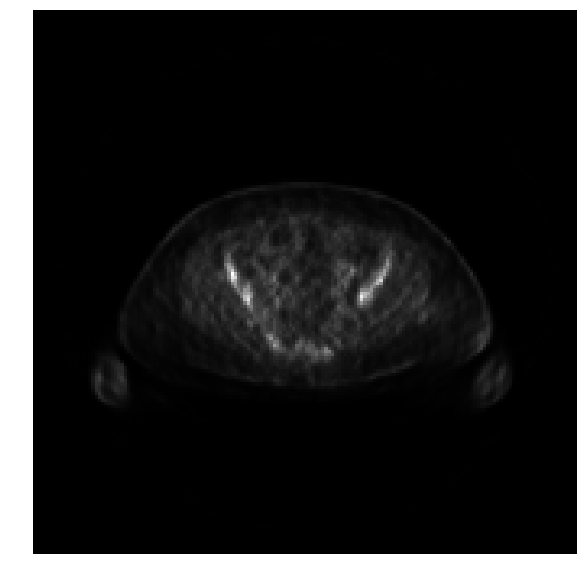

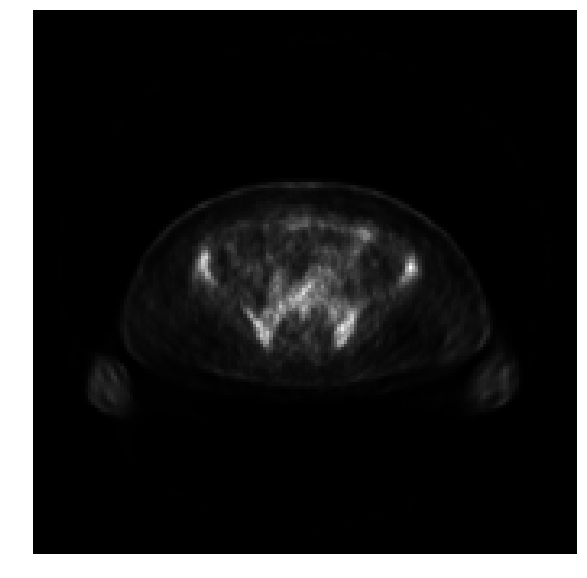

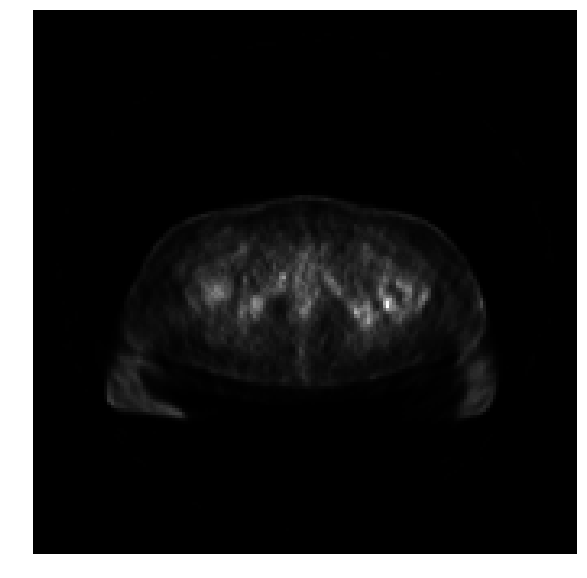

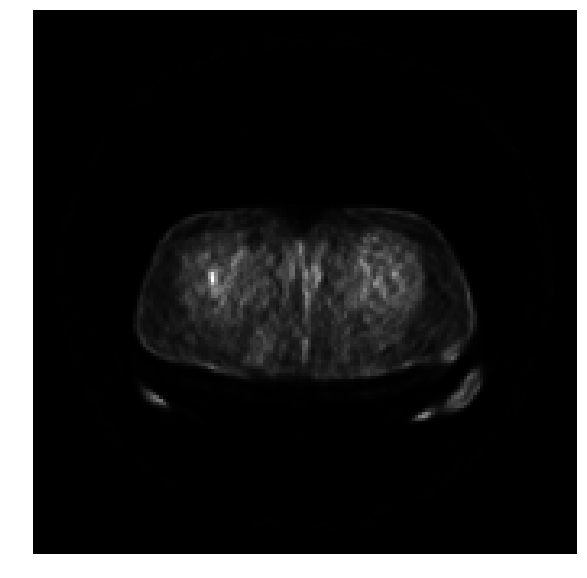

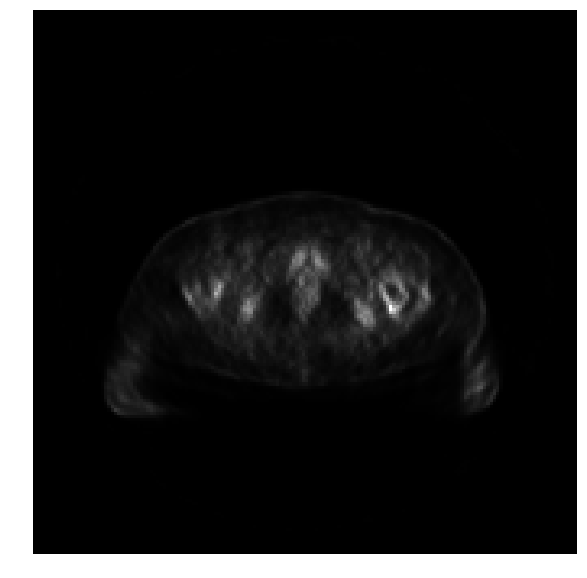

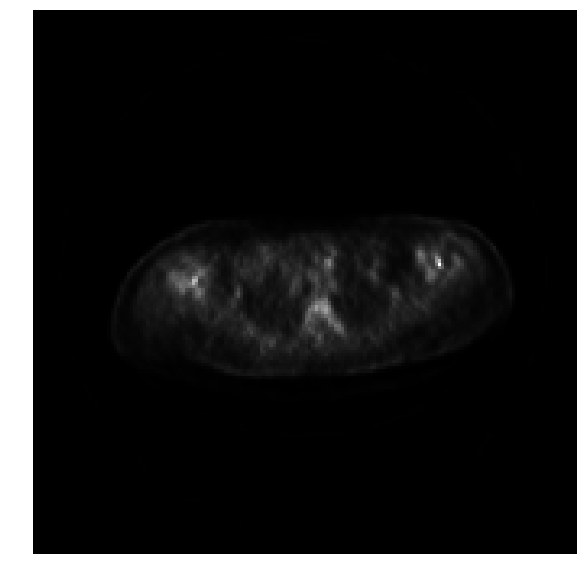

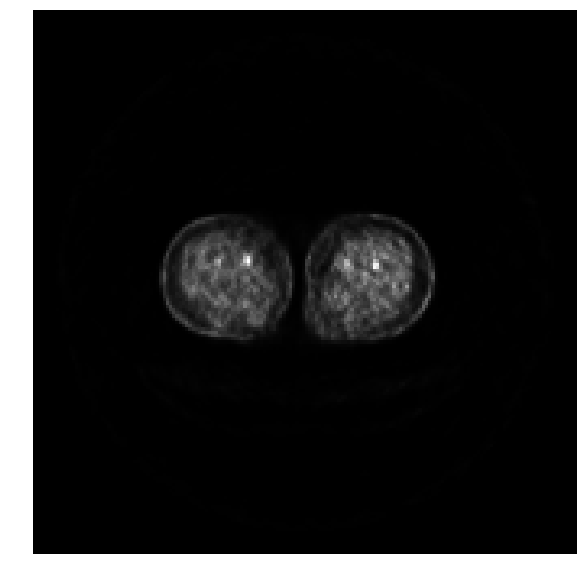

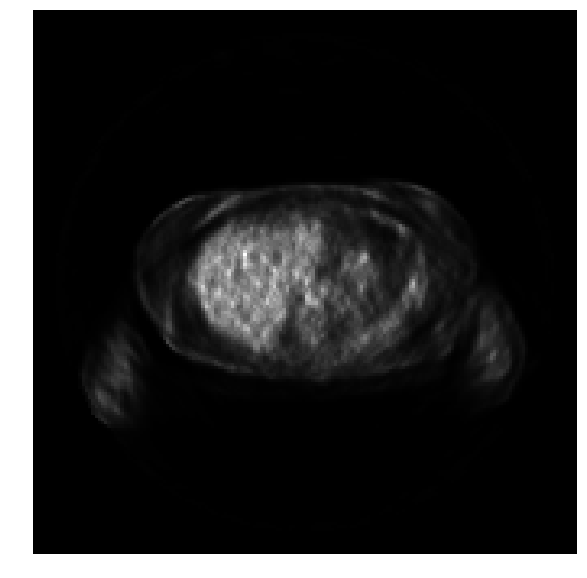

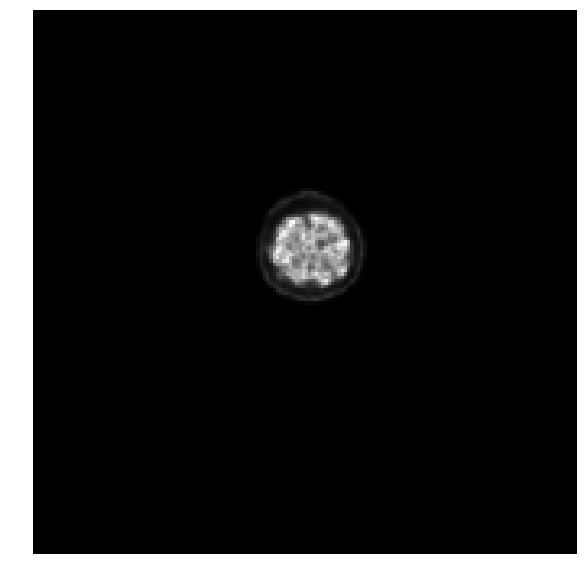

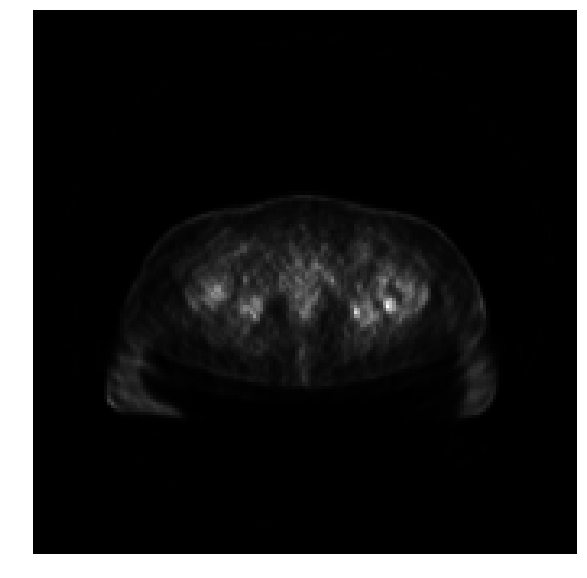

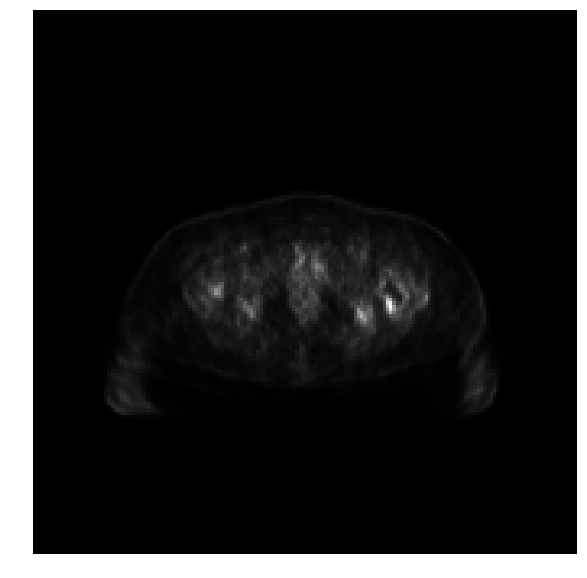

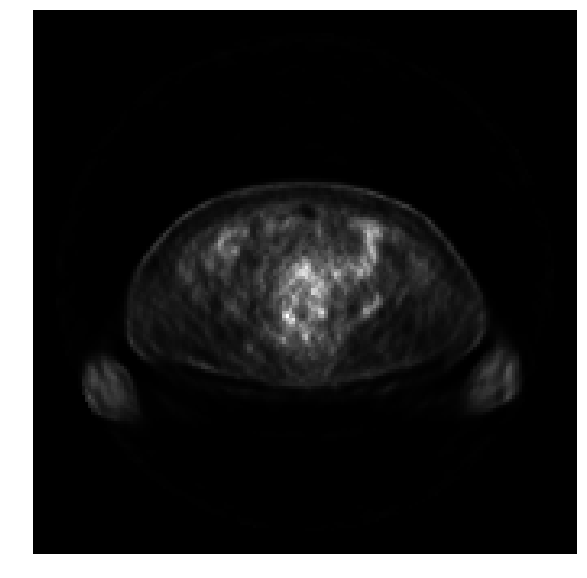

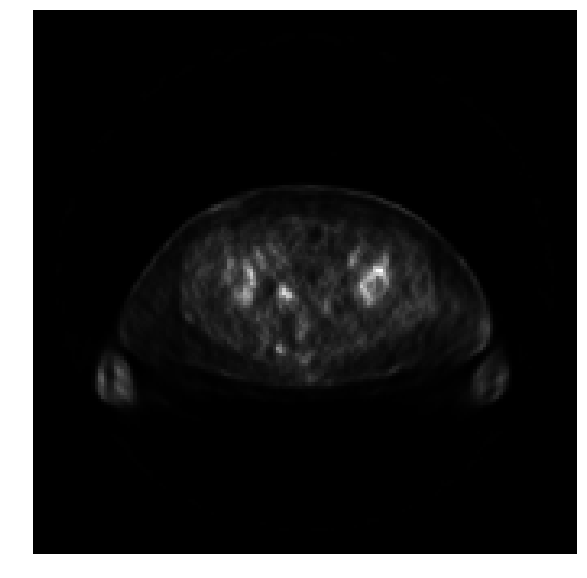

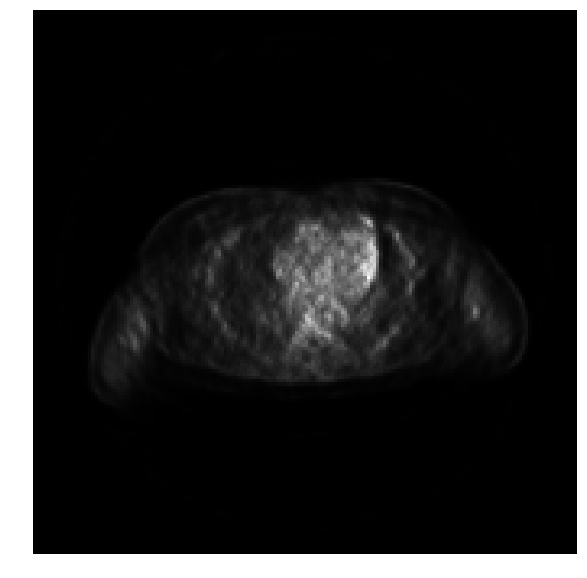

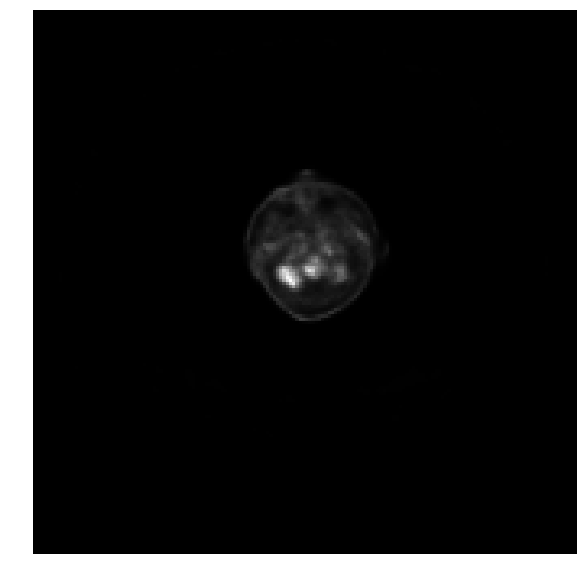

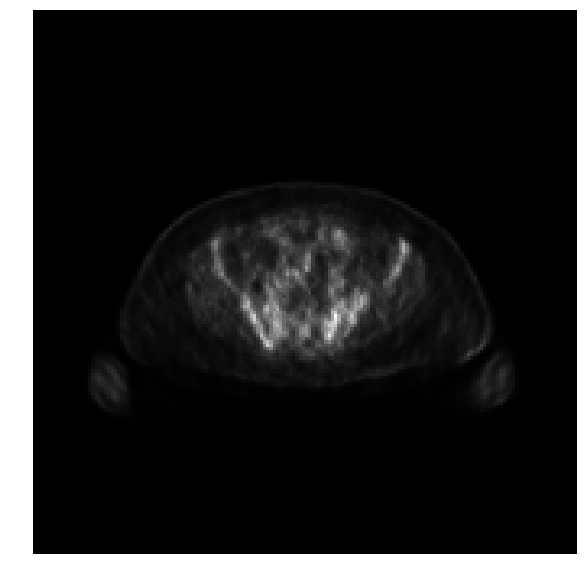

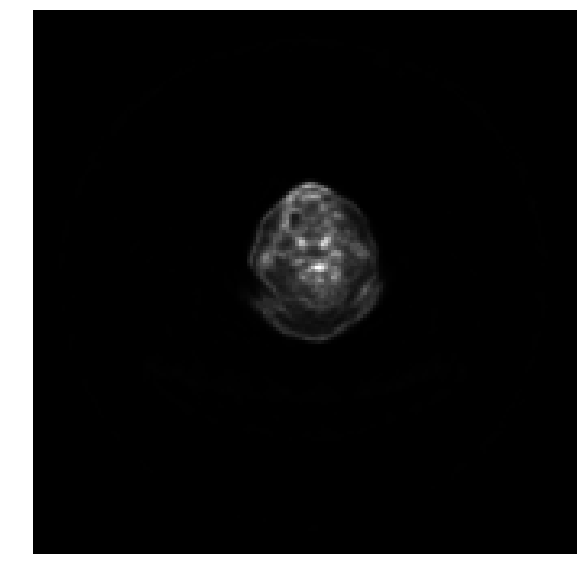

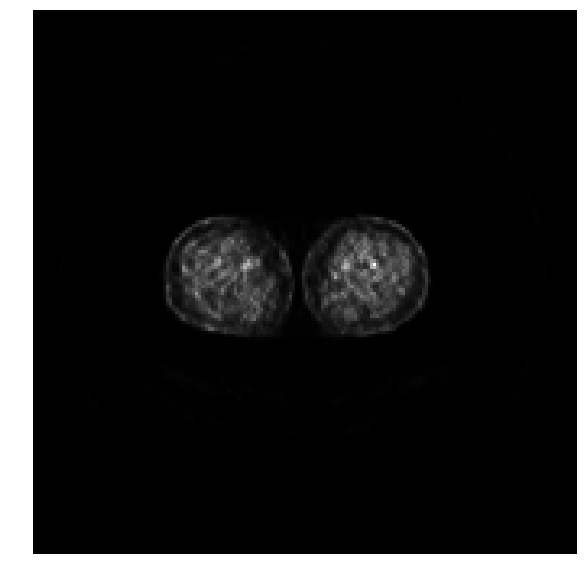

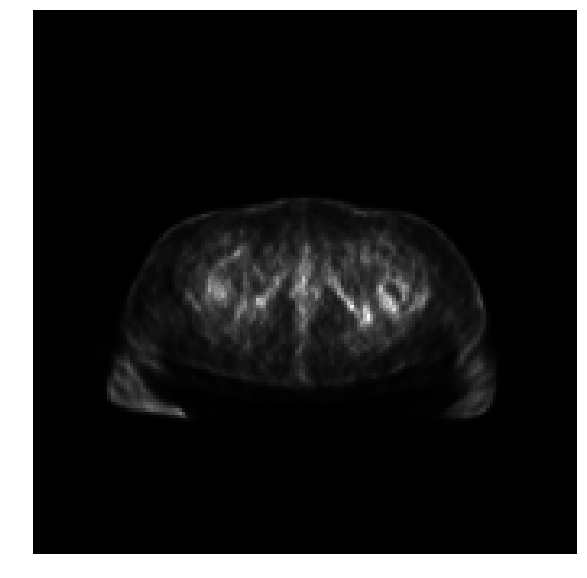

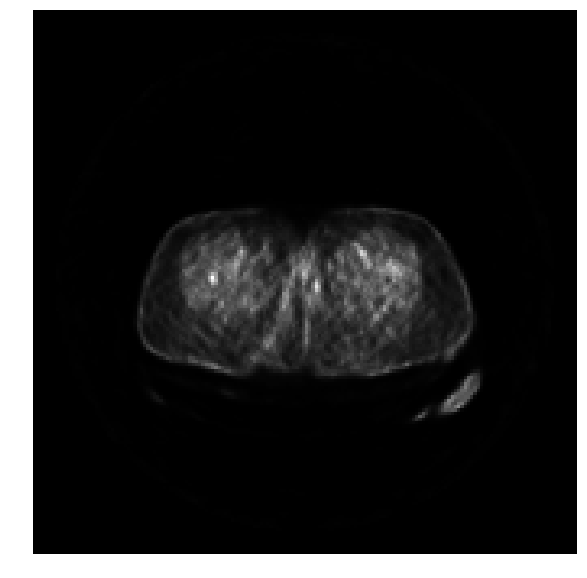

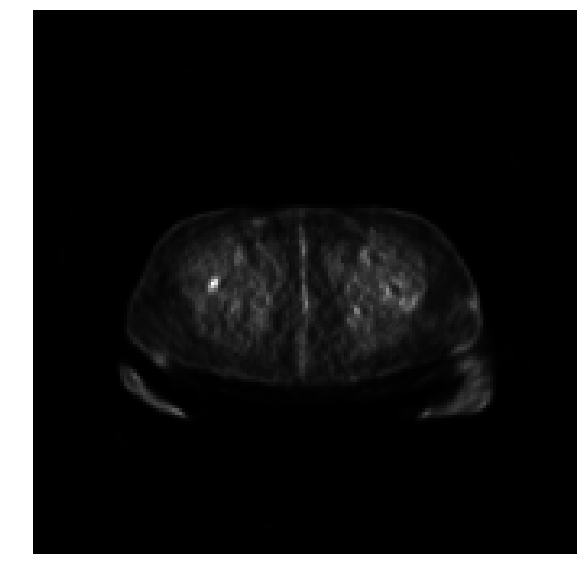

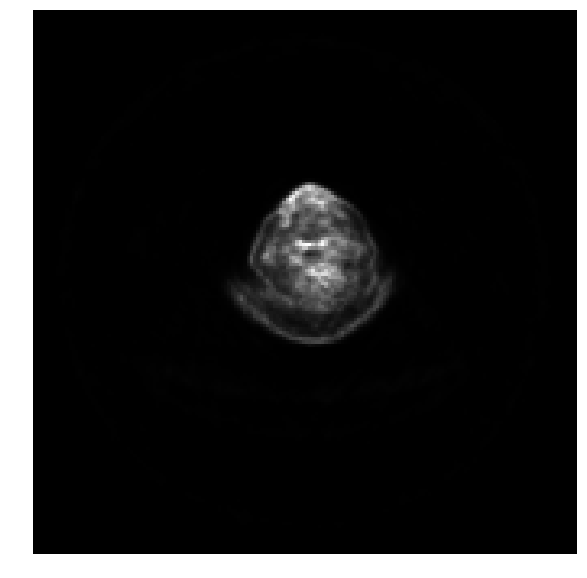

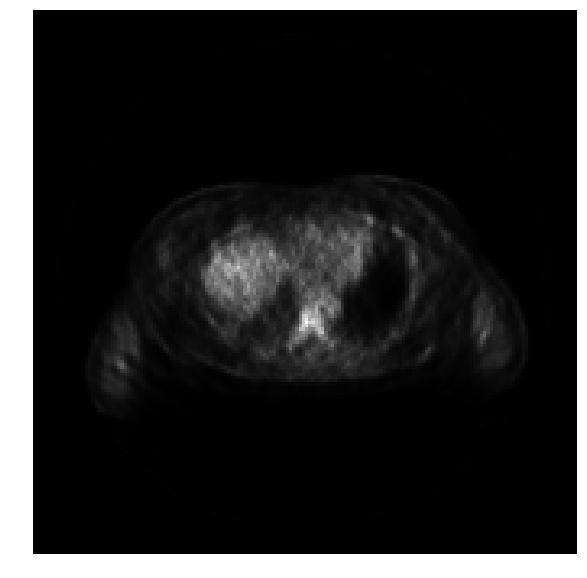

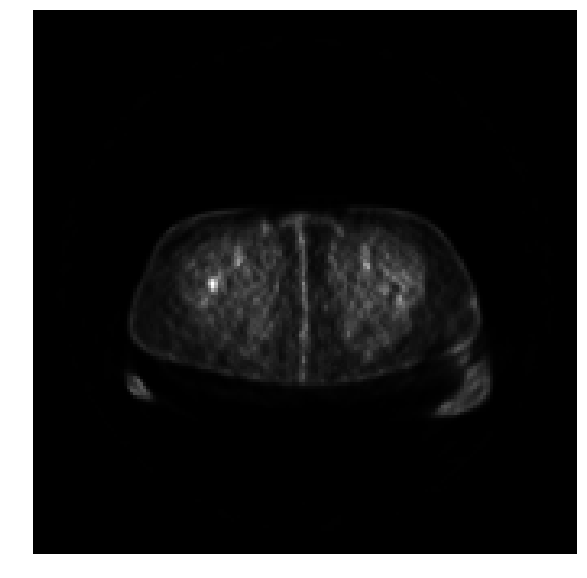

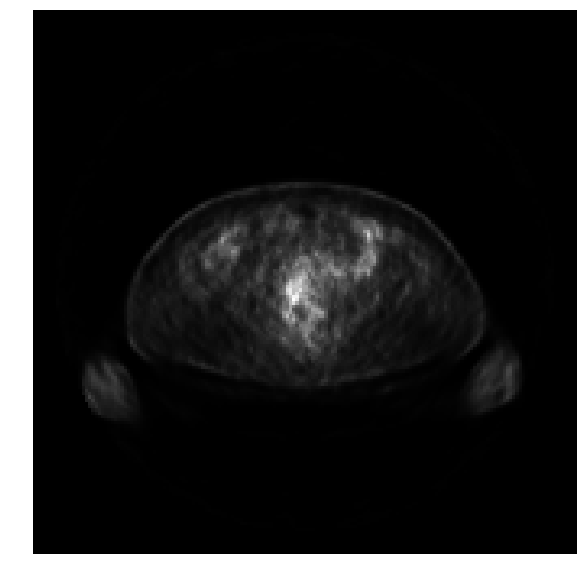

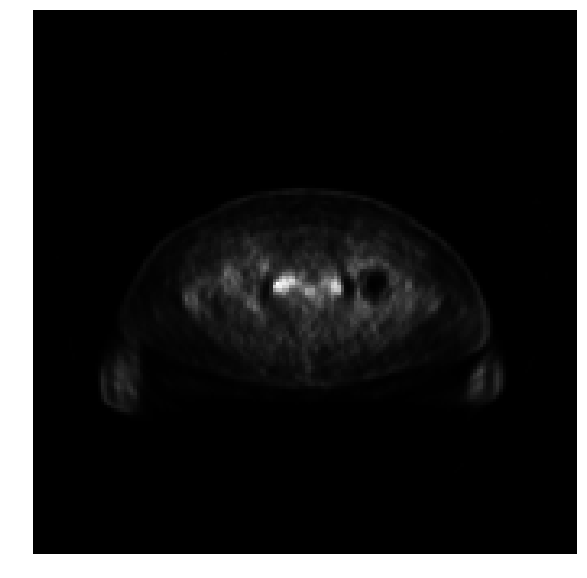

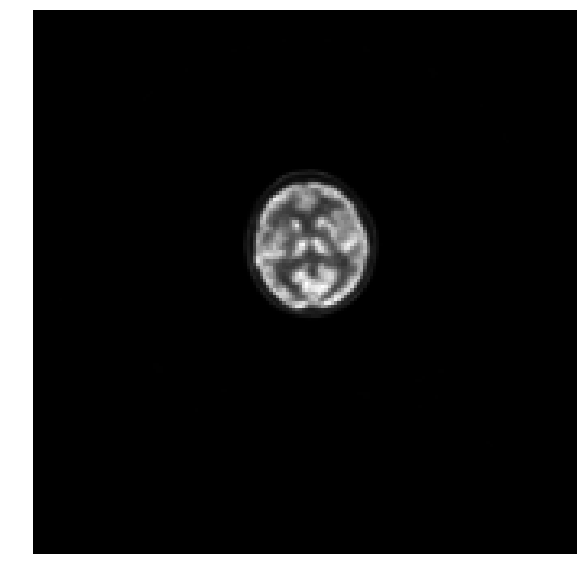

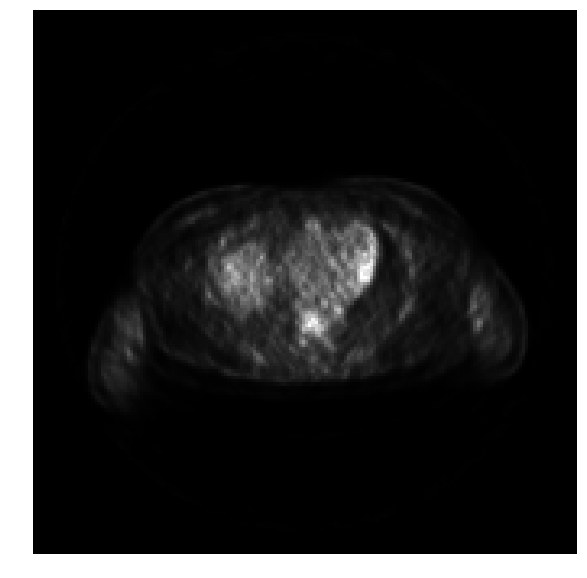

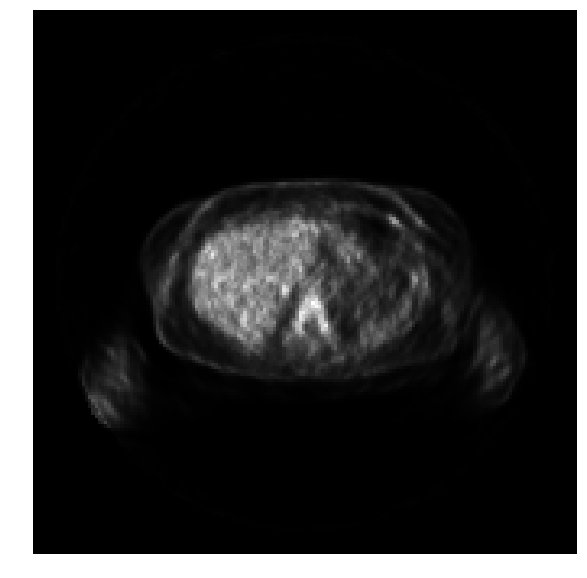

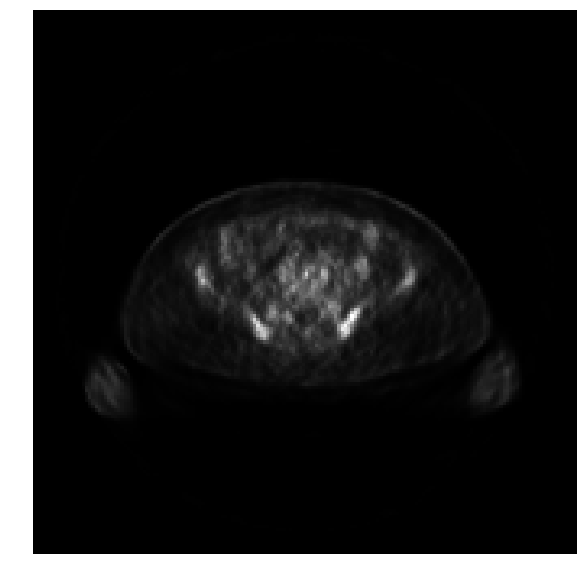

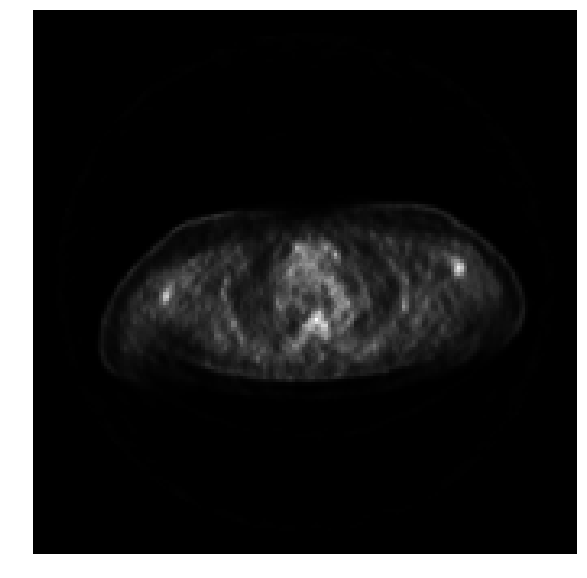

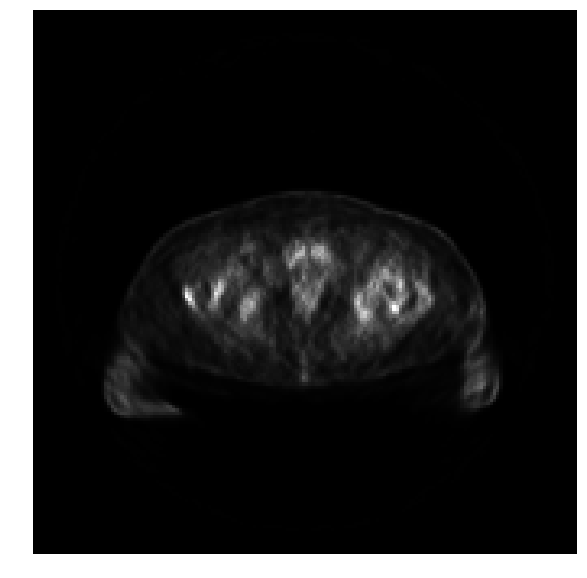

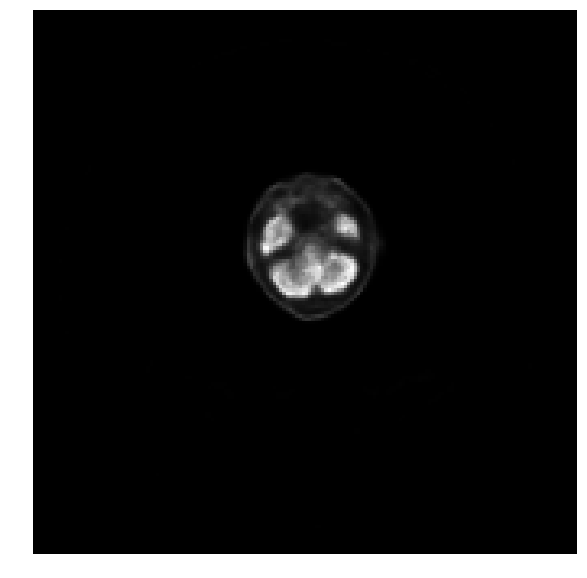

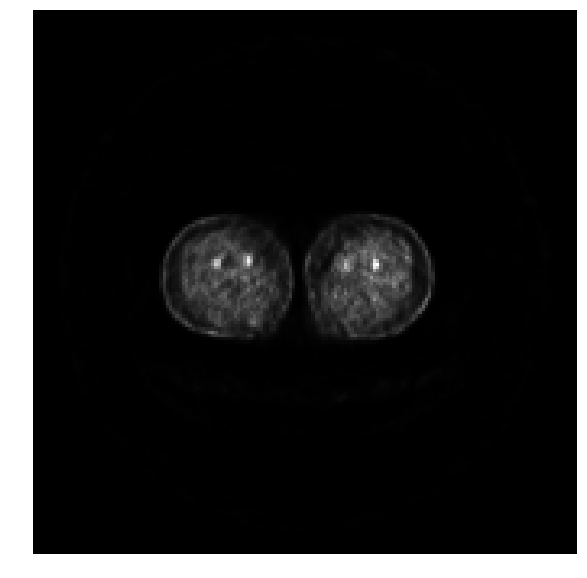

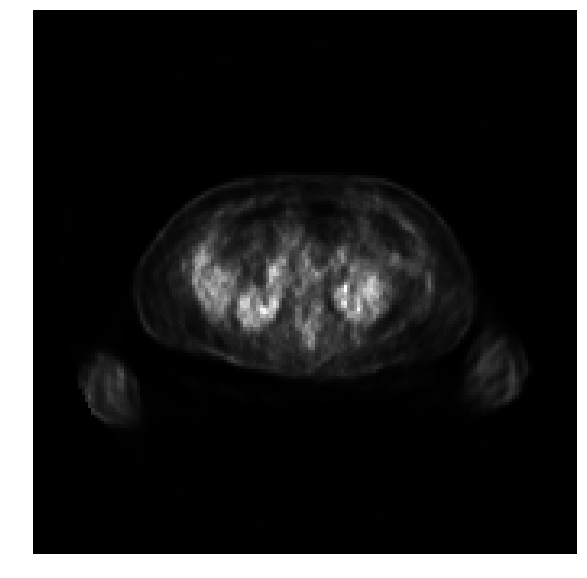

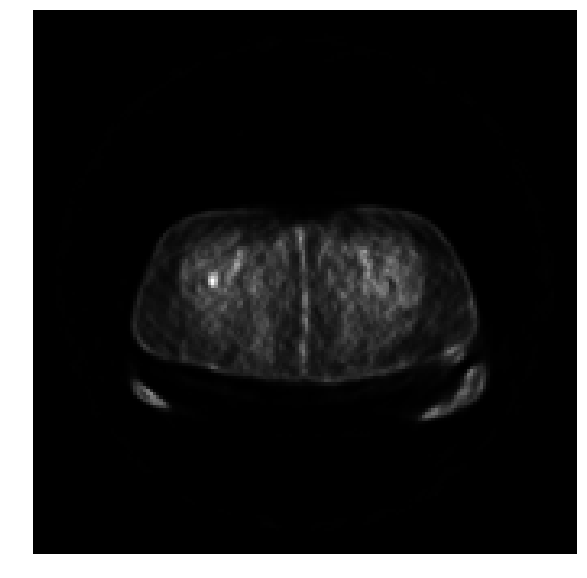

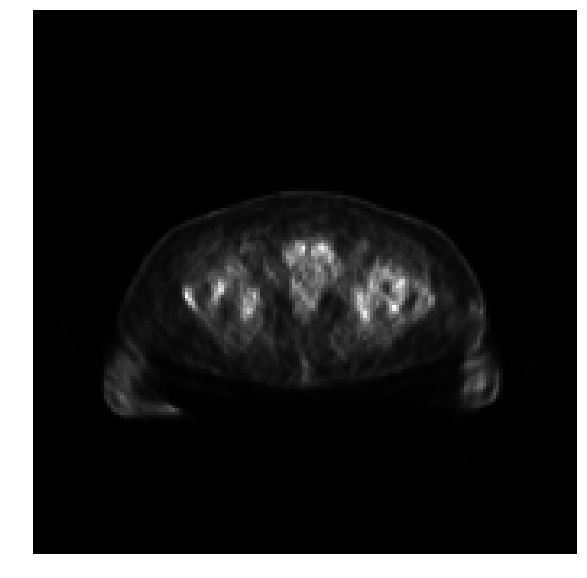

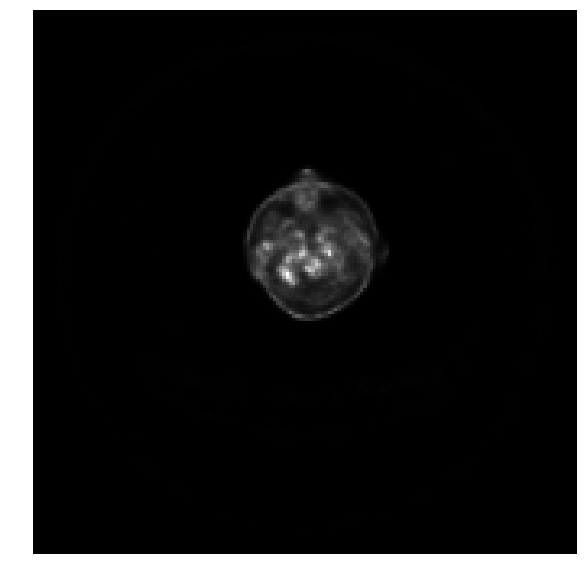

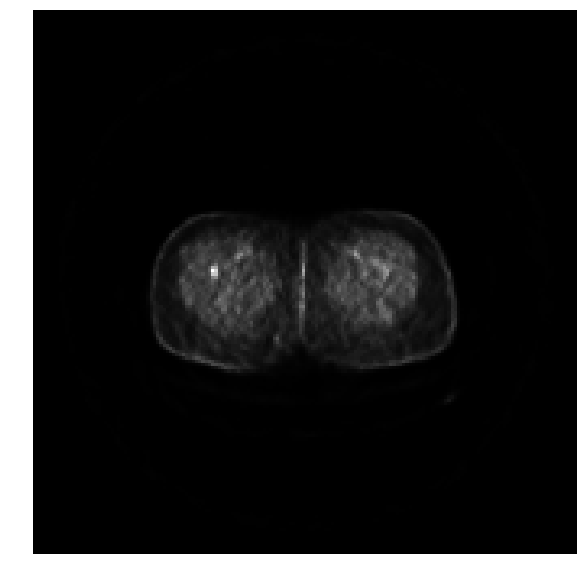

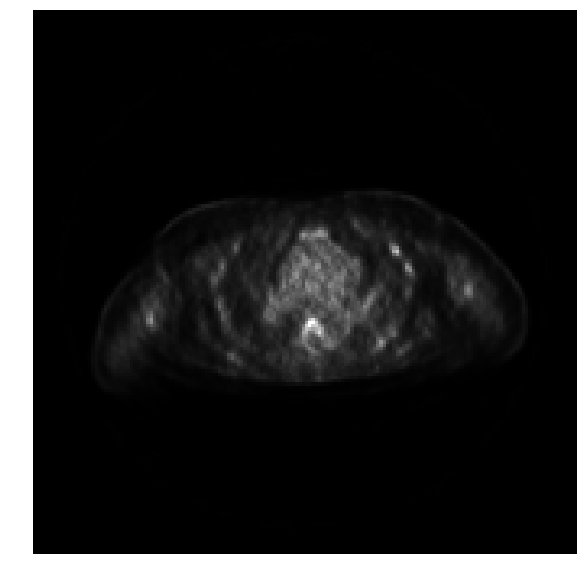

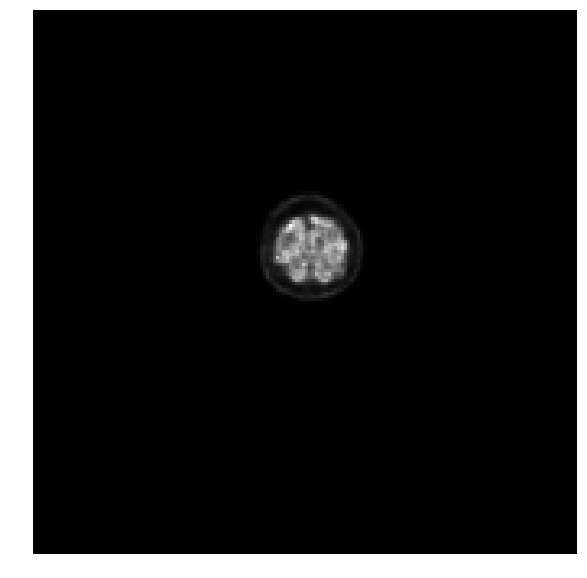

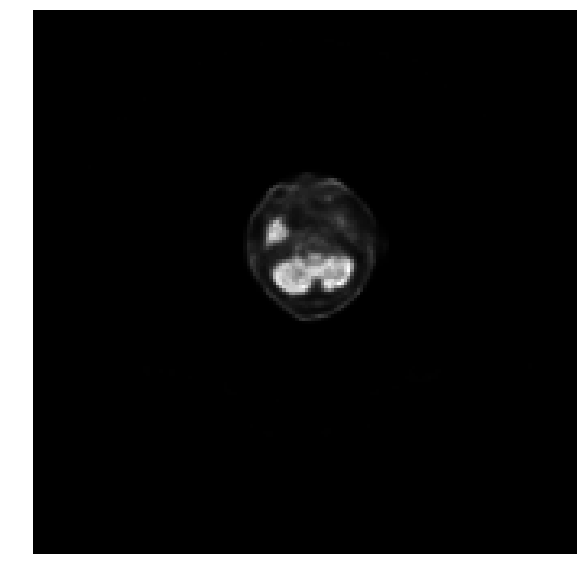

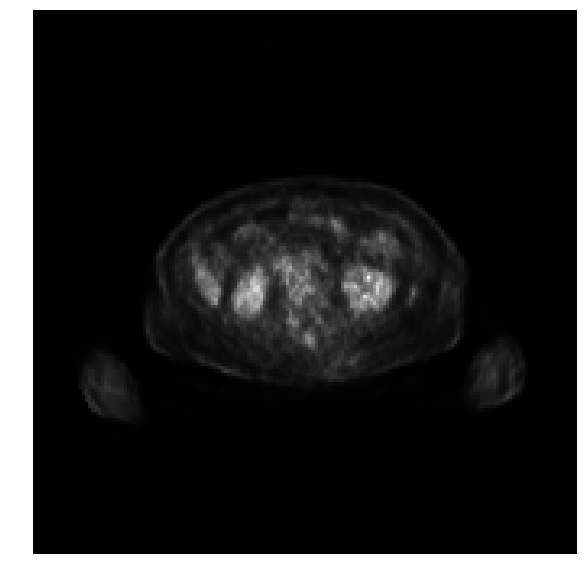

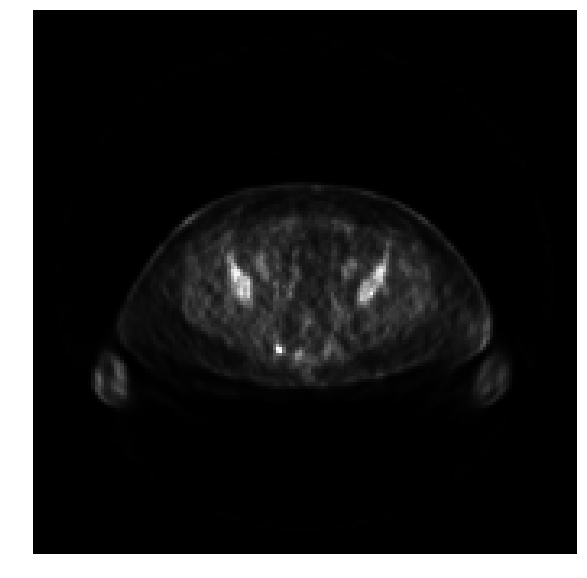

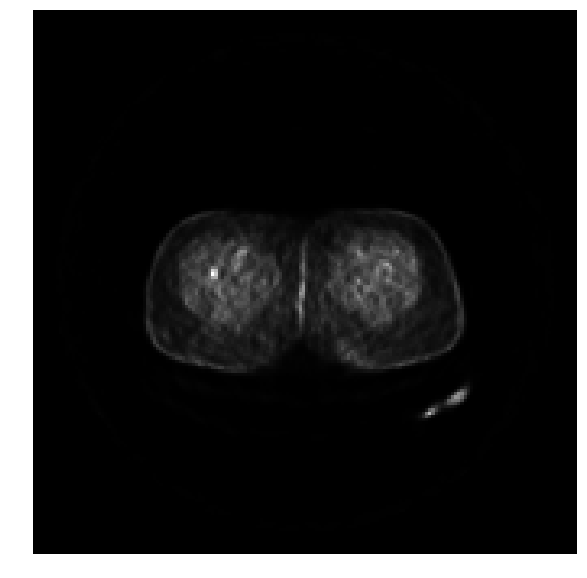

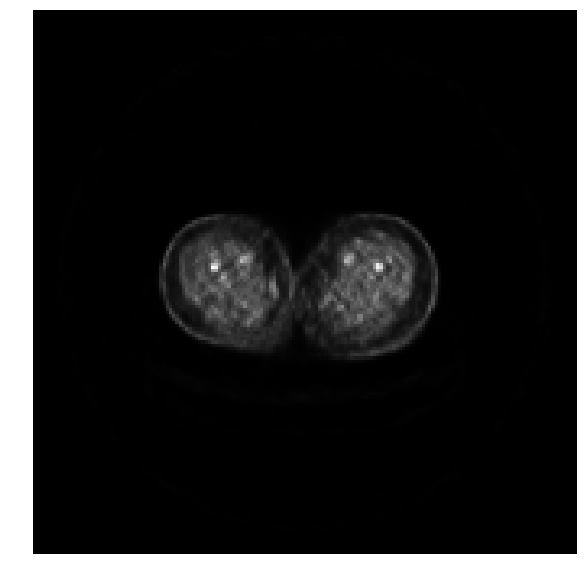

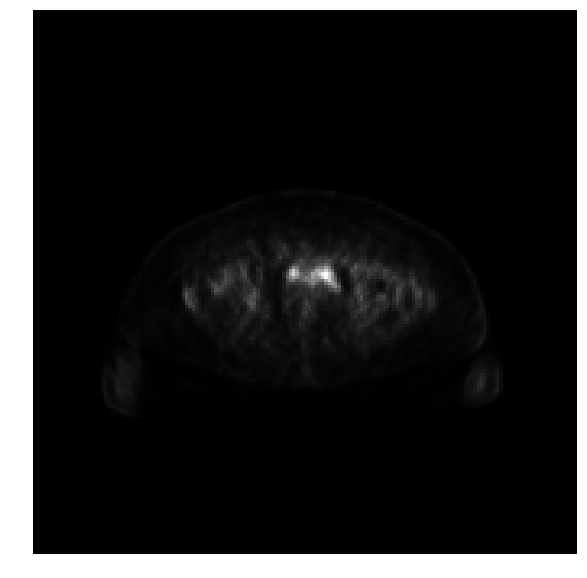

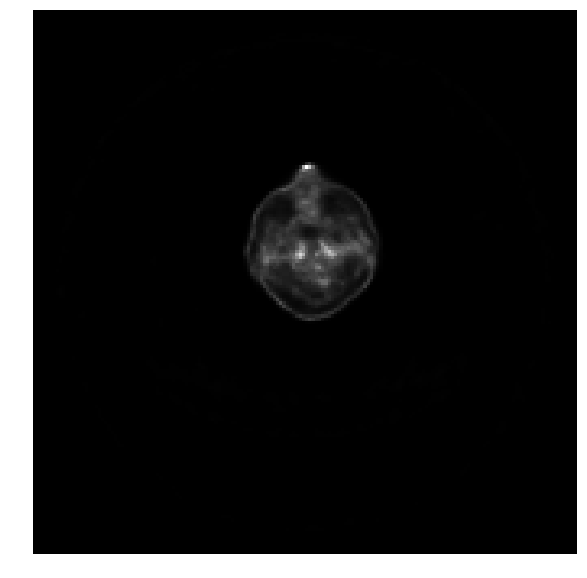

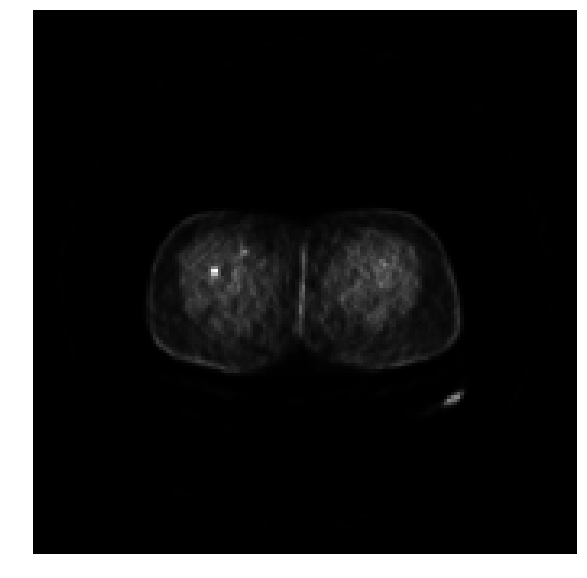

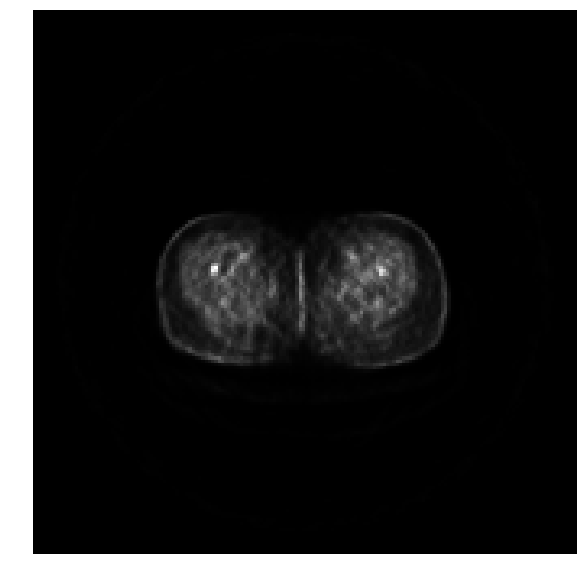

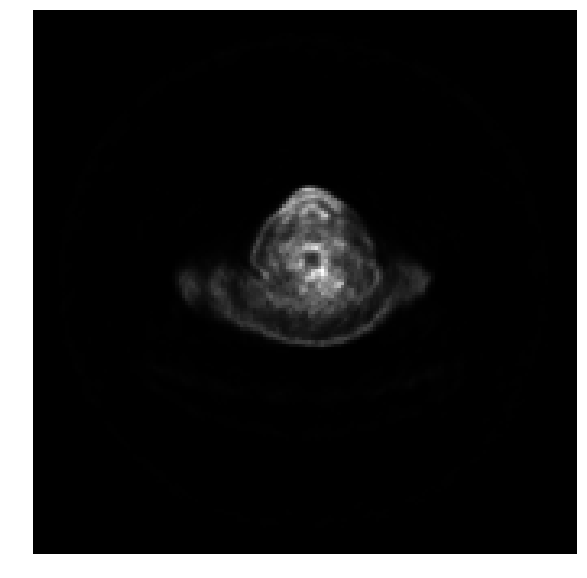

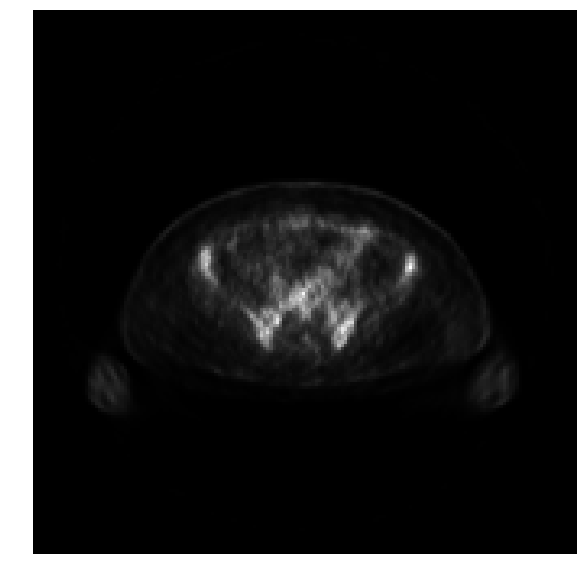

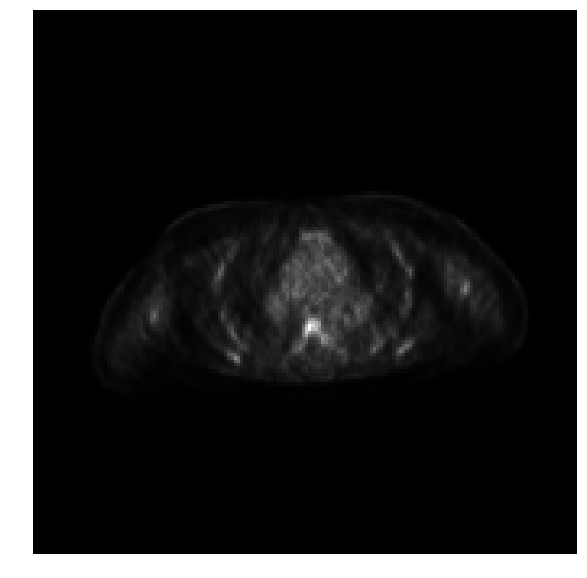

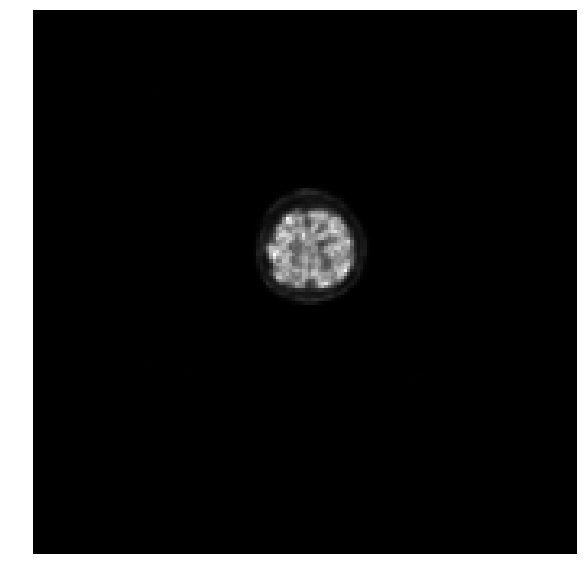

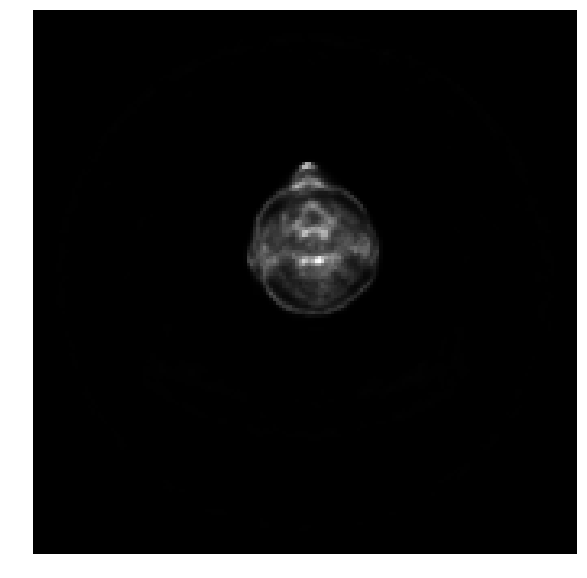

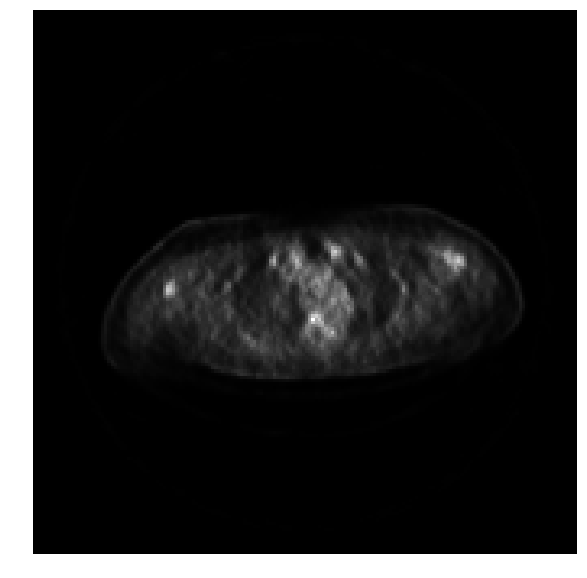

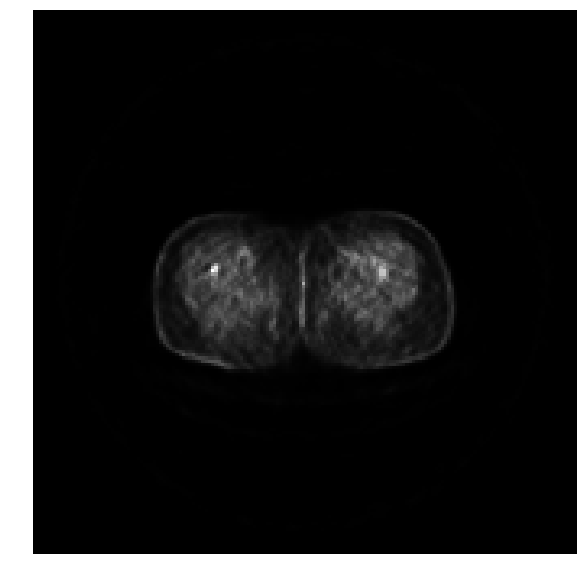

In [6]:
for dirName, subDirList, fileList in os.walk(path+"001-026/dcm"):
    for fileName in fileList:
        if ".dcm" in fileName.lower():
            file = os.path.join(dirName, fileName)
            listFilesDCM.append(file)
            dcm = dicom.read_file(file)
            img = dcm.pixel_array
            plt.figure(figsize=(10,10))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.show()


In [12]:
listFilesDCM = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/dcm"):
    for file in filenames:
        listFilesDCM.append(os.path.join(dirpath,file))

dataset = [dicom.read_file(file) for file in listFilesDCM]

voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(dataset)

print(np.shape(voxel_ndarray))
print(ijk_to_xyz)


(168, 168, 324)
[[   4.0728302     0.            0.         -337.5123291 ]
 [   0.            4.0728302     0.         -480.49365234]
 [   0.            0.            3.          740.5       ]
 [   0.            0.            0.            1.        ]]


#### Création du masque
Pour le patient 001-026. Attention aux dimensions, être sûr de bien reconnaître l'indice des axes x, y, z.

In [24]:
mask = io.imread(path+"001-026/l2/kmean.tif")
print("Mask default shape: ", mask.shape)
print("Mask Transposed shape : ", mask.T.shape)
mask = mask.T

Mask default shape:  (324, 168, 168)
Mask Transposed shape :  (168, 168, 324)


#### Extraction de feature avec pyradiomics



In [25]:
R = radiomics.featureextractor.RadiomicsFeaturesExtractor()
print("radiomics feature extractor object: ", R)
R.enableAllFeatures()
print("Features name : ", R.getFeatureClassNames())
R.getFeatureNames('glcm')

# Conversion array ==> simpleITK
sITK_image = sitk.GetImageFromArray(voxel_ndarray)
sITK_mask = sitk.GetImageFromArray(mask)

radiomics feature extractor object:  <radiomics.featureextractor.RadiomicsFeaturesExtractor object at 0x7fa0d1e8f2e8>
Features name :  dict_keys(['firstorder', 'glcm', 'gldm', 'glrlm', 'glszm', 'ngtdm', 'shape'])


In [26]:
F = radiomics.glcm.RadiomicsGLCM(sITK_image, sITK_mask)
F.getContrastFeatureValue()

284.60074721759133